In [1]:
# load the shampoo sales dataset
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv


In [2]:
series = read_csv('temperature.csv', header=0, index_col=0, parse_dates=True,squeeze=True) 

In [3]:
def cleaning_df(df, location):
    city_series = series[location]
    city_series = city_series.reset_index()
    city_series.rename({location: 'Temp'}, axis=1, inplace=True) 

    city_series['date'] = pd.to_datetime(city_series['datetime']).dt.date
    city_series['time'] = pd.to_datetime(city_series['datetime']).dt.time
    city_series['time'] = city_series['time'].astype(str)
    
    city_series_fltr = city_series[city_series['time']=="13:00:00"]
    city_series_fltr = city_series_fltr[~city_series_fltr['Temp'].isna()]
    city_series_fltr['Converter'] = -273.15
    city_series_fltr['temp_c'] = city_series_fltr['Temp']+city_series_fltr['Converter']
    city_series_fltr = city_series_fltr.drop(['time','date','Temp', 'Converter'], axis = 1)
    
    return city_series_fltr

In [4]:
vancouver_df = cleaning_df(series, 'Vancouver')

In [5]:
van_df = vancouver_df.set_index('datetime')

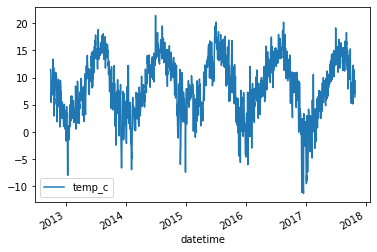

In [6]:
van_df.plot()
pyplot.show()

In [7]:
X = van_df.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [8]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
history = [x for x in train]
predictions = list()

In [10]:
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=4.236, Expected=2.429
>Predicted=2.429, Expected=2.005
>Predicted=2.005, Expected=4.932
>Predicted=4.932, Expected=5.115
>Predicted=5.115, Expected=6.517
>Predicted=6.517, Expected=7.451
>Predicted=7.451, Expected=10.996
>Predicted=10.996, Expected=7.385
>Predicted=7.385, Expected=8.399
>Predicted=8.399, Expected=5.802
>Predicted=5.802, Expected=6.822
>Predicted=6.822, Expected=8.685
>Predicted=8.685, Expected=9.530
>Predicted=9.530, Expected=12.314
>Predicted=12.314, Expected=9.096
>Predicted=9.096, Expected=9.297
>Predicted=9.297, Expected=10.359
>Predicted=10.359, Expected=9.298
>Predicted=9.298, Expected=9.760
>Predicted=9.760, Expected=10.901
>Predicted=10.901, Expected=8.524
>Predicted=8.524, Expected=9.688
>Predicted=9.688, Expected=10.700
>Predicted=10.700, Expected=11.924
>Predicted=11.924, Expected=13.044
>Predicted=13.044, Expected=13.050
>Predicted=13.050, Expected=12.996
>Predicted=12.996, Expected=13.197
>Predicted=13.197, Expected=12.924
>Predicted=12.924, Exp

In [11]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)

RMSE: 2.467


In [12]:
print(vancouver_df.describe())

            temp_c
count  1853.000000
mean      8.281872
std       5.439836
min     -11.340000
25%       4.590000
50%       8.510000
75%      12.680000
max      21.430000


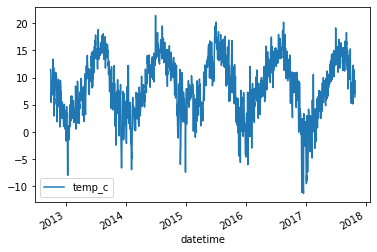

In [13]:
van_df = vancouver_df.set_index('datetime')
van_df.plot()
pyplot.show()

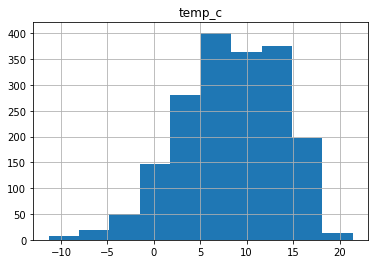

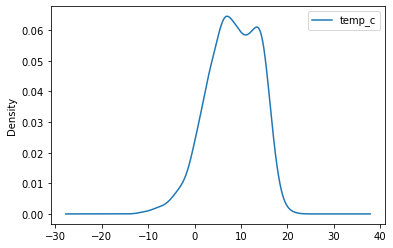

In [14]:
from matplotlib import pyplot
van_df.hist()
van_df.plot(kind='kde')
pyplot.show()

In [16]:
from pandas import Grouper
from matplotlib import pyplot
series = vancouver_df
print(series)

                 datetime     temp_c
1     2012-10-01 13:00:00  11.480000
25    2012-10-02 13:00:00  11.432043
49    2012-10-03 13:00:00  10.200000
73    2012-10-04 13:00:00   7.760000
97    2012-10-05 13:00:00   5.420000
...                   ...        ...
44353 2017-10-23 13:00:00   8.980000
44377 2017-10-24 13:00:00   6.990000
44401 2017-10-25 13:00:00   8.900000
44425 2017-10-26 13:00:00   9.480000
44449 2017-10-27 13:00:00   6.420000

[1853 rows x 2 columns]


In [17]:
vancouver_df['year'] = pd.to_datetime(vancouver_df['datetime']).dt.year
series = vancouver_df

<AxesSubplot:title={'center':'temp_c'}, xlabel='[year]'>

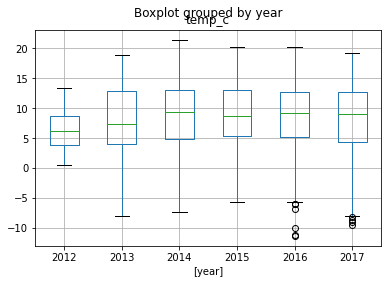

In [18]:
series.boxplot(by='year')

In [19]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value) 
    return Series(diff)


In [35]:
y = vancouver_df.drop('year', axis = 1)

In [20]:
from pandas import Series

In [21]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value) 
    return Series(diff)

In [22]:
stationary = difference(X)

In [23]:
stationary

0       [-0.047956467]
1         [-1.2320433]
2         [-2.4399996]
3         [-2.3400002]
4          [1.6100001]
             ...      
1847      [-2.3100004]
1848      [-1.9899998]
1849       [1.9099998]
1850       [0.5799999]
1851      [-3.0599995]
Length: 1852, dtype: object

In [24]:
y = vancouver_df.drop('year', axis = 1)

In [25]:
y

,datetime,temp_c
1,2012-10-01 13:00:00,11.480000
25,2012-10-02 13:00:00,11.432043
49,2012-10-03 13:00:00,10.200000
73,2012-10-04 13:00:00,7.760000
97,2012-10-05 13:00:00,5.420000
...,...,...
44353,2017-10-23 13:00:00,8.980000
44377,2017-10-24 13:00:00,6.990000
44401,2017-10-25 13:00:00,8.900000
44425,2017-10-26 13:00:00,9.480000


In [26]:
z = y['temp_c']

In [27]:
z = z.values
z = z.astype('float32')

In [28]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value) 
    return Series(diff)

In [29]:
months_in_year = 12
stationary = difference(z, months_in_year) 
stationary.index = series.index[months_in_year:]

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
result = adfuller(stationary)

In [32]:

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.687323
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot


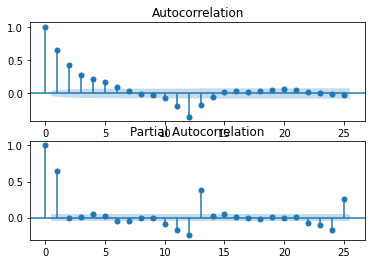

In [34]:
series = stationary
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=25, ax=pyplot.gca()) 
pyplot.subplot(212)
plot_pacf(series, lags=25, ax=pyplot.gca()) 
pyplot.show()

In [92]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.arima_model import ARIMA 
from math import sqrt

In [93]:
train_size = int(len(z) * 0.50)
train, test = z[0:train_size], z[train_size:]

In [94]:
# invert differenced value
def inverse_difference(history, yhat, interval=1): 
    return yhat + history[-interval]

In [95]:
def evaluate_arima_model(X, arima_order): # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:] 
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        print(t)
    # difference data
        months_in_year = 12
        diff = difference(history, months_in_year) 
        model = ARIMA(diff, order=arima_order) 
        model_fit = model.fit(trend='nc', disp=0) 
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year) 
        predictions.append(yhat)
        history.append(test[t])
          # calculate out of sample error
        obs = test[i]
        print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    rmse = sqrt(mean_squared_error(test, predictions)) 
    print(rmse)
    return rmse

In [ ]:
evaluate_arima_model(z, (1,1,1))

In [97]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
#     difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year) 
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=6.347, Expected=2.429
>Predicted=1.854, Expected=2.005
>Predicted=-0.336, Expected=4.932
>Predicted=5.076, Expected=5.115
>Predicted=4.048, Expected=6.517
>Predicted=5.754, Expected=7.451
>Predicted=7.008, Expected=10.996
>Predicted=10.398, Expected=7.385
>Predicted=6.228, Expected=8.399
>Predicted=6.050, Expected=5.802
>Predicted=5.775, Expected=6.822
>Predicted=6.014, Expected=8.685
>Predicted=5.516, Expected=9.530
>Predicted=6.949, Expected=12.314
>Predicted=12.146, Expected=9.096
>Predicted=8.024, Expected=9.297
>Predicted=9.437, Expected=10.359
>Predicted=10.137, Expected=9.298
>Predicted=12.288, Expected=9.760
>Predicted=6.524, Expected=10.901
>Predicted=10.850, Expected=8.524
>Predicted=5.893, Expected=9.688
>Predicted=9.532, Expected=10.700
>Predicted=11.394, Expected=11.924
>Predicted=11.795, Expected=13.044
>Predicted=14.773, Expected=13.050
>Predicted=9.617, Expected=12.996
>Predicted=12.023, Expected=13.197
>Predicted=13.090, Expected=12.924
>Predicted=11.099, Ex

>Predicted=2.474, Expected=2.980
>Predicted=1.734, Expected=1.170
>Predicted=-2.757, Expected=0.025
>Predicted=5.422, Expected=2.960
>Predicted=4.096, Expected=3.601
>Predicted=7.973, Expected=0.800
>Predicted=-1.318, Expected=0.050
>Predicted=4.023, Expected=-0.810
>Predicted=0.335, Expected=0.370
>Predicted=2.018, Expected=2.440
>Predicted=3.133, Expected=7.230
>Predicted=7.744, Expected=3.867
>Predicted=1.201, Expected=1.840
>Predicted=0.358, Expected=1.780
>Predicted=0.424, Expected=2.540
>Predicted=4.679, Expected=0.740
>Predicted=2.046, Expected=0.120
>Predicted=-1.630, Expected=1.590
>Predicted=0.571, Expected=1.370
>Predicted=0.080, Expected=1.030
>Predicted=1.620, Expected=-3.540
>Predicted=-0.280, Expected=-4.160
>Predicted=2.643, Expected=-4.060
>Predicted=-3.992, Expected=-4.630
>Predicted=-4.091, Expected=-4.363
>Predicted=-2.560, Expected=-1.240
>Predicted=0.411, Expected=-0.010
>Predicted=-1.062, Expected=2.250
>Predicted=1.133, Expected=3.439
>Predicted=3.862, Expected=

>Predicted=13.590, Expected=13.780
>Predicted=16.349, Expected=14.740
>Predicted=15.775, Expected=15.570
>Predicted=15.635, Expected=15.150
>Predicted=14.228, Expected=17.000
>Predicted=14.712, Expected=18.660
>Predicted=18.135, Expected=17.390
>Predicted=16.182, Expected=16.370
>Predicted=15.781, Expected=16.350
>Predicted=16.439, Expected=16.120
>Predicted=14.232, Expected=17.830
>Predicted=16.720, Expected=20.180
>Predicted=17.921, Expected=16.820
>Predicted=16.764, Expected=16.680
>Predicted=16.870, Expected=13.710
>Predicted=13.952, Expected=11.300
>Predicted=14.491, Expected=14.400
>Predicted=16.971, Expected=16.160
>Predicted=15.767, Expected=17.320
>Predicted=16.344, Expected=17.920
>Predicted=17.390, Expected=15.430
>Predicted=15.537, Expected=13.540
>Predicted=16.155, Expected=14.550
>Predicted=18.042, Expected=15.410
>Predicted=13.699, Expected=13.710
>Predicted=14.650, Expected=12.640
>Predicted=11.067, Expected=12.230
>Predicted=10.341, Expected=9.810
>Predicted=13.435, Ex

>Predicted=6.632, Expected=7.400
>Predicted=6.662, Expected=7.190
>Predicted=8.700, Expected=5.190
>Predicted=4.736, Expected=6.000
>Predicted=3.648, Expected=3.810
>Predicted=3.964, Expected=9.010
>Predicted=9.754, Expected=6.324
>Predicted=2.401, Expected=7.980
>Predicted=6.705, Expected=7.180
>Predicted=7.133, Expected=5.370
>Predicted=5.353, Expected=8.050
>Predicted=9.649, Expected=9.990
>Predicted=9.069, Expected=8.340
>Predicted=7.808, Expected=8.000
>Predicted=5.721, Expected=8.420
>Predicted=8.132, Expected=9.020
>Predicted=5.805, Expected=8.420
>Predicted=12.058, Expected=7.980
>Predicted=5.643, Expected=9.390
>Predicted=10.003, Expected=7.230
>Predicted=6.684, Expected=6.810
>Predicted=5.123, Expected=6.020
>Predicted=8.477, Expected=5.400
>Predicted=8.238, Expected=5.280
>Predicted=5.225, Expected=5.130
>Predicted=5.874, Expected=4.830
>Predicted=6.320, Expected=9.780
>Predicted=9.912, Expected=5.780
>Predicted=6.277, Expected=9.560
>Predicted=8.726, Expected=7.190
>Predict

In [99]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)

RMSE: 3.187


In [55]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values): 
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values: 
            for q in q_values:
                order = (p,d,q)
                print(order)
                try:
                    print('yes')
                    print(order)
                    rmse = evaluate_arima_model(dataset, order) 
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order 
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [56]:
import warnings

In [57]:
asd1 = y['temp_c']
asd = asd1.values

In [59]:
p_values = range(0, 4)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore") 
evaluate_models(z, p_values, d_values, q_values)


(0, 0, 0)
yes
(0, 0, 0)
0
(0, 0, 1)
yes
(0, 0, 1)
0
>Predicted=6.377, Expected=6.420
1
>Predicted=1.864, Expected=6.420
2
>Predicted=1.189, Expected=6.420
3
>Predicted=4.523, Expected=6.420
4
>Predicted=2.543, Expected=6.420
5
>Predicted=4.989, Expected=6.420
6
>Predicted=5.145, Expected=6.420
7
>Predicted=8.634, Expected=6.420
8
>Predicted=4.154, Expected=6.420
9
>Predicted=5.942, Expected=6.420
10
>Predicted=4.172, Expected=6.420
11
>Predicted=5.702, Expected=6.420
12
>Predicted=4.081, Expected=6.420
13
>Predicted=5.025, Expected=6.420
14
>Predicted=8.981, Expected=6.420
15
>Predicted=5.179, Expected=6.420
16
>Predicted=8.805, Expected=6.420
17
>Predicted=8.315, Expected=6.420
18
>Predicted=11.543, Expected=6.420
19
>Predicted=6.394, Expected=6.420
20
>Predicted=10.902, Expected=6.420
21
>Predicted=4.485, Expected=6.420
22
>Predicted=9.696, Expected=6.420
23
>Predicted=9.239, Expected=6.420
24
>Predicted=11.014, Expected=6.420
25
>Predicted=13.437, Expected=6.420
26
>Predicted=8.882,

>Predicted=0.764, Expected=6.420
235
>Predicted=7.686, Expected=6.420
236
>Predicted=-4.697, Expected=6.420
237
>Predicted=1.305, Expected=6.420
238
>Predicted=-0.506, Expected=6.420
239
>Predicted=0.046, Expected=6.420
240
>Predicted=-1.333, Expected=6.420
241
>Predicted=-4.211, Expected=6.420
242
>Predicted=3.906, Expected=6.420
243
>Predicted=2.577, Expected=6.420
244
>Predicted=8.224, Expected=6.420
245
>Predicted=-0.737, Expected=6.420
246
>Predicted=6.831, Expected=6.420
247
>Predicted=1.066, Expected=6.420
248
>Predicted=5.101, Expected=6.420
249
>Predicted=3.780, Expected=6.420
250
>Predicted=8.338, Expected=6.420
251
>Predicted=0.487, Expected=6.420
252
>Predicted=1.923, Expected=6.420
253
>Predicted=-0.055, Expected=6.420
254
>Predicted=4.407, Expected=6.420
255
>Predicted=1.560, Expected=6.420
256
>Predicted=-0.001, Expected=6.420
257
>Predicted=0.937, Expected=6.420
258
>Predicted=-0.569, Expected=6.420
259
>Predicted=1.261, Expected=6.420
260
>Predicted=-0.236, Expected=6.

>Predicted=12.612, Expected=6.420
465
>Predicted=16.522, Expected=6.420
466
>Predicted=13.067, Expected=6.420
467
>Predicted=14.915, Expected=6.420
468
>Predicted=13.293, Expected=6.420
469
>Predicted=13.844, Expected=6.420
470
>Predicted=13.804, Expected=6.420
471
>Predicted=16.376, Expected=6.420
472
>Predicted=15.484, Expected=6.420
473
>Predicted=18.574, Expected=6.420
474
>Predicted=16.135, Expected=6.420
475
>Predicted=12.058, Expected=6.420
476
>Predicted=18.248, Expected=6.420
477
>Predicted=12.858, Expected=6.420
478
>Predicted=14.578, Expected=6.420
479
>Predicted=16.438, Expected=6.420
480
>Predicted=14.009, Expected=6.420
481
>Predicted=14.582, Expected=6.420
482
>Predicted=16.460, Expected=6.420
483
>Predicted=16.248, Expected=6.420
484
>Predicted=16.307, Expected=6.420
485
>Predicted=14.590, Expected=6.420
486
>Predicted=14.812, Expected=6.420
487
>Predicted=16.803, Expected=6.420
488
>Predicted=14.735, Expected=6.420
489
>Predicted=15.357, Expected=6.420
490
>Predicted=1

>Predicted=3.135, Expected=6.420
692
>Predicted=2.424, Expected=6.420
693
>Predicted=-0.758, Expected=6.420
694
>Predicted=-2.172, Expected=6.420
695
>Predicted=0.524, Expected=6.420
696
>Predicted=1.054, Expected=6.420
697
>Predicted=-0.625, Expected=6.420
698
>Predicted=7.865, Expected=6.420
699
>Predicted=-1.244, Expected=6.420
700
>Predicted=7.971, Expected=6.420
701
>Predicted=-2.616, Expected=6.420
702
>Predicted=3.610, Expected=6.420
703
>Predicted=4.077, Expected=6.420
704
>Predicted=1.517, Expected=6.420
705
>Predicted=1.363, Expected=6.420
706
>Predicted=2.170, Expected=6.420
707
>Predicted=7.124, Expected=6.420
708
>Predicted=3.482, Expected=6.420
709
>Predicted=7.906, Expected=6.420
710
>Predicted=0.595, Expected=6.420
711
>Predicted=8.101, Expected=6.420
712
>Predicted=4.846, Expected=6.420
713
>Predicted=3.141, Expected=6.420
714
>Predicted=5.452, Expected=6.420
715
>Predicted=5.384, Expected=6.420
716
>Predicted=1.700, Expected=6.420
717
>Predicted=4.009, Expected=6.420


>Predicted=9.104, Expected=6.420
923
>Predicted=7.644, Expected=6.420
924
>Predicted=6.624, Expected=6.420
925
>Predicted=6.344, Expected=6.420
926
>Predicted=10.869, Expected=6.420
3.378632712795521
ARIMA(0, 0, 1) RMSE=3.379
(0, 0, 2)
yes
(0, 0, 2)
0
>Predicted=6.502, Expected=6.420
1
>Predicted=1.815, Expected=6.420
2
>Predicted=-0.297, Expected=6.420
3
>Predicted=5.861, Expected=6.420
4
>Predicted=3.682, Expected=6.420
5
>Predicted=4.309, Expected=6.420
6
>Predicted=6.838, Expected=6.420
7
>Predicted=9.218, Expected=6.420
8
>Predicted=5.224, Expected=6.420
9
>Predicted=4.936, Expected=6.420
10
>Predicted=5.988, Expected=6.420
11
>Predicted=5.092, Expected=6.420
12
>Predicted=5.042, Expected=6.420
13
>Predicted=6.227, Expected=6.420
14
>Predicted=10.529, Expected=6.420
15
>Predicted=6.484, Expected=6.420
16
>Predicted=7.779, Expected=6.420
17
>Predicted=10.165, Expected=6.420
18
>Predicted=11.407, Expected=6.420
19
>Predicted=6.001, Expected=6.420
20
>Predicted=10.932, Expected=6.420

>Predicted=12.016, Expected=6.420
66
>Predicted=15.591, Expected=6.420
67
>Predicted=10.542, Expected=6.420
68
>Predicted=9.394, Expected=6.420
69
>Predicted=11.369, Expected=6.420
70
>Predicted=13.256, Expected=6.420
71
>Predicted=8.806, Expected=6.420
72
>Predicted=13.475, Expected=6.420
73
>Predicted=18.352, Expected=6.420
74
>Predicted=15.296, Expected=6.420
75
>Predicted=16.149, Expected=6.420
76
>Predicted=15.796, Expected=6.420
77
>Predicted=15.172, Expected=6.420
78
>Predicted=15.110, Expected=6.420
79
>Predicted=12.429, Expected=6.420
80
>Predicted=16.952, Expected=6.420
81
>Predicted=13.029, Expected=6.420
82
>Predicted=20.526, Expected=6.420
83
>Predicted=15.713, Expected=6.420
84
>Predicted=17.569, Expected=6.420
85
>Predicted=16.127, Expected=6.420
86
>Predicted=18.448, Expected=6.420
87
>Predicted=16.988, Expected=6.420
88
>Predicted=16.109, Expected=6.420
89
>Predicted=16.056, Expected=6.420
90
>Predicted=17.695, Expected=6.420
91
>Predicted=15.182, Expected=6.420
92
>Pr

>Predicted=9.975, Expected=6.420
289
>Predicted=10.391, Expected=6.420
290
>Predicted=5.452, Expected=6.420
291
>Predicted=0.914, Expected=6.420
292
>Predicted=-3.926, Expected=6.420
293
>Predicted=9.591, Expected=6.420
294
>Predicted=4.508, Expected=6.420
295
>Predicted=0.738, Expected=6.420
296
>Predicted=3.308, Expected=6.420
297
>Predicted=2.056, Expected=6.420
298
>Predicted=8.154, Expected=6.420
299
>Predicted=4.459, Expected=6.420
300
>Predicted=9.117, Expected=6.420
301
>Predicted=-2.115, Expected=6.420
302
>Predicted=3.977, Expected=6.420
303
>Predicted=3.596, Expected=6.420
304
>Predicted=9.749, Expected=6.420
305
>Predicted=3.642, Expected=6.420
306
>Predicted=3.889, Expected=6.420
307
>Predicted=2.170, Expected=6.420
308
>Predicted=12.584, Expected=6.420
309
>Predicted=2.500, Expected=6.420
310
>Predicted=-3.030, Expected=6.420
311
>Predicted=11.092, Expected=6.420
312
>Predicted=3.780, Expected=6.420
313
>Predicted=4.209, Expected=6.420
314
>Predicted=5.629, Expected=6.420

>Predicted=11.453, Expected=6.420
508
>Predicted=10.752, Expected=6.420
509
>Predicted=13.666, Expected=6.420
510
>Predicted=14.901, Expected=6.420
511
>Predicted=14.994, Expected=6.420
512
>Predicted=15.673, Expected=6.420
513
>Predicted=12.237, Expected=6.420
514
>Predicted=10.455, Expected=6.420
515
>Predicted=15.997, Expected=6.420
516
>Predicted=14.962, Expected=6.420
517
>Predicted=11.642, Expected=6.420
518
>Predicted=9.611, Expected=6.420
519
>Predicted=11.305, Expected=6.420
520
>Predicted=9.666, Expected=6.420
521
>Predicted=14.674, Expected=6.420
522
>Predicted=12.615, Expected=6.420
523
>Predicted=12.552, Expected=6.420
524
>Predicted=12.238, Expected=6.420
525
>Predicted=8.951, Expected=6.420
526
>Predicted=15.077, Expected=6.420
527
>Predicted=10.127, Expected=6.420
528
>Predicted=11.440, Expected=6.420
529
>Predicted=8.073, Expected=6.420
530
>Predicted=12.488, Expected=6.420
531
>Predicted=12.038, Expected=6.420
532
>Predicted=14.982, Expected=6.420
533
>Predicted=9.342

>Predicted=3.635, Expected=6.420
728
>Predicted=4.243, Expected=6.420
729
>Predicted=10.039, Expected=6.420
730
>Predicted=2.019, Expected=6.420
731
>Predicted=6.338, Expected=6.420
732
>Predicted=6.890, Expected=6.420
733
>Predicted=5.092, Expected=6.420
734
>Predicted=8.956, Expected=6.420
735
>Predicted=9.094, Expected=6.420
736
>Predicted=7.634, Expected=6.420
737
>Predicted=5.296, Expected=6.420
738
>Predicted=8.139, Expected=6.420
739
>Predicted=5.801, Expected=6.420
740
>Predicted=11.702, Expected=6.420
741
>Predicted=5.077, Expected=6.420
742
>Predicted=9.759, Expected=6.420
743
>Predicted=6.668, Expected=6.420
744
>Predicted=5.135, Expected=6.420
745
>Predicted=8.269, Expected=6.420
746
>Predicted=8.457, Expected=6.420
747
>Predicted=5.127, Expected=6.420
748
>Predicted=6.150, Expected=6.420
749
>Predicted=6.978, Expected=6.420
750
>Predicted=10.349, Expected=6.420
751
>Predicted=6.307, Expected=6.420
752
>Predicted=8.706, Expected=6.420
753
>Predicted=8.966, Expected=6.420
75

>Predicted=12.872, Expected=6.420
25
>Predicted=15.794, Expected=6.420
26
>Predicted=10.385, Expected=6.420
27
>Predicted=12.668, Expected=6.420
28
>Predicted=14.152, Expected=6.420
29
>Predicted=12.112, Expected=6.420
30
>Predicted=12.417, Expected=6.420
31
>Predicted=14.606, Expected=6.420
32
>Predicted=10.853, Expected=6.420
33
>Predicted=14.018, Expected=6.420
34
>Predicted=15.277, Expected=6.420
35
>Predicted=16.659, Expected=6.420
36
>Predicted=16.813, Expected=6.420
37
>Predicted=16.281, Expected=6.420
38
>Predicted=15.985, Expected=6.420
39
>Predicted=15.254, Expected=6.420
40
>Predicted=14.071, Expected=6.420
41
>Predicted=11.524, Expected=6.420
42
>Predicted=12.108, Expected=6.420
43
>Predicted=10.064, Expected=6.420
44
>Predicted=11.940, Expected=6.420
45
>Predicted=16.735, Expected=6.420
46
>Predicted=13.307, Expected=6.420
47
>Predicted=10.559, Expected=6.420
48
>Predicted=13.447, Expected=6.420
49
>Predicted=12.518, Expected=6.420
50
>Predicted=11.302, Expected=6.420
51
>

>Predicted=2.322, Expected=6.420
256
>Predicted=-2.192, Expected=6.420
257
>Predicted=-0.005, Expected=6.420
258
>Predicted=0.203, Expected=6.420
259
>Predicted=2.026, Expected=6.420
260
>Predicted=-0.224, Expected=6.420
261
>Predicted=1.497, Expected=6.420
262
>Predicted=-6.219, Expected=6.420
263
>Predicted=-7.003, Expected=6.420
264
>Predicted=-5.000, Expected=6.420
265
>Predicted=-1.296, Expected=6.420
266
>Predicted=-2.088, Expected=6.420
267
>Predicted=0.697, Expected=6.420
268
>Predicted=4.326, Expected=6.420
269
>Predicted=2.212, Expected=6.420
270
>Predicted=-0.142, Expected=6.420
271
>Predicted=-7.735, Expected=6.420
272
>Predicted=-3.263, Expected=6.420
273
>Predicted=-1.345, Expected=6.420
274
>Predicted=4.902, Expected=6.420
275
>Predicted=1.786, Expected=6.420
276
>Predicted=-1.229, Expected=6.420
277
>Predicted=0.402, Expected=6.420
278
>Predicted=3.250, Expected=6.420
279
>Predicted=7.213, Expected=6.420
280
>Predicted=5.726, Expected=6.420
281
>Predicted=-0.202, Expect

>Predicted=9.807, Expected=6.420
476
>Predicted=16.781, Expected=6.420
477
>Predicted=13.149, Expected=6.420
478
>Predicted=12.925, Expected=6.420
479
>Predicted=16.985, Expected=6.420
480
>Predicted=13.926, Expected=6.420
481
>Predicted=13.022, Expected=6.420
482
>Predicted=15.837, Expected=6.420
483
>Predicted=15.314, Expected=6.420
484
>Predicted=15.001, Expected=6.420
485
>Predicted=13.650, Expected=6.420
486
>Predicted=14.412, Expected=6.420
487
>Predicted=18.750, Expected=6.420
488
>Predicted=17.432, Expected=6.420
489
>Predicted=16.714, Expected=6.420
490
>Predicted=17.157, Expected=6.420
491
>Predicted=14.807, Expected=6.420
492
>Predicted=17.342, Expected=6.420
493
>Predicted=19.284, Expected=6.420
494
>Predicted=18.438, Expected=6.420
495
>Predicted=17.980, Expected=6.420
496
>Predicted=14.426, Expected=6.420
497
>Predicted=13.974, Expected=6.420
498
>Predicted=15.948, Expected=6.420
499
>Predicted=14.834, Expected=6.420
500
>Predicted=15.642, Expected=6.420
501
>Predicted=17

>Predicted=3.262, Expected=6.420
707
>Predicted=9.288, Expected=6.420
708
>Predicted=6.854, Expected=6.420
709
>Predicted=9.695, Expected=6.420
710
>Predicted=2.744, Expected=6.420
711
>Predicted=9.492, Expected=6.420
712
>Predicted=7.043, Expected=6.420
713
>Predicted=2.170, Expected=6.420
714
>Predicted=6.346, Expected=6.420
715
>Predicted=8.055, Expected=6.420
716
>Predicted=2.397, Expected=6.420
717
>Predicted=3.813, Expected=6.420
718
>Predicted=10.271, Expected=6.420
719
>Predicted=4.688, Expected=6.420
720
>Predicted=2.660, Expected=6.420
721
>Predicted=4.823, Expected=6.420
722
>Predicted=2.383, Expected=6.420
723
>Predicted=6.157, Expected=6.420
724
>Predicted=7.120, Expected=6.420
725
>Predicted=9.363, Expected=6.420
726
>Predicted=5.012, Expected=6.420
727
>Predicted=3.350, Expected=6.420
728
>Predicted=3.868, Expected=6.420
729
>Predicted=10.223, Expected=6.420
730
>Predicted=3.325, Expected=6.420
731
>Predicted=7.436, Expected=6.420
732
>Predicted=8.593, Expected=6.420
733

>Predicted=6.859, Expected=6.420
925
>Predicted=6.508, Expected=6.420
926
>Predicted=12.733, Expected=6.420
3.439893078294656
ARIMA(0, 1, 1) RMSE=3.440
(0, 1, 2)
yes
(0, 1, 2)
0
>Predicted=5.792, Expected=6.420
1
>Predicted=1.219, Expected=6.420
2
>Predicted=-0.572, Expected=6.420
3
>Predicted=4.926, Expected=6.420
4
>Predicted=3.950, Expected=6.420
5
>Predicted=6.495, Expected=6.420
6
>Predicted=7.830, Expected=6.420
7
>Predicted=11.762, Expected=6.420
8
>Predicted=7.307, Expected=6.420
9
>Predicted=7.596, Expected=6.420
10
>Predicted=6.685, Expected=6.420
11
>Predicted=7.061, Expected=6.420
12
>Predicted=6.497, Expected=6.420
13
>Predicted=8.178, Expected=6.420
14
>Predicted=13.860, Expected=6.420
15
>Predicted=9.671, Expected=6.420
16
>Predicted=11.540, Expected=6.420
17
>Predicted=11.616, Expected=6.420
18
>Predicted=13.545, Expected=6.420
19
>Predicted=7.349, Expected=6.420
20
>Predicted=11.734, Expected=6.420
21
>Predicted=6.082, Expected=6.420
22
>Predicted=10.400, Expected=6.42

>Predicted=0.211, Expected=6.420
220
>Predicted=-6.360, Expected=6.420
221
>Predicted=-3.002, Expected=6.420
222
>Predicted=-0.130, Expected=6.420
223
>Predicted=-0.139, Expected=6.420
224
>Predicted=4.926, Expected=6.420
225
>Predicted=-2.807, Expected=6.420
226
>Predicted=-4.420, Expected=6.420
227
>Predicted=-6.503, Expected=6.420
228
>Predicted=1.353, Expected=6.420
229
>Predicted=-6.055, Expected=6.420
230
>Predicted=-7.733, Expected=6.420
231
>Predicted=-4.835, Expected=6.420
232
>Predicted=0.297, Expected=6.420
233
>Predicted=5.325, Expected=6.420
234
>Predicted=4.929, Expected=6.420
235
>Predicted=10.958, Expected=6.420
236
>Predicted=-1.500, Expected=6.420
237
>Predicted=3.877, Expected=6.420
238
>Predicted=5.253, Expected=6.420
239
>Predicted=4.747, Expected=6.420
240
>Predicted=4.040, Expected=6.420
241
>Predicted=-0.435, Expected=6.420
242
>Predicted=7.616, Expected=6.420
243
>Predicted=5.580, Expected=6.420
244
>Predicted=9.515, Expected=6.420
245
>Predicted=-0.984, Expect

>Predicted=10.673, Expected=6.420
439
>Predicted=11.122, Expected=6.420
440
>Predicted=13.105, Expected=6.420
441
>Predicted=13.863, Expected=6.420
442
>Predicted=19.089, Expected=6.420
443
>Predicted=11.630, Expected=6.420
444
>Predicted=14.564, Expected=6.420
445
>Predicted=18.044, Expected=6.420
446
>Predicted=14.052, Expected=6.420
447
>Predicted=15.558, Expected=6.420
448
>Predicted=12.736, Expected=6.420
449
>Predicted=14.683, Expected=6.420
450
>Predicted=13.975, Expected=6.420
451
>Predicted=17.017, Expected=6.420
452
>Predicted=13.514, Expected=6.420
453
>Predicted=13.734, Expected=6.420
454
>Predicted=13.691, Expected=6.420
455
>Predicted=14.461, Expected=6.420
456
>Predicted=15.595, Expected=6.420
457
>Predicted=13.797, Expected=6.420
458
>Predicted=12.938, Expected=6.420
459
>Predicted=12.379, Expected=6.420
460
>Predicted=12.390, Expected=6.420
461
>Predicted=16.763, Expected=6.420
462
>Predicted=16.830, Expected=6.420
463
>Predicted=16.540, Expected=6.420
464
>Predicted=1

>Predicted=1.055, Expected=6.420
660
>Predicted=-1.467, Expected=6.420
661
>Predicted=-0.878, Expected=6.420
662
>Predicted=-1.293, Expected=6.420
663
>Predicted=0.631, Expected=6.420
664
>Predicted=-7.639, Expected=6.420
665
>Predicted=-1.830, Expected=6.420
666
>Predicted=-2.292, Expected=6.420
667
>Predicted=1.757, Expected=6.420
668
>Predicted=3.899, Expected=6.420
669
>Predicted=-0.370, Expected=6.420
670
>Predicted=0.606, Expected=6.420
671
>Predicted=-0.896, Expected=6.420
672
>Predicted=0.352, Expected=6.420
673
>Predicted=5.088, Expected=6.420
674
>Predicted=7.641, Expected=6.420
675
>Predicted=3.377, Expected=6.420
676
>Predicted=4.609, Expected=6.420
677
>Predicted=0.709, Expected=6.420
678
>Predicted=7.218, Expected=6.420
679
>Predicted=10.583, Expected=6.420
680
>Predicted=2.464, Expected=6.420
681
>Predicted=1.387, Expected=6.420
682
>Predicted=0.304, Expected=6.420
683
>Predicted=-1.079, Expected=6.420
684
>Predicted=7.027, Expected=6.420
685
>Predicted=3.478, Expected=6

>Predicted=12.457, Expected=6.420
883
>Predicted=13.334, Expected=6.420
884
>Predicted=14.849, Expected=6.420
885
>Predicted=10.300, Expected=6.420
886
>Predicted=14.297, Expected=6.420
887
>Predicted=12.103, Expected=6.420
888
>Predicted=9.884, Expected=6.420
889
>Predicted=10.735, Expected=6.420
890
>Predicted=8.711, Expected=6.420
891
>Predicted=7.390, Expected=6.420
892
>Predicted=8.652, Expected=6.420
893
>Predicted=13.457, Expected=6.420
894
>Predicted=7.249, Expected=6.420
895
>Predicted=14.430, Expected=6.420
896
>Predicted=5.437, Expected=6.420
897
>Predicted=12.117, Expected=6.420
898
>Predicted=11.402, Expected=6.420
899
>Predicted=13.823, Expected=6.420
900
>Predicted=10.583, Expected=6.420
901
>Predicted=10.653, Expected=6.420
902
>Predicted=9.637, Expected=6.420
903
>Predicted=10.147, Expected=6.420
904
>Predicted=8.267, Expected=6.420
905
>Predicted=4.982, Expected=6.420
906
>Predicted=12.306, Expected=6.420
907
>Predicted=7.891, Expected=6.420
908
>Predicted=7.438, Expe

>Predicted=9.579, Expected=6.420
175
>Predicted=8.362, Expected=6.420
176
>Predicted=10.447, Expected=6.420
177
>Predicted=8.722, Expected=6.420
178
>Predicted=11.231, Expected=6.420
179
>Predicted=15.590, Expected=6.420
180
>Predicted=8.867, Expected=6.420
181
>Predicted=12.234, Expected=6.420
182
>Predicted=13.605, Expected=6.420
183
>Predicted=8.183, Expected=6.420
184
>Predicted=8.544, Expected=6.420
185
>Predicted=9.068, Expected=6.420
186
>Predicted=12.413, Expected=6.420
187
>Predicted=14.558, Expected=6.420
188
>Predicted=10.992, Expected=6.420
189
>Predicted=12.793, Expected=6.420
190
>Predicted=13.762, Expected=6.420
191
>Predicted=5.816, Expected=6.420
192
>Predicted=7.426, Expected=6.420
193
>Predicted=6.803, Expected=6.420
194
>Predicted=5.728, Expected=6.420
195
>Predicted=11.909, Expected=6.420
196
>Predicted=7.420, Expected=6.420
197
>Predicted=9.207, Expected=6.420
198
>Predicted=9.010, Expected=6.420
199
>Predicted=7.949, Expected=6.420
200
>Predicted=12.665, Expected

>Predicted=10.518, Expected=6.420
395
>Predicted=13.188, Expected=6.420
396
>Predicted=18.535, Expected=6.420
397
>Predicted=9.504, Expected=6.420
398
>Predicted=10.746, Expected=6.420
399
>Predicted=13.766, Expected=6.420
400
>Predicted=13.903, Expected=6.420
401
>Predicted=11.023, Expected=6.420
402
>Predicted=7.222, Expected=6.420
403
>Predicted=11.886, Expected=6.420
404
>Predicted=15.588, Expected=6.420
405
>Predicted=8.440, Expected=6.420
406
>Predicted=15.757, Expected=6.420
407
>Predicted=15.005, Expected=6.420
408
>Predicted=10.227, Expected=6.420
409
>Predicted=11.499, Expected=6.420
410
>Predicted=10.501, Expected=6.420
411
>Predicted=13.645, Expected=6.420
412
>Predicted=7.933, Expected=6.420
413
>Predicted=11.495, Expected=6.420
414
>Predicted=15.877, Expected=6.420
415
>Predicted=11.928, Expected=6.420
416
>Predicted=14.272, Expected=6.420
417
>Predicted=15.173, Expected=6.420
418
>Predicted=14.511, Expected=6.420
419
>Predicted=15.408, Expected=6.420
420
>Predicted=10.63

>Predicted=-10.877, Expected=6.420
614
>Predicted=-10.850, Expected=6.420
615
>Predicted=-8.581, Expected=6.420
616
>Predicted=3.452, Expected=6.420
617
>Predicted=0.113, Expected=6.420
618
>Predicted=0.563, Expected=6.420
619
>Predicted=-2.953, Expected=6.420
620
>Predicted=-4.838, Expected=6.420
621
>Predicted=-4.786, Expected=6.420
622
>Predicted=-4.851, Expected=6.420
623
>Predicted=-4.873, Expected=6.420
624
>Predicted=-6.485, Expected=6.420
625
>Predicted=-7.575, Expected=6.420
626
>Predicted=5.437, Expected=6.420
627
>Predicted=1.546, Expected=6.420
628
>Predicted=0.001, Expected=6.420
629
>Predicted=-2.027, Expected=6.420
630
>Predicted=-3.610, Expected=6.420
631
>Predicted=-6.672, Expected=6.420
632
>Predicted=-4.846, Expected=6.420
633
>Predicted=-7.223, Expected=6.420
634
>Predicted=-6.104, Expected=6.420
635
>Predicted=2.917, Expected=6.420
636
>Predicted=-1.735, Expected=6.420
637
>Predicted=1.553, Expected=6.420
638
>Predicted=-4.916, Expected=6.420
639
>Predicted=-3.900,

>Predicted=15.472, Expected=6.420
833
>Predicted=11.410, Expected=6.420
834
>Predicted=15.823, Expected=6.420
835
>Predicted=14.921, Expected=6.420
836
>Predicted=9.055, Expected=6.420
837
>Predicted=14.429, Expected=6.420
838
>Predicted=16.570, Expected=6.420
839
>Predicted=14.614, Expected=6.420
840
>Predicted=13.742, Expected=6.420
841
>Predicted=18.544, Expected=6.420
842
>Predicted=17.248, Expected=6.420
843
>Predicted=12.848, Expected=6.420
844
>Predicted=16.499, Expected=6.420
845
>Predicted=13.414, Expected=6.420
846
>Predicted=14.011, Expected=6.420
847
>Predicted=13.024, Expected=6.420
848
>Predicted=14.976, Expected=6.420
849
>Predicted=17.052, Expected=6.420
850
>Predicted=11.433, Expected=6.420
851
>Predicted=17.514, Expected=6.420
852
>Predicted=16.761, Expected=6.420
853
>Predicted=14.552, Expected=6.420
854
>Predicted=13.509, Expected=6.420
855
>Predicted=14.680, Expected=6.420
856
>Predicted=14.774, Expected=6.420
857
>Predicted=13.915, Expected=6.420
858
>Predicted=15

>Predicted=15.859, Expected=6.420
124
>Predicted=13.353, Expected=6.420
125
>Predicted=12.901, Expected=6.420
126
>Predicted=14.680, Expected=6.420
127
>Predicted=18.744, Expected=6.420
128
>Predicted=17.346, Expected=6.420
129
>Predicted=13.603, Expected=6.420
130
>Predicted=12.191, Expected=6.420
131
>Predicted=16.030, Expected=6.420
132
>Predicted=13.761, Expected=6.420
133
>Predicted=11.870, Expected=6.420
134
>Predicted=12.959, Expected=6.420
135
>Predicted=11.959, Expected=6.420
136
>Predicted=14.540, Expected=6.420
137
>Predicted=21.914, Expected=6.420
138
>Predicted=12.786, Expected=6.420
139
>Predicted=12.798, Expected=6.420
140
>Predicted=13.279, Expected=6.420
141
>Predicted=7.530, Expected=6.420
142
>Predicted=11.988, Expected=6.420
143
>Predicted=10.010, Expected=6.420
144
>Predicted=6.648, Expected=6.420
145
>Predicted=9.796, Expected=6.420
146
>Predicted=13.800, Expected=6.420
147
>Predicted=15.682, Expected=6.420
148
>Predicted=15.612, Expected=6.420
149
>Predicted=8.75

>Predicted=2.154, Expected=6.420
344
>Predicted=10.366, Expected=6.420
345
>Predicted=4.225, Expected=6.420
346
>Predicted=4.621, Expected=6.420
347
>Predicted=3.564, Expected=6.420
348
>Predicted=7.086, Expected=6.420
349
>Predicted=2.664, Expected=6.420
350
>Predicted=4.282, Expected=6.420
351
>Predicted=6.579, Expected=6.420
352
>Predicted=8.503, Expected=6.420
353
>Predicted=6.851, Expected=6.420
354
>Predicted=7.413, Expected=6.420
355
>Predicted=6.873, Expected=6.420
356
>Predicted=8.541, Expected=6.420
357
>Predicted=5.773, Expected=6.420
358
>Predicted=9.625, Expected=6.420
359
>Predicted=11.857, Expected=6.420
360
>Predicted=5.100, Expected=6.420
361
>Predicted=7.362, Expected=6.420
362
>Predicted=9.233, Expected=6.420
363
>Predicted=10.069, Expected=6.420
364
>Predicted=11.315, Expected=6.420
365
>Predicted=8.168, Expected=6.420
366
>Predicted=3.980, Expected=6.420
367
>Predicted=11.663, Expected=6.420
368
>Predicted=5.233, Expected=6.420
369
>Predicted=9.400, Expected=6.420


>Predicted=8.055, Expected=6.420
564
>Predicted=8.091, Expected=6.420
565
>Predicted=8.836, Expected=6.420
566
>Predicted=6.677, Expected=6.420
567
>Predicted=7.128, Expected=6.420
568
>Predicted=10.383, Expected=6.420
569
>Predicted=7.297, Expected=6.420
570
>Predicted=5.586, Expected=6.420
571
>Predicted=9.521, Expected=6.420
572
>Predicted=8.376, Expected=6.420
573
>Predicted=12.032, Expected=6.420
574
>Predicted=8.699, Expected=6.420
575
>Predicted=7.955, Expected=6.420
576
>Predicted=6.601, Expected=6.420
577
>Predicted=7.974, Expected=6.420
578
>Predicted=9.814, Expected=6.420
579
>Predicted=9.284, Expected=6.420
580
>Predicted=4.191, Expected=6.420
581
>Predicted=3.840, Expected=6.420
582
>Predicted=11.521, Expected=6.420
583
>Predicted=6.173, Expected=6.420
584
>Predicted=4.209, Expected=6.420
585
>Predicted=-0.793, Expected=6.420
586
>Predicted=3.094, Expected=6.420
587
>Predicted=5.397, Expected=6.420
588
>Predicted=8.421, Expected=6.420
589
>Predicted=3.231, Expected=6.420
5

>Predicted=11.513, Expected=6.420
783
>Predicted=8.602, Expected=6.420
784
>Predicted=11.151, Expected=6.420
785
>Predicted=16.183, Expected=6.420
786
>Predicted=14.454, Expected=6.420
787
>Predicted=9.762, Expected=6.420
788
>Predicted=9.890, Expected=6.420
789
>Predicted=11.180, Expected=6.420
790
>Predicted=15.371, Expected=6.420
791
>Predicted=10.882, Expected=6.420
792
>Predicted=12.400, Expected=6.420
793
>Predicted=10.141, Expected=6.420
794
>Predicted=11.301, Expected=6.420
795
>Predicted=14.512, Expected=6.420
796
>Predicted=15.123, Expected=6.420
797
>Predicted=10.802, Expected=6.420
798
>Predicted=11.570, Expected=6.420
799
>Predicted=12.712, Expected=6.420
800
>Predicted=10.162, Expected=6.420
801
>Predicted=14.251, Expected=6.420
802
>Predicted=8.881, Expected=6.420
803
>Predicted=14.400, Expected=6.420
804
>Predicted=15.283, Expected=6.420
805
>Predicted=14.463, Expected=6.420
806
>Predicted=11.222, Expected=6.420
807
>Predicted=14.581, Expected=6.420
808
>Predicted=12.76

>Predicted=20.322, Expected=6.420
74
>Predicted=18.241, Expected=6.420
75
>Predicted=19.274, Expected=6.420
76
>Predicted=18.379, Expected=6.420
77
>Predicted=17.426, Expected=6.420
78
>Predicted=17.800, Expected=6.420
79
>Predicted=14.791, Expected=6.420
80
>Predicted=19.454, Expected=6.420
81
>Predicted=16.003, Expected=6.420
82
>Predicted=23.865, Expected=6.420
83
>Predicted=18.988, Expected=6.420
84
>Predicted=19.113, Expected=6.420
85
>Predicted=17.148, Expected=6.420
86
>Predicted=17.577, Expected=6.420
87
>Predicted=16.240, Expected=6.420
88
>Predicted=14.898, Expected=6.420
89
>Predicted=14.991, Expected=6.420
90
>Predicted=16.800, Expected=6.420
91
>Predicted=14.466, Expected=6.420
92
>Predicted=12.491, Expected=6.420
93
>Predicted=18.303, Expected=6.420
94
>Predicted=10.559, Expected=6.420
95
>Predicted=15.648, Expected=6.420
96
>Predicted=16.756, Expected=6.420
97
>Predicted=17.071, Expected=6.420
98
>Predicted=16.679, Expected=6.420
99
>Predicted=15.296, Expected=6.420
100


>Predicted=-6.258, Expected=6.420
293
>Predicted=6.560, Expected=6.420
294
>Predicted=3.635, Expected=6.420
295
>Predicted=0.341, Expected=6.420
296
>Predicted=3.071, Expected=6.420
297
>Predicted=1.023, Expected=6.420
298
>Predicted=9.369, Expected=6.420
299
>Predicted=6.074, Expected=6.420
300
>Predicted=8.838, Expected=6.420
301
>Predicted=-4.039, Expected=6.420
302
>Predicted=1.116, Expected=6.420
303
>Predicted=4.139, Expected=6.420
304
>Predicted=12.068, Expected=6.420
305
>Predicted=7.427, Expected=6.420
306
>Predicted=5.786, Expected=6.420
307
>Predicted=2.969, Expected=6.420
308
>Predicted=13.335, Expected=6.420
309
>Predicted=3.923, Expected=6.420
310
>Predicted=-2.826, Expected=6.420
311
>Predicted=11.227, Expected=6.420
312
>Predicted=4.474, Expected=6.420
313
>Predicted=5.490, Expected=6.420
314
>Predicted=5.530, Expected=6.420
315
>Predicted=5.089, Expected=6.420
316
>Predicted=2.940, Expected=6.420
317
>Predicted=0.856, Expected=6.420
318
>Predicted=8.677, Expected=6.420

>Predicted=14.074, Expected=6.420
511
>Predicted=14.146, Expected=6.420
512
>Predicted=14.230, Expected=6.420
513
>Predicted=10.432, Expected=6.420
514
>Predicted=8.234, Expected=6.420
515
>Predicted=14.106, Expected=6.420
516
>Predicted=14.307, Expected=6.420
517
>Predicted=11.222, Expected=6.420
518
>Predicted=8.808, Expected=6.420
519
>Predicted=9.473, Expected=6.420
520
>Predicted=8.377, Expected=6.420
521
>Predicted=14.339, Expected=6.420
522
>Predicted=13.412, Expected=6.420
523
>Predicted=12.986, Expected=6.420
524
>Predicted=12.279, Expected=6.420
525
>Predicted=8.437, Expected=6.420
526
>Predicted=14.582, Expected=6.420
527
>Predicted=9.702, Expected=6.420
528
>Predicted=10.131, Expected=6.420
529
>Predicted=6.997, Expected=6.420
530
>Predicted=11.529, Expected=6.420
531
>Predicted=12.585, Expected=6.420
532
>Predicted=15.730, Expected=6.420
533
>Predicted=10.142, Expected=6.420
534
>Predicted=7.843, Expected=6.420
535
>Predicted=7.643, Expected=6.420
536
>Predicted=5.898, Exp

>Predicted=9.595, Expected=6.420
168
>Predicted=9.748, Expected=6.420
169
>Predicted=8.110, Expected=6.420
170
>Predicted=12.116, Expected=6.420
171
>Predicted=2.346, Expected=6.420
172
>Predicted=5.307, Expected=6.420
173
>Predicted=10.005, Expected=6.420
174
>Predicted=10.643, Expected=6.420
175
>Predicted=8.885, Expected=6.420
176
>Predicted=9.923, Expected=6.420
177
>Predicted=9.247, Expected=6.420
178
>Predicted=12.647, Expected=6.420
179
>Predicted=16.964, Expected=6.420
180
>Predicted=10.452, Expected=6.420
181
>Predicted=14.024, Expected=6.420
182
>Predicted=13.406, Expected=6.420
183
>Predicted=8.783, Expected=6.420
184
>Predicted=8.439, Expected=6.420
185
>Predicted=7.817, Expected=6.420
186
>Predicted=12.236, Expected=6.420
187
>Predicted=14.494, Expected=6.420
188
>Predicted=11.922, Expected=6.420
189
>Predicted=12.605, Expected=6.420
190
>Predicted=11.940, Expected=6.420
191
>Predicted=5.323, Expected=6.420
192
>Predicted=5.970, Expected=6.420
193
>Predicted=5.573, Expecte

>Predicted=9.460, Expected=6.420
388
>Predicted=7.991, Expected=6.420
389
>Predicted=10.270, Expected=6.420
390
>Predicted=12.254, Expected=6.420
391
>Predicted=11.493, Expected=6.420
392
>Predicted=10.636, Expected=6.420
393
>Predicted=8.814, Expected=6.420
394
>Predicted=10.428, Expected=6.420
395
>Predicted=14.556, Expected=6.420
396
>Predicted=19.315, Expected=6.420
397
>Predicted=10.336, Expected=6.420
398
>Predicted=11.524, Expected=6.420
399
>Predicted=12.422, Expected=6.420
400
>Predicted=14.589, Expected=6.420
401
>Predicted=10.833, Expected=6.420
402
>Predicted=7.056, Expected=6.420
403
>Predicted=10.977, Expected=6.420
404
>Predicted=15.433, Expected=6.420
405
>Predicted=9.555, Expected=6.420
406
>Predicted=16.107, Expected=6.420
407
>Predicted=14.425, Expected=6.420
408
>Predicted=11.214, Expected=6.420
409
>Predicted=10.247, Expected=6.420
410
>Predicted=9.190, Expected=6.420
411
>Predicted=12.559, Expected=6.420
412
>Predicted=6.278, Expected=6.420
413
>Predicted=10.711, 

>Predicted=-4.647, Expected=6.420
606
>Predicted=-3.706, Expected=6.420
607
>Predicted=0.886, Expected=6.420
608
>Predicted=-6.389, Expected=6.420
609
>Predicted=-4.610, Expected=6.420
610
>Predicted=-5.105, Expected=6.420
611
>Predicted=-5.781, Expected=6.420
612
>Predicted=-4.622, Expected=6.420
613
>Predicted=-12.887, Expected=6.420
614
>Predicted=-12.315, Expected=6.420
615
>Predicted=-11.055, Expected=6.420
616
>Predicted=3.445, Expected=6.420
617
>Predicted=3.053, Expected=6.420
618
>Predicted=5.074, Expected=6.420
619
>Predicted=-0.861, Expected=6.420
620
>Predicted=-2.685, Expected=6.420
621
>Predicted=-2.690, Expected=6.420
622
>Predicted=-2.501, Expected=6.420
623
>Predicted=-1.853, Expected=6.420
624
>Predicted=-3.775, Expected=6.420
625
>Predicted=-4.598, Expected=6.420
626
>Predicted=9.917, Expected=6.420
627
>Predicted=4.977, Expected=6.420
628
>Predicted=4.761, Expected=6.420
629
>Predicted=-2.092, Expected=6.420
630
>Predicted=-3.287, Expected=6.420
631
>Predicted=-8.16

>Predicted=13.020, Expected=6.420
825
>Predicted=13.470, Expected=6.420
826
>Predicted=13.140, Expected=6.420
827
>Predicted=11.818, Expected=6.420
828
>Predicted=17.241, Expected=6.420
829
>Predicted=12.663, Expected=6.420
830
>Predicted=14.947, Expected=6.420
831
>Predicted=15.421, Expected=6.420
832
>Predicted=15.928, Expected=6.420
833
>Predicted=11.842, Expected=6.420
834
>Predicted=15.286, Expected=6.420
835
>Predicted=14.589, Expected=6.420
836
>Predicted=9.133, Expected=6.420
837
>Predicted=13.850, Expected=6.420
838
>Predicted=15.758, Expected=6.420
839
>Predicted=15.222, Expected=6.420
840
>Predicted=14.001, Expected=6.420
841
>Predicted=17.777, Expected=6.420
842
>Predicted=17.468, Expected=6.420
843
>Predicted=13.319, Expected=6.420
844
>Predicted=16.125, Expected=6.420
845
>Predicted=12.978, Expected=6.420
846
>Predicted=14.423, Expected=6.420
847
>Predicted=12.369, Expected=6.420
848
>Predicted=15.200, Expected=6.420
849
>Predicted=17.261, Expected=6.420
850
>Predicted=11

>Predicted=12.607, Expected=6.420
136
>Predicted=13.982, Expected=6.420
137
>Predicted=20.417, Expected=6.420
138
>Predicted=13.971, Expected=6.420
139
>Predicted=13.619, Expected=6.420
140
>Predicted=14.024, Expected=6.420
141
>Predicted=8.930, Expected=6.420
142
>Predicted=12.489, Expected=6.420
143
>Predicted=11.391, Expected=6.420
144
>Predicted=8.516, Expected=6.420
145
>Predicted=10.444, Expected=6.420
146
>Predicted=13.915, Expected=6.420
147
>Predicted=15.739, Expected=6.420
148
>Predicted=16.220, Expected=6.420
149
>Predicted=10.133, Expected=6.420
150
>Predicted=14.594, Expected=6.420
151
>Predicted=12.930, Expected=6.420
152
>Predicted=12.945, Expected=6.420
153
>Predicted=9.944, Expected=6.420
154
>Predicted=9.298, Expected=6.420
155
>Predicted=8.099, Expected=6.420
156
>Predicted=13.048, Expected=6.420
157
>Predicted=13.549, Expected=6.420
158
>Predicted=15.627, Expected=6.420
159
>Predicted=15.912, Expected=6.420
160
>Predicted=9.533, Expected=6.420
161
>Predicted=8.955, 

>Predicted=8.009, Expected=6.420
359
>Predicted=10.354, Expected=6.420
360
>Predicted=4.743, Expected=6.420
361
>Predicted=5.958, Expected=6.420
362
>Predicted=7.642, Expected=6.420
363
>Predicted=8.418, Expected=6.420
364
>Predicted=9.916, Expected=6.420
365
>Predicted=8.378, Expected=6.420
366
>Predicted=4.757, Expected=6.420
367
>Predicted=10.911, Expected=6.420
368
>Predicted=6.010, Expected=6.420
369
>Predicted=9.596, Expected=6.420
370
>Predicted=8.684, Expected=6.420
371
>Predicted=9.040, Expected=6.420
372
>Predicted=9.171, Expected=6.420
373
>Predicted=7.508, Expected=6.420
374
>Predicted=11.601, Expected=6.420
375
>Predicted=11.068, Expected=6.420
376
>Predicted=6.758, Expected=6.420
377
>Predicted=6.311, Expected=6.420
378
>Predicted=7.909, Expected=6.420
379
>Predicted=6.130, Expected=6.420
380
>Predicted=8.853, Expected=6.420
381
>Predicted=11.563, Expected=6.420
382
>Predicted=8.292, Expected=6.420
383
>Predicted=8.465, Expected=6.420
384
>Predicted=8.089, Expected=6.420


>Predicted=9.332, Expected=6.420
580
>Predicted=5.039, Expected=6.420
581
>Predicted=4.061, Expected=6.420
582
>Predicted=10.581, Expected=6.420
583
>Predicted=7.204, Expected=6.420
584
>Predicted=6.544, Expected=6.420
585
>Predicted=2.989, Expected=6.420
586
>Predicted=5.357, Expected=6.420
587
>Predicted=5.541, Expected=6.420
588
>Predicted=8.503, Expected=6.420
589
>Predicted=5.432, Expected=6.420
590
>Predicted=7.414, Expected=6.420
591
>Predicted=3.351, Expected=6.420
592
>Predicted=3.077, Expected=6.420
593
>Predicted=6.028, Expected=6.420
594
>Predicted=3.080, Expected=6.420
595
>Predicted=0.128, Expected=6.420
596
>Predicted=0.614, Expected=6.420
597
>Predicted=3.395, Expected=6.420
598
>Predicted=6.669, Expected=6.420
599
>Predicted=0.209, Expected=6.420
600
>Predicted=-1.019, Expected=6.420
601
>Predicted=8.417, Expected=6.420
602
>Predicted=-5.585, Expected=6.420
603
>Predicted=-2.139, Expected=6.420
604
>Predicted=-4.735, Expected=6.420
605
>Predicted=-2.543, Expected=6.420

>Predicted=12.153, Expected=6.420
817
>Predicted=13.595, Expected=6.420
818
>Predicted=15.564, Expected=6.420
819
>Predicted=13.065, Expected=6.420
820
>Predicted=13.407, Expected=6.420
821
>Predicted=20.611, Expected=6.420
822
>Predicted=9.968, Expected=6.420
823
>Predicted=12.198, Expected=6.420
824
>Predicted=13.859, Expected=6.420
825
>Predicted=13.845, Expected=6.420
826
>Predicted=13.188, Expected=6.420
827
>Predicted=12.094, Expected=6.420
828
>Predicted=17.492, Expected=6.420
829
>Predicted=13.212, Expected=6.420
830
>Predicted=14.522, Expected=6.420
831
>Predicted=15.585, Expected=6.420
832
>Predicted=15.807, Expected=6.420
833
>Predicted=11.393, Expected=6.420
834
>Predicted=14.966, Expected=6.420
835
>Predicted=14.617, Expected=6.420
836
>Predicted=8.995, Expected=6.420
837
>Predicted=13.608, Expected=6.420
838
>Predicted=16.021, Expected=6.420
839
>Predicted=15.159, Expected=6.420
840
>Predicted=13.455, Expected=6.420
841
>Predicted=17.638, Expected=6.420
842
>Predicted=17.

>Predicted=13.516, Expected=6.420
110
>Predicted=14.528, Expected=6.420
111
>Predicted=16.223, Expected=6.420
112
>Predicted=15.264, Expected=6.420
113
>Predicted=13.650, Expected=6.420
114
>Predicted=14.824, Expected=6.420
115
>Predicted=11.792, Expected=6.420
116
>Predicted=14.781, Expected=6.420
117
>Predicted=15.546, Expected=6.420
118
>Predicted=16.581, Expected=6.420
119
>Predicted=13.616, Expected=6.420
120
>Predicted=16.207, Expected=6.420
121
>Predicted=18.535, Expected=6.420
122
>Predicted=13.663, Expected=6.420
123
>Predicted=15.616, Expected=6.420
124
>Predicted=13.689, Expected=6.420
125
>Predicted=13.421, Expected=6.420
126
>Predicted=13.897, Expected=6.420
127
>Predicted=17.380, Expected=6.420
128
>Predicted=17.018, Expected=6.420
129
>Predicted=13.777, Expected=6.420
130
>Predicted=12.842, Expected=6.420
131
>Predicted=16.235, Expected=6.420
132
>Predicted=14.458, Expected=6.420
133
>Predicted=12.893, Expected=6.420
134
>Predicted=13.974, Expected=6.420
135
>Predicted=1

>Predicted=5.330, Expected=6.420
329
>Predicted=5.627, Expected=6.420
330
>Predicted=8.561, Expected=6.420
331
>Predicted=10.327, Expected=6.420
332
>Predicted=5.293, Expected=6.420
333
>Predicted=7.778, Expected=6.420
334
>Predicted=7.974, Expected=6.420
335
>Predicted=6.753, Expected=6.420
336
>Predicted=6.021, Expected=6.420
337
>Predicted=6.823, Expected=6.420
338
>Predicted=5.079, Expected=6.420
339
>Predicted=2.144, Expected=6.420
340
>Predicted=5.181, Expected=6.420
341
>Predicted=8.050, Expected=6.420
342
>Predicted=13.245, Expected=6.420
343
>Predicted=3.470, Expected=6.420
344
>Predicted=9.884, Expected=6.420
345
>Predicted=4.815, Expected=6.420
346
>Predicted=4.920, Expected=6.420
347
>Predicted=3.784, Expected=6.420
348
>Predicted=6.031, Expected=6.420
349
>Predicted=2.583, Expected=6.420
350
>Predicted=4.047, Expected=6.420
351
>Predicted=6.260, Expected=6.420
352
>Predicted=8.650, Expected=6.420
353
>Predicted=7.454, Expected=6.420
354
>Predicted=7.379, Expected=6.420
355

>Predicted=7.620, Expected=6.420
548
>Predicted=10.008, Expected=6.420
549
>Predicted=8.671, Expected=6.420
550
>Predicted=11.441, Expected=6.420
551
>Predicted=8.359, Expected=6.420
552
>Predicted=9.724, Expected=6.420
553
>Predicted=10.237, Expected=6.420
554
>Predicted=7.917, Expected=6.420
555
>Predicted=8.783, Expected=6.420
556
>Predicted=3.466, Expected=6.420
557
>Predicted=5.806, Expected=6.420
558
>Predicted=6.002, Expected=6.420
559
>Predicted=14.257, Expected=6.420
560
>Predicted=11.688, Expected=6.420
561
>Predicted=9.064, Expected=6.420
562
>Predicted=10.436, Expected=6.420
563
>Predicted=8.149, Expected=6.420
564
>Predicted=8.327, Expected=6.420
565
>Predicted=8.949, Expected=6.420
566
>Predicted=7.145, Expected=6.420
567
>Predicted=7.168, Expected=6.420
568
>Predicted=9.631, Expected=6.420
569
>Predicted=7.789, Expected=6.420
570
>Predicted=7.064, Expected=6.420
571
>Predicted=9.939, Expected=6.420
572
>Predicted=8.884, Expected=6.420
573
>Predicted=11.666, Expected=6.42

>Predicted=12.703, Expected=6.420
769
>Predicted=10.589, Expected=6.420
770
>Predicted=6.923, Expected=6.420
771
>Predicted=9.041, Expected=6.420
772
>Predicted=10.705, Expected=6.420
773
>Predicted=7.352, Expected=6.420
774
>Predicted=8.522, Expected=6.420
775
>Predicted=13.101, Expected=6.420
776
>Predicted=12.360, Expected=6.420
777
>Predicted=8.857, Expected=6.420
778
>Predicted=10.917, Expected=6.420
779
>Predicted=11.399, Expected=6.420
780
>Predicted=13.193, Expected=6.420
781
>Predicted=11.316, Expected=6.420
782
>Predicted=10.973, Expected=6.420
783
>Predicted=8.817, Expected=6.420
784
>Predicted=10.371, Expected=6.420
785
>Predicted=14.354, Expected=6.420
786
>Predicted=13.648, Expected=6.420
787
>Predicted=10.615, Expected=6.420
788
>Predicted=10.486, Expected=6.420
789
>Predicted=11.475, Expected=6.420
790
>Predicted=14.588, Expected=6.420
791
>Predicted=11.319, Expected=6.420
792
>Predicted=12.676, Expected=6.420
793
>Predicted=10.501, Expected=6.420
794
>Predicted=10.640,

>Predicted=16.258, Expected=6.420
60
>Predicted=9.185, Expected=6.420
61
>Predicted=9.798, Expected=6.420
62
>Predicted=11.275, Expected=6.420
63
>Predicted=11.084, Expected=6.420
64
>Predicted=14.044, Expected=6.420
65
>Predicted=12.676, Expected=6.420
66
>Predicted=15.726, Expected=6.420
67
>Predicted=10.423, Expected=6.420
68
>Predicted=8.968, Expected=6.420
69
>Predicted=11.047, Expected=6.420
70
>Predicted=12.794, Expected=6.420
71
>Predicted=8.745, Expected=6.420
72
>Predicted=13.701, Expected=6.420
73
>Predicted=18.465, Expected=6.420
74
>Predicted=16.092, Expected=6.420
75
>Predicted=17.343, Expected=6.420
76
>Predicted=16.387, Expected=6.420
77
>Predicted=15.470, Expected=6.420
78
>Predicted=16.030, Expected=6.420
79
>Predicted=13.093, Expected=6.420
80
>Predicted=17.426, Expected=6.420
81
>Predicted=13.756, Expected=6.420
82
>Predicted=21.467, Expected=6.420
83
>Predicted=16.809, Expected=6.420
84
>Predicted=17.964, Expected=6.420
85
>Predicted=16.818, Expected=6.420
86
>Pred

>Predicted=3.094, Expected=6.420
279
>Predicted=6.583, Expected=6.420
280
>Predicted=4.571, Expected=6.420
281
>Predicted=-1.009, Expected=6.420
282
>Predicted=0.587, Expected=6.420
283
>Predicted=5.875, Expected=6.420
284
>Predicted=1.282, Expected=6.420
285
>Predicted=11.178, Expected=6.420
286
>Predicted=-5.000, Expected=6.420
287
>Predicted=-4.688, Expected=6.420
288
>Predicted=9.815, Expected=6.420
289
>Predicted=9.900, Expected=6.420
290
>Predicted=7.925, Expected=6.420
291
>Predicted=2.593, Expected=6.420
292
>Predicted=-4.518, Expected=6.420
293
>Predicted=8.160, Expected=6.420
294
>Predicted=3.924, Expected=6.420
295
>Predicted=1.060, Expected=6.420
296
>Predicted=3.663, Expected=6.420
297
>Predicted=1.190, Expected=6.420
298
>Predicted=8.247, Expected=6.420
299
>Predicted=4.996, Expected=6.420
300
>Predicted=9.869, Expected=6.420
301
>Predicted=-2.462, Expected=6.420
302
>Predicted=2.595, Expected=6.420
303
>Predicted=3.543, Expected=6.420
304
>Predicted=9.929, Expected=6.420

>Predicted=16.975, Expected=6.420
499
>Predicted=15.749, Expected=6.420
500
>Predicted=16.342, Expected=6.420
501
>Predicted=17.369, Expected=6.420
502
>Predicted=15.493, Expected=6.420
503
>Predicted=16.139, Expected=6.420
504
>Predicted=18.034, Expected=6.420
505
>Predicted=13.687, Expected=6.420
506
>Predicted=14.662, Expected=6.420
507
>Predicted=11.050, Expected=6.420
508
>Predicted=10.354, Expected=6.420
509
>Predicted=13.415, Expected=6.420
510
>Predicted=14.687, Expected=6.420
511
>Predicted=14.979, Expected=6.420
512
>Predicted=15.385, Expected=6.420
513
>Predicted=11.836, Expected=6.420
514
>Predicted=9.993, Expected=6.420
515
>Predicted=15.448, Expected=6.420
516
>Predicted=14.485, Expected=6.420
517
>Predicted=11.759, Expected=6.420
518
>Predicted=9.810, Expected=6.420
519
>Predicted=10.694, Expected=6.420
520
>Predicted=9.180, Expected=6.420
521
>Predicted=14.457, Expected=6.420
522
>Predicted=12.768, Expected=6.420
523
>Predicted=12.853, Expected=6.420
524
>Predicted=12.4

>Predicted=9.736, Expected=6.420
719
>Predicted=4.278, Expected=6.420
720
>Predicted=3.746, Expected=6.420
721
>Predicted=6.152, Expected=6.420
722
>Predicted=3.386, Expected=6.420
723
>Predicted=6.741, Expected=6.420
724
>Predicted=6.711, Expected=6.420
725
>Predicted=8.668, Expected=6.420
726
>Predicted=4.653, Expected=6.420
727
>Predicted=3.657, Expected=6.420
728
>Predicted=4.013, Expected=6.420
729
>Predicted=9.834, Expected=6.420
730
>Predicted=2.343, Expected=6.420
731
>Predicted=6.693, Expected=6.420
732
>Predicted=7.143, Expected=6.420
733
>Predicted=5.236, Expected=6.420
734
>Predicted=9.626, Expected=6.420
735
>Predicted=9.060, Expected=6.420
736
>Predicted=7.747, Expected=6.420
737
>Predicted=5.690, Expected=6.420
738
>Predicted=8.155, Expected=6.420
739
>Predicted=5.799, Expected=6.420
740
>Predicted=12.035, Expected=6.420
741
>Predicted=5.541, Expected=6.420
742
>Predicted=9.981, Expected=6.420
743
>Predicted=6.676, Expected=6.420
744
>Predicted=5.076, Expected=6.420
745


>Predicted=5.777, Expected=6.420
10
>Predicted=5.885, Expected=6.420
11
>Predicted=5.928, Expected=6.420
12
>Predicted=5.520, Expected=6.420
13
>Predicted=6.984, Expected=6.420
14
>Predicted=12.144, Expected=6.420
15
>Predicted=7.982, Expected=6.420
16
>Predicted=9.074, Expected=6.420
17
>Predicted=10.194, Expected=6.420
18
>Predicted=12.241, Expected=6.420
19
>Predicted=6.410, Expected=6.420
20
>Predicted=10.774, Expected=6.420
21
>Predicted=6.100, Expected=6.420
22
>Predicted=9.297, Expected=6.420
23
>Predicted=11.548, Expected=6.420
24
>Predicted=11.703, Expected=6.420
25
>Predicted=14.692, Expected=6.420
26
>Predicted=9.607, Expected=6.420
27
>Predicted=11.879, Expected=6.420
28
>Predicted=13.217, Expected=6.420
29
>Predicted=11.006, Expected=6.420
30
>Predicted=11.497, Expected=6.420
31
>Predicted=13.676, Expected=6.420
32
>Predicted=9.929, Expected=6.420
33
>Predicted=12.934, Expected=6.420
34
>Predicted=14.047, Expected=6.420
35
>Predicted=15.172, Expected=6.420
36
>Predicted=15

>Predicted=-6.040, Expected=6.420
231
>Predicted=-3.080, Expected=6.420
232
>Predicted=1.730, Expected=6.420
233
>Predicted=5.089, Expected=6.420
234
>Predicted=4.015, Expected=6.420
235
>Predicted=8.896, Expected=6.420
236
>Predicted=-2.809, Expected=6.420
237
>Predicted=1.679, Expected=6.420
238
>Predicted=4.040, Expected=6.420
239
>Predicted=2.398, Expected=6.420
240
>Predicted=1.742, Expected=6.420
241
>Predicted=-2.739, Expected=6.420
242
>Predicted=5.463, Expected=6.420
243
>Predicted=4.153, Expected=6.420
244
>Predicted=7.961, Expected=6.420
245
>Predicted=-1.255, Expected=6.420
246
>Predicted=4.011, Expected=6.420
247
>Predicted=0.488, Expected=6.420
248
>Predicted=1.967, Expected=6.420
249
>Predicted=3.220, Expected=6.420
250
>Predicted=7.759, Expected=6.420
251
>Predicted=1.249, Expected=6.420
252
>Predicted=0.270, Expected=6.420
253
>Predicted=0.512, Expected=6.420
254
>Predicted=4.693, Expected=6.420
255
>Predicted=2.068, Expected=6.420
256
>Predicted=-1.667, Expected=6.420

>Predicted=13.630, Expected=6.420
451
>Predicted=16.694, Expected=6.420
452
>Predicted=13.290, Expected=6.420
453
>Predicted=13.278, Expected=6.420
454
>Predicted=13.769, Expected=6.420
455
>Predicted=14.405, Expected=6.420
456
>Predicted=15.453, Expected=6.420
457
>Predicted=13.829, Expected=6.420
458
>Predicted=12.911, Expected=6.420
459
>Predicted=12.805, Expected=6.420
460
>Predicted=12.779, Expected=6.420
461
>Predicted=16.968, Expected=6.420
462
>Predicted=16.698, Expected=6.420
463
>Predicted=16.020, Expected=6.420
464
>Predicted=13.163, Expected=6.420
465
>Predicted=16.444, Expected=6.420
466
>Predicted=14.469, Expected=6.420
467
>Predicted=14.317, Expected=6.420
468
>Predicted=13.771, Expected=6.420
469
>Predicted=14.579, Expected=6.420
470
>Predicted=14.635, Expected=6.420
471
>Predicted=17.016, Expected=6.420
472
>Predicted=16.713, Expected=6.420
473
>Predicted=18.970, Expected=6.420
474
>Predicted=16.183, Expected=6.420
475
>Predicted=10.591, Expected=6.420
476
>Predicted=1

>Predicted=4.553, Expected=6.420
669
>Predicted=0.142, Expected=6.420
670
>Predicted=0.164, Expected=6.420
671
>Predicted=-0.730, Expected=6.420
672
>Predicted=0.189, Expected=6.420
673
>Predicted=4.733, Expected=6.420
674
>Predicted=7.023, Expected=6.420
675
>Predicted=1.507, Expected=6.420
676
>Predicted=1.991, Expected=6.420
677
>Predicted=-1.116, Expected=6.420
678
>Predicted=4.851, Expected=6.420
679
>Predicted=8.879, Expected=6.420
680
>Predicted=0.164, Expected=6.420
681
>Predicted=-0.206, Expected=6.420
682
>Predicted=0.236, Expected=6.420
683
>Predicted=-1.447, Expected=6.420
684
>Predicted=6.852, Expected=6.420
685
>Predicted=4.397, Expected=6.420
686
>Predicted=-2.623, Expected=6.420
687
>Predicted=3.295, Expected=6.420
688
>Predicted=2.279, Expected=6.420
689
>Predicted=4.586, Expected=6.420
690
>Predicted=-0.769, Expected=6.420
691
>Predicted=0.505, Expected=6.420
692
>Predicted=3.431, Expected=6.420
693
>Predicted=-0.680, Expected=6.420
694
>Predicted=-2.682, Expected=6.4

>Predicted=13.839, Expected=6.420
888
>Predicted=11.218, Expected=6.420
889
>Predicted=12.596, Expected=6.420
890
>Predicted=10.781, Expected=6.420
891
>Predicted=9.208, Expected=6.420
892
>Predicted=10.594, Expected=6.420
893
>Predicted=15.038, Expected=6.420
894
>Predicted=8.499, Expected=6.420
895
>Predicted=14.879, Expected=6.420
896
>Predicted=7.004, Expected=6.420
897
>Predicted=12.002, Expected=6.420
898
>Predicted=12.143, Expected=6.420
899
>Predicted=13.315, Expected=6.420
900
>Predicted=10.600, Expected=6.420
901
>Predicted=9.868, Expected=6.420
902
>Predicted=9.575, Expected=6.420
903
>Predicted=9.934, Expected=6.420
904
>Predicted=8.613, Expected=6.420
905
>Predicted=5.468, Expected=6.420
906
>Predicted=13.118, Expected=6.420
907
>Predicted=9.413, Expected=6.420
908
>Predicted=7.942, Expected=6.420
909
>Predicted=9.282, Expected=6.420
910
>Predicted=12.518, Expected=6.420
911
>Predicted=6.436, Expected=6.420
912
>Predicted=8.191, Expected=6.420
913
>Predicted=5.877, Expecte

>Predicted=7.772, Expected=6.420
184
>Predicted=6.995, Expected=6.420
185
>Predicted=7.601, Expected=6.420
186
>Predicted=12.793, Expected=6.420
187
>Predicted=15.289, Expected=6.420
188
>Predicted=11.226, Expected=6.420
189
>Predicted=11.380, Expected=6.420
190
>Predicted=11.439, Expected=6.420
191
>Predicted=4.155, Expected=6.420
192
>Predicted=5.354, Expected=6.420
193
>Predicted=5.495, Expected=6.420
194
>Predicted=5.416, Expected=6.420
195
>Predicted=12.416, Expected=6.420
196
>Predicted=8.950, Expected=6.420
197
>Predicted=9.567, Expected=6.420
198
>Predicted=6.962, Expected=6.420
199
>Predicted=7.186, Expected=6.420
200
>Predicted=12.711, Expected=6.420
201
>Predicted=3.718, Expected=6.420
202
>Predicted=5.325, Expected=6.420
203
>Predicted=-1.622, Expected=6.420
204
>Predicted=1.659, Expected=6.420
205
>Predicted=11.019, Expected=6.420
206
>Predicted=6.783, Expected=6.420
207
>Predicted=0.243, Expected=6.420
208
>Predicted=5.077, Expected=6.420
209
>Predicted=3.219, Expected=6.

>Predicted=9.934, Expected=6.420
409
>Predicted=9.180, Expected=6.420
410
>Predicted=8.452, Expected=6.420
411
>Predicted=12.380, Expected=6.420
412
>Predicted=6.169, Expected=6.420
413
>Predicted=10.331, Expected=6.420
414
>Predicted=15.805, Expected=6.420
415
>Predicted=13.382, Expected=6.420
416
>Predicted=15.364, Expected=6.420
417
>Predicted=15.562, Expected=6.420
418
>Predicted=15.950, Expected=6.420
419
>Predicted=17.104, Expected=6.420
420
>Predicted=12.310, Expected=6.420
421
>Predicted=15.151, Expected=6.420
422
>Predicted=13.966, Expected=6.420
423
>Predicted=10.221, Expected=6.420
424
>Predicted=12.232, Expected=6.420
425
>Predicted=15.340, Expected=6.420
426
>Predicted=12.486, Expected=6.420
427
>Predicted=10.779, Expected=6.420
428
>Predicted=9.433, Expected=6.420
429
>Predicted=10.925, Expected=6.420
430
>Predicted=9.314, Expected=6.420
431
>Predicted=10.851, Expected=6.420
432
>Predicted=12.640, Expected=6.420
433
>Predicted=7.936, Expected=6.420
434
>Predicted=12.708, 

>Predicted=11.396, Expected=6.420
627
>Predicted=5.481, Expected=6.420
628
>Predicted=1.355, Expected=6.420
629
>Predicted=-4.585, Expected=6.420
630
>Predicted=-6.235, Expected=6.420
631
>Predicted=-10.694, Expected=6.420
632
>Predicted=-9.437, Expected=6.420
633
>Predicted=-10.935, Expected=6.420
634
>Predicted=-8.817, Expected=6.420
635
>Predicted=2.131, Expected=6.420
636
>Predicted=-0.651, Expected=6.420
637
>Predicted=3.915, Expected=6.420
638
>Predicted=-4.875, Expected=6.420
639
>Predicted=-5.244, Expected=6.420
640
>Predicted=-9.522, Expected=6.420
641
>Predicted=-11.595, Expected=6.420
642
>Predicted=-4.192, Expected=6.420
643
>Predicted=-1.231, Expected=6.420
644
>Predicted=3.487, Expected=6.420
645
>Predicted=3.199, Expected=6.420
646
>Predicted=11.970, Expected=6.420
647
>Predicted=6.408, Expected=6.420
648
>Predicted=-0.487, Expected=6.420
649
>Predicted=-3.058, Expected=6.420
650
>Predicted=-4.253, Expected=6.420
651
>Predicted=1.316, Expected=6.420
652
>Predicted=2.723,

>Predicted=12.947, Expected=6.420
860
>Predicted=12.381, Expected=6.420
861
>Predicted=12.750, Expected=6.420
862
>Predicted=15.154, Expected=6.420
863
>Predicted=16.516, Expected=6.420
864
>Predicted=10.338, Expected=6.420
865
>Predicted=8.616, Expected=6.420
866
>Predicted=15.670, Expected=6.420
867
>Predicted=18.450, Expected=6.420
868
>Predicted=14.280, Expected=6.420
869
>Predicted=16.162, Expected=6.420
870
>Predicted=13.927, Expected=6.420
871
>Predicted=12.600, Expected=6.420
872
>Predicted=15.879, Expected=6.420
873
>Predicted=17.302, Expected=6.420
874
>Predicted=15.863, Expected=6.420
875
>Predicted=13.759, Expected=6.420
876
>Predicted=17.819, Expected=6.420
877
>Predicted=19.581, Expected=6.420
878
>Predicted=19.244, Expected=6.420
879
>Predicted=14.408, Expected=6.420
880
>Predicted=13.182, Expected=6.420
881
>Predicted=11.712, Expected=6.420
882
>Predicted=11.576, Expected=6.420
883
>Predicted=13.677, Expected=6.420
884
>Predicted=14.930, Expected=6.420
885
>Predicted=9.

>Predicted=12.960, Expected=6.420
153
>Predicted=9.956, Expected=6.420
154
>Predicted=9.309, Expected=6.420
155
>Predicted=8.110, Expected=6.420
156
>Predicted=13.064, Expected=6.420
157
>Predicted=13.568, Expected=6.420
158
>Predicted=15.645, Expected=6.420
159
>Predicted=15.932, Expected=6.420
160
>Predicted=9.541, Expected=6.420
161
>Predicted=8.953, Expected=6.420
162
>Predicted=10.227, Expected=6.420
163
>Predicted=14.525, Expected=6.420
164
>Predicted=7.541, Expected=6.420
165
>Predicted=9.668, Expected=6.420
166
>Predicted=5.249, Expected=6.420
167
>Predicted=10.344, Expected=6.420
168
>Predicted=10.985, Expected=6.420
169
>Predicted=9.255, Expected=6.420
170
>Predicted=13.357, Expected=6.420
171
>Predicted=4.064, Expected=6.420
172
>Predicted=6.432, Expected=6.420
173
>Predicted=11.157, Expected=6.420
174
>Predicted=11.122, Expected=6.420
175
>Predicted=9.032, Expected=6.420
176
>Predicted=10.085, Expected=6.420
177
>Predicted=9.381, Expected=6.420
178
>Predicted=11.975, Expect

>Predicted=9.171, Expected=6.420
373
>Predicted=7.506, Expected=6.420
374
>Predicted=11.603, Expected=6.420
375
>Predicted=11.072, Expected=6.420
376
>Predicted=6.760, Expected=6.420
377
>Predicted=6.311, Expected=6.420
378
>Predicted=7.907, Expected=6.420
379
>Predicted=6.127, Expected=6.420
380
>Predicted=8.855, Expected=6.420
381
>Predicted=11.569, Expected=6.420
382
>Predicted=8.291, Expected=6.420
383
>Predicted=8.461, Expected=6.420
384
>Predicted=8.088, Expected=6.420
385
>Predicted=16.640, Expected=6.420
386
>Predicted=12.459, Expected=6.420
387
>Predicted=8.381, Expected=6.420
388
>Predicted=7.446, Expected=6.420
389
>Predicted=9.851, Expected=6.420
390
>Predicted=11.588, Expected=6.420
391
>Predicted=10.477, Expected=6.420
392
>Predicted=9.336, Expected=6.420
393
>Predicted=7.880, Expected=6.420
394
>Predicted=10.099, Expected=6.420
395
>Predicted=13.739, Expected=6.420
396
>Predicted=18.492, Expected=6.420
397
>Predicted=9.592, Expected=6.420
398
>Predicted=10.350, Expected=

>Predicted=7.402, Expected=6.420
591
>Predicted=3.335, Expected=6.420
592
>Predicted=3.061, Expected=6.420
593
>Predicted=6.013, Expected=6.420
594
>Predicted=3.063, Expected=6.420
595
>Predicted=0.109, Expected=6.420
596
>Predicted=0.600, Expected=6.420
597
>Predicted=3.381, Expected=6.420
598
>Predicted=6.651, Expected=6.420
599
>Predicted=0.182, Expected=6.420
600
>Predicted=-1.045, Expected=6.420
601
>Predicted=8.397, Expected=6.420
602
>Predicted=-5.615, Expected=6.420
603
>Predicted=-2.171, Expected=6.420
604
>Predicted=-4.773, Expected=6.420
605
>Predicted=-2.582, Expected=6.420
606
>Predicted=-0.479, Expected=6.420
607
>Predicted=3.423, Expected=6.420
608
>Predicted=-3.999, Expected=6.420
609
>Predicted=-3.325, Expected=6.420
610
>Predicted=-3.235, Expected=6.420
611
>Predicted=-4.168, Expected=6.420
612
>Predicted=-2.717, Expected=6.420
613
>Predicted=-10.613, Expected=6.420
614
>Predicted=-10.324, Expected=6.420
615
>Predicted=-8.671, Expected=6.420
616
>Predicted=5.257, Expe

>Predicted=15.929, Expected=6.420
810
>Predicted=14.331, Expected=6.420
811
>Predicted=12.140, Expected=6.420
812
>Predicted=12.272, Expected=6.420
813
>Predicted=12.852, Expected=6.420
814
>Predicted=16.573, Expected=6.420
815
>Predicted=14.907, Expected=6.420
816
>Predicted=12.164, Expected=6.420
817
>Predicted=13.609, Expected=6.420
818
>Predicted=15.579, Expected=6.420
819
>Predicted=13.078, Expected=6.420
820
>Predicted=13.419, Expected=6.420
821
>Predicted=20.626, Expected=6.420
822
>Predicted=9.974, Expected=6.420
823
>Predicted=12.207, Expected=6.420
824
>Predicted=13.873, Expected=6.420
825
>Predicted=13.857, Expected=6.420
826
>Predicted=13.198, Expected=6.420
827
>Predicted=12.103, Expected=6.420
828
>Predicted=17.506, Expected=6.420
829
>Predicted=13.223, Expected=6.420
830
>Predicted=14.534, Expected=6.420
831
>Predicted=15.601, Expected=6.420
832
>Predicted=15.821, Expected=6.420
833
>Predicted=11.405, Expected=6.420
834
>Predicted=14.980, Expected=6.420
835
>Predicted=14

>Predicted=15.718, Expected=6.420
102
>Predicted=12.204, Expected=6.420
103
>Predicted=13.868, Expected=6.420
104
>Predicted=15.775, Expected=6.420
105
>Predicted=12.177, Expected=6.420
106
>Predicted=17.166, Expected=6.420
107
>Predicted=17.442, Expected=6.420
108
>Predicted=16.791, Expected=6.420
109
>Predicted=13.530, Expected=6.420
110
>Predicted=14.545, Expected=6.420
111
>Predicted=16.248, Expected=6.420
112
>Predicted=15.289, Expected=6.420
113
>Predicted=13.672, Expected=6.420
114
>Predicted=14.845, Expected=6.420
115
>Predicted=11.813, Expected=6.420
116
>Predicted=14.800, Expected=6.420
117
>Predicted=15.571, Expected=6.420
118
>Predicted=16.606, Expected=6.420
119
>Predicted=13.635, Expected=6.420
120
>Predicted=16.226, Expected=6.420
121
>Predicted=18.560, Expected=6.420
122
>Predicted=13.684, Expected=6.420
123
>Predicted=15.634, Expected=6.420
124
>Predicted=13.710, Expected=6.420
125
>Predicted=13.438, Expected=6.420
126
>Predicted=13.917, Expected=6.420
127
>Predicted=1

>Predicted=3.034, Expected=6.420
321
>Predicted=10.717, Expected=6.420
322
>Predicted=2.643, Expected=6.420
323
>Predicted=8.177, Expected=6.420
324
>Predicted=4.610, Expected=6.420
325
>Predicted=9.585, Expected=6.420
326
>Predicted=4.921, Expected=6.420
327
>Predicted=11.087, Expected=6.420
328
>Predicted=5.337, Expected=6.420
329
>Predicted=5.625, Expected=6.420
330
>Predicted=8.559, Expected=6.420
331
>Predicted=10.328, Expected=6.420
332
>Predicted=5.293, Expected=6.420
333
>Predicted=7.774, Expected=6.420
334
>Predicted=7.974, Expected=6.420
335
>Predicted=6.748, Expected=6.420
336
>Predicted=6.011, Expected=6.420
337
>Predicted=6.809, Expected=6.420
338
>Predicted=5.062, Expected=6.420
339
>Predicted=2.121, Expected=6.420
340
>Predicted=5.163, Expected=6.420
341
>Predicted=8.042, Expected=6.420
342
>Predicted=13.242, Expected=6.420
343
>Predicted=3.461, Expected=6.420
344
>Predicted=9.871, Expected=6.420
345
>Predicted=4.807, Expected=6.420
346
>Predicted=4.907, Expected=6.420
3

>Predicted=8.641, Expected=6.420
539
>Predicted=11.414, Expected=6.420
540
>Predicted=8.250, Expected=6.420
541
>Predicted=11.971, Expected=6.420
542
>Predicted=10.961, Expected=6.420
543
>Predicted=12.519, Expected=6.420
544
>Predicted=6.129, Expected=6.420
545
>Predicted=5.340, Expected=6.420
546
>Predicted=2.370, Expected=6.420
547
>Predicted=7.612, Expected=6.420
548
>Predicted=10.003, Expected=6.420
549
>Predicted=8.670, Expected=6.420
550
>Predicted=11.442, Expected=6.420
551
>Predicted=8.359, Expected=6.420
552
>Predicted=9.722, Expected=6.420
553
>Predicted=10.234, Expected=6.420
554
>Predicted=7.913, Expected=6.420
555
>Predicted=8.778, Expected=6.420
556
>Predicted=3.460, Expected=6.420
557
>Predicted=5.803, Expected=6.420
558
>Predicted=6.007, Expected=6.420
559
>Predicted=14.267, Expected=6.420
560
>Predicted=11.697, Expected=6.420
561
>Predicted=9.065, Expected=6.420
562
>Predicted=10.436, Expected=6.420
563
>Predicted=8.151, Expected=6.420
564
>Predicted=8.327, Expected=6

>Predicted=8.954, Expected=6.420
759
>Predicted=6.742, Expected=6.420
760
>Predicted=6.428, Expected=6.420
761
>Predicted=12.923, Expected=6.420
762
>Predicted=4.459, Expected=6.420
763
>Predicted=10.114, Expected=6.420
764
>Predicted=7.053, Expected=6.420
765
>Predicted=10.316, Expected=6.420
766
>Predicted=7.943, Expected=6.420
767
>Predicted=6.327, Expected=6.420
768
>Predicted=12.704, Expected=6.420
769
>Predicted=10.591, Expected=6.420
770
>Predicted=6.921, Expected=6.420
771
>Predicted=9.040, Expected=6.420
772
>Predicted=10.708, Expected=6.420
773
>Predicted=7.353, Expected=6.420
774
>Predicted=8.524, Expected=6.420
775
>Predicted=13.109, Expected=6.420
776
>Predicted=12.369, Expected=6.420
777
>Predicted=8.863, Expected=6.420
778
>Predicted=10.923, Expected=6.420
779
>Predicted=11.409, Expected=6.420
780
>Predicted=13.204, Expected=6.420
781
>Predicted=11.327, Expected=6.420
782
>Predicted=10.982, Expected=6.420
783
>Predicted=8.824, Expected=6.420
784
>Predicted=10.378, Expect

>Predicted=14.643, Expected=6.420
49
>Predicted=13.612, Expected=6.420
50
>Predicted=12.340, Expected=6.420
51
>Predicted=11.546, Expected=6.420
52
>Predicted=9.168, Expected=6.420
53
>Predicted=9.830, Expected=6.420
54
>Predicted=12.707, Expected=6.420
55
>Predicted=16.014, Expected=6.420
56
>Predicted=17.814, Expected=6.420
57
>Predicted=7.307, Expected=6.420
58
>Predicted=9.992, Expected=6.420
59
>Predicted=16.269, Expected=6.420
60
>Predicted=9.199, Expected=6.420
61
>Predicted=9.807, Expected=6.420
62
>Predicted=11.277, Expected=6.420
63
>Predicted=11.093, Expected=6.420
64
>Predicted=14.062, Expected=6.420
65
>Predicted=12.694, Expected=6.420
66
>Predicted=15.741, Expected=6.420
67
>Predicted=10.430, Expected=6.420
68
>Predicted=8.970, Expected=6.420
69
>Predicted=11.048, Expected=6.420
70
>Predicted=12.797, Expected=6.420
71
>Predicted=8.753, Expected=6.420
72
>Predicted=13.716, Expected=6.420
73
>Predicted=18.492, Expected=6.420
74
>Predicted=16.125, Expected=6.420
75
>Predicte

>Predicted=3.915, Expected=6.420
269
>Predicted=1.567, Expected=6.420
270
>Predicted=-0.243, Expected=6.420
271
>Predicted=-7.076, Expected=6.420
272
>Predicted=-2.608, Expected=6.420
273
>Predicted=-1.775, Expected=6.420
274
>Predicted=3.229, Expected=6.420
275
>Predicted=-0.698, Expected=6.420
276
>Predicted=-2.608, Expected=6.420
277
>Predicted=0.225, Expected=6.420
278
>Predicted=3.065, Expected=6.420
279
>Predicted=6.561, Expected=6.420
280
>Predicted=4.552, Expected=6.420
281
>Predicted=-1.028, Expected=6.420
282
>Predicted=0.567, Expected=6.420
283
>Predicted=5.863, Expected=6.420
284
>Predicted=1.278, Expected=6.420
285
>Predicted=11.174, Expected=6.420
286
>Predicted=-5.020, Expected=6.420
287
>Predicted=-4.709, Expected=6.420
288
>Predicted=9.800, Expected=6.420
289
>Predicted=9.908, Expected=6.420
290
>Predicted=7.941, Expected=6.420
291
>Predicted=2.590, Expected=6.420
292
>Predicted=-4.543, Expected=6.420
293
>Predicted=8.132, Expected=6.420
294
>Predicted=3.898, Expected=

>Predicted=18.131, Expected=6.420
488
>Predicted=16.150, Expected=6.420
489
>Predicted=15.792, Expected=6.420
490
>Predicted=16.442, Expected=6.420
491
>Predicted=14.228, Expected=6.420
492
>Predicted=16.740, Expected=6.420
493
>Predicted=17.908, Expected=6.420
494
>Predicted=16.737, Expected=6.420
495
>Predicted=16.888, Expected=6.420
496
>Predicted=13.939, Expected=6.420
497
>Predicted=14.502, Expected=6.420
498
>Predicted=16.992, Expected=6.420
499
>Predicted=15.764, Expected=6.420
500
>Predicted=16.360, Expected=6.420
501
>Predicted=17.389, Expected=6.420
502
>Predicted=15.515, Expected=6.420
503
>Predicted=16.159, Expected=6.420
504
>Predicted=18.050, Expected=6.420
505
>Predicted=13.699, Expected=6.420
506
>Predicted=14.673, Expected=6.420
507
>Predicted=11.058, Expected=6.420
508
>Predicted=10.365, Expected=6.420
509
>Predicted=13.426, Expected=6.420
510
>Predicted=14.699, Expected=6.420
511
>Predicted=14.990, Expected=6.420
512
>Predicted=15.393, Expected=6.420
513
>Predicted=1

>Predicted=2.715, Expected=6.420
707
>Predicted=8.296, Expected=6.420
708
>Predicted=5.304, Expected=6.420
709
>Predicted=8.377, Expected=6.420
710
>Predicted=1.665, Expected=6.420
711
>Predicted=8.556, Expected=6.420
712
>Predicted=6.066, Expected=6.420
713
>Predicted=2.024, Expected=6.420
714
>Predicted=6.189, Expected=6.420
715
>Predicted=7.011, Expected=6.420
716
>Predicted=1.630, Expected=6.420
717
>Predicted=3.699, Expected=6.420
718
>Predicted=9.728, Expected=6.420
719
>Predicted=4.271, Expected=6.420
720
>Predicted=3.737, Expected=6.420
721
>Predicted=6.134, Expected=6.420
722
>Predicted=3.370, Expected=6.420
723
>Predicted=6.729, Expected=6.420
724
>Predicted=6.701, Expected=6.420
725
>Predicted=8.664, Expected=6.420
726
>Predicted=4.646, Expected=6.420
727
>Predicted=3.648, Expected=6.420
728
>Predicted=4.001, Expected=6.420
729
>Predicted=9.828, Expected=6.420
730
>Predicted=2.337, Expected=6.420
731
>Predicted=6.692, Expected=6.420
732
>Predicted=7.140, Expected=6.420
733
>

>Predicted=6.502, Expected=6.420
925
>Predicted=6.414, Expected=6.420
926
>Predicted=12.043, Expected=6.420
3.1944845547665066
ARIMA(1, 1, 3) RMSE=3.194
(1, 2, 0)
yes
(1, 2, 0)
0
>Predicted=8.833, Expected=6.420
1
>Predicted=0.046, Expected=6.420
2
>Predicted=-2.720, Expected=6.420
3
>Predicted=9.594, Expected=6.420
4
>Predicted=7.469, Expected=6.420
5
>Predicted=7.236, Expected=6.420
6
>Predicted=9.487, Expected=6.420
7
>Predicted=13.988, Expected=6.420
8
>Predicted=5.771, Expected=6.420
9
>Predicted=5.081, Expected=6.420
10
>Predicted=6.662, Expected=6.420
11
>Predicted=6.261, Expected=6.420
12
>Predicted=7.947, Expected=6.420
13
>Predicted=11.343, Expected=6.420
14
>Predicted=18.153, Expected=6.420
15
>Predicted=8.128, Expected=6.420
16
>Predicted=7.422, Expected=6.420
17
>Predicted=11.145, Expected=6.420
18
>Predicted=11.730, Expected=6.420
19
>Predicted=3.646, Expected=6.420
20
>Predicted=12.486, Expected=6.420
21
>Predicted=6.894, Expected=6.420
22
>Predicted=10.633, Expected=6.4

>Predicted=-7.800, Expected=6.420
230
>Predicted=-10.815, Expected=6.420
231
>Predicted=2.863, Expected=6.420
232
>Predicted=11.968, Expected=6.420
233
>Predicted=13.141, Expected=6.420
234
>Predicted=5.319, Expected=6.420
235
>Predicted=8.500, Expected=6.420
236
>Predicted=-4.987, Expected=6.420
237
>Predicted=5.384, Expected=6.420
238
>Predicted=11.531, Expected=6.420
239
>Predicted=5.452, Expected=6.420
240
>Predicted=2.453, Expected=6.420
241
>Predicted=-3.954, Expected=6.420
242
>Predicted=6.489, Expected=6.420
243
>Predicted=3.319, Expected=6.420
244
>Predicted=5.489, Expected=6.420
245
>Predicted=-7.407, Expected=6.420
246
>Predicted=0.797, Expected=6.420
247
>Predicted=-1.849, Expected=6.420
248
>Predicted=-0.433, Expected=6.420
249
>Predicted=4.303, Expected=6.420
250
>Predicted=11.761, Expected=6.420
251
>Predicted=0.937, Expected=6.420
252
>Predicted=-1.675, Expected=6.420
253
>Predicted=2.203, Expected=6.420
254
>Predicted=7.299, Expected=6.420
255
>Predicted=0.135, Expecte

>Predicted=14.593, Expected=6.420
469
>Predicted=17.079, Expected=6.420
470
>Predicted=15.632, Expected=6.420
471
>Predicted=18.499, Expected=6.420
472
>Predicted=17.787, Expected=6.420
473
>Predicted=18.598, Expected=6.420
474
>Predicted=12.687, Expected=6.420
475
>Predicted=5.978, Expected=6.420
476
>Predicted=19.961, Expected=6.420
477
>Predicted=13.714, Expected=6.420
478
>Predicted=12.316, Expected=6.420
479
>Predicted=19.526, Expected=6.420
480
>Predicted=12.092, Expected=6.420
481
>Predicted=11.381, Expected=6.420
482
>Predicted=16.873, Expected=6.420
483
>Predicted=14.789, Expected=6.420
484
>Predicted=14.660, Expected=6.420
485
>Predicted=14.014, Expected=6.420
486
>Predicted=16.944, Expected=6.420
487
>Predicted=23.209, Expected=6.420
488
>Predicted=17.610, Expected=6.420
489
>Predicted=14.802, Expected=6.420
490
>Predicted=16.659, Expected=6.420
491
>Predicted=14.036, Expected=6.420
492
>Predicted=19.251, Expected=6.420
493
>Predicted=22.728, Expected=6.420
494
>Predicted=17

>Predicted=6.167, Expected=6.420
703
>Predicted=7.150, Expected=6.420
704
>Predicted=-0.349, Expected=6.420
705
>Predicted=1.777, Expected=6.420
706
>Predicted=4.061, Expected=6.420
707
>Predicted=12.357, Expected=6.420
708
>Predicted=7.168, Expected=6.420
709
>Predicted=8.478, Expected=6.420
710
>Predicted=1.428, Expected=6.420
711
>Predicted=10.479, Expected=6.420
712
>Predicted=5.187, Expected=6.420
713
>Predicted=-1.199, Expected=6.420
714
>Predicted=9.922, Expected=6.420
715
>Predicted=10.266, Expected=6.420
716
>Predicted=-1.402, Expected=6.420
717
>Predicted=3.263, Expected=6.420
718
>Predicted=13.315, Expected=6.420
719
>Predicted=-0.149, Expected=6.420
720
>Predicted=-1.944, Expected=6.420
721
>Predicted=6.438, Expected=6.420
722
>Predicted=3.214, Expected=6.420
723
>Predicted=9.596, Expected=6.420
724
>Predicted=10.053, Expected=6.420
725
>Predicted=9.274, Expected=6.420
726
>Predicted=1.849, Expected=6.420
727
>Predicted=2.400, Expected=6.420
728
>Predicted=5.117, Expected=6

>Predicted=6.412, Expected=6.420
1
>Predicted=1.553, Expected=6.420
2
>Predicted=-1.097, Expected=6.420
3
>Predicted=5.408, Expected=6.420
4
>Predicted=5.058, Expected=6.420
5
>Predicted=6.851, Expected=6.420
6
>Predicted=8.400, Expected=6.420
7
>Predicted=12.235, Expected=6.420
8
>Predicted=7.631, Expected=6.420
9
>Predicted=6.920, Expected=6.420
10
>Predicted=6.665, Expected=6.420
11
>Predicted=6.760, Expected=6.420
12
>Predicted=6.605, Expected=6.420
13
>Predicted=8.720, Expected=6.420
14
>Predicted=14.780, Expected=6.420
15
>Predicted=10.210, Expected=6.420
16
>Predicted=10.704, Expected=6.420
17
>Predicted=11.351, Expected=6.420
18
>Predicted=13.146, Expected=6.420
19
>Predicted=6.609, Expected=6.420
20
>Predicted=11.208, Expected=6.420
21
>Predicted=6.443, Expected=6.420
22
>Predicted=10.140, Expected=6.420
23
>Predicted=12.571, Expected=6.420
24
>Predicted=12.873, Expected=6.420
25
>Predicted=15.793, Expected=6.420
26
>Predicted=10.259, Expected=6.420
27
>Predicted=12.717, Expec

>Predicted=-3.999, Expected=6.420
222
>Predicted=0.450, Expected=6.420
223
>Predicted=0.070, Expected=6.420
224
>Predicted=5.369, Expected=6.420
225
>Predicted=-2.431, Expected=6.420
226
>Predicted=-6.385, Expected=6.420
227
>Predicted=-7.002, Expected=6.420
228
>Predicted=1.939, Expected=6.420
229
>Predicted=-5.756, Expected=6.420
230
>Predicted=-8.652, Expected=6.420
231
>Predicted=-4.033, Expected=6.420
232
>Predicted=3.255, Expected=6.420
233
>Predicted=8.025, Expected=6.420
234
>Predicted=6.713, Expected=6.420
235
>Predicted=10.871, Expected=6.420
236
>Predicted=-1.696, Expected=6.420
237
>Predicted=3.231, Expected=6.420
238
>Predicted=6.835, Expected=6.420
239
>Predicted=5.386, Expected=6.420
240
>Predicted=4.204, Expected=6.420
241
>Predicted=-1.055, Expected=6.420
242
>Predicted=6.943, Expected=6.420
243
>Predicted=5.201, Expected=6.420
244
>Predicted=8.286, Expected=6.420
245
>Predicted=-2.291, Expected=6.420
246
>Predicted=2.466, Expected=6.420
247
>Predicted=-1.268, Expected

>Predicted=14.218, Expected=6.420
441
>Predicted=15.224, Expected=6.420
442
>Predicted=19.526, Expected=6.420
443
>Predicted=10.948, Expected=6.420
444
>Predicted=13.261, Expected=6.420
445
>Predicted=18.548, Expected=6.420
446
>Predicted=13.989, Expected=6.420
447
>Predicted=14.958, Expected=6.420
448
>Predicted=12.606, Expected=6.420
449
>Predicted=14.101, Expected=6.420
450
>Predicted=13.759, Expected=6.420
451
>Predicted=17.197, Expected=6.420
452
>Predicted=13.422, Expected=6.420
453
>Predicted=12.961, Expected=6.420
454
>Predicted=13.655, Expected=6.420
455
>Predicted=14.639, Expected=6.420
456
>Predicted=15.695, Expected=6.420
457
>Predicted=13.489, Expected=6.420
458
>Predicted=12.000, Expected=6.420
459
>Predicted=12.007, Expected=6.420
460
>Predicted=12.747, Expected=6.420
461
>Predicted=17.740, Expected=6.420
462
>Predicted=17.790, Expected=6.420
463
>Predicted=17.094, Expected=6.420
464
>Predicted=13.559, Expected=6.420
465
>Predicted=16.901, Expected=6.420
466
>Predicted=1

>Predicted=-2.194, Expected=6.420
659
>Predicted=0.303, Expected=6.420
660
>Predicted=-1.458, Expected=6.420
661
>Predicted=-1.237, Expected=6.420
662
>Predicted=-1.234, Expected=6.420
663
>Predicted=0.536, Expected=6.420
664
>Predicted=-8.001, Expected=6.420
665
>Predicted=-2.037, Expected=6.420
666
>Predicted=-1.289, Expected=6.420
667
>Predicted=1.258, Expected=6.420
668
>Predicted=4.622, Expected=6.420
669
>Predicted=0.662, Expected=6.420
670
>Predicted=0.511, Expected=6.420
671
>Predicted=-0.845, Expected=6.420
672
>Predicted=0.412, Expected=6.420
673
>Predicted=6.531, Expected=6.420
674
>Predicted=10.575, Expected=6.420
675
>Predicted=4.946, Expected=6.420
676
>Predicted=4.367, Expected=6.420
677
>Predicted=0.594, Expected=6.420
678
>Predicted=7.229, Expected=6.420
679
>Predicted=10.982, Expected=6.420
680
>Predicted=0.442, Expected=6.420
681
>Predicted=-1.108, Expected=6.420
682
>Predicted=-0.338, Expected=6.420
683
>Predicted=-1.895, Expected=6.420
684
>Predicted=6.023, Expecte

>Predicted=19.585, Expected=6.420
878
>Predicted=19.247, Expected=6.420
879
>Predicted=14.409, Expected=6.420
880
>Predicted=13.182, Expected=6.420
881
>Predicted=11.710, Expected=6.420
882
>Predicted=11.576, Expected=6.420
883
>Predicted=13.677, Expected=6.420
884
>Predicted=14.930, Expected=6.420
885
>Predicted=9.588, Expected=6.420
886
>Predicted=12.320, Expected=6.420
887
>Predicted=11.441, Expected=6.420
888
>Predicted=8.809, Expected=6.420
889
>Predicted=10.269, Expected=6.420
890
>Predicted=8.633, Expected=6.420
891
>Predicted=7.346, Expected=6.420
892
>Predicted=9.623, Expected=6.420
893
>Predicted=15.041, Expected=6.420
894
>Predicted=7.805, Expected=6.420
895
>Predicted=14.272, Expected=6.420
896
>Predicted=6.833, Expected=6.420
897
>Predicted=12.500, Expected=6.420
898
>Predicted=12.804, Expected=6.420
899
>Predicted=14.431, Expected=6.420
900
>Predicted=11.340, Expected=6.420
901
>Predicted=10.065, Expected=6.420
902
>Predicted=9.199, Expected=6.420
903
>Predicted=9.280, Ex

>Predicted=4.073, Expected=6.420
172
>Predicted=6.376, Expected=6.420
173
>Predicted=11.146, Expected=6.420
174
>Predicted=11.150, Expected=6.420
175
>Predicted=9.043, Expected=6.420
176
>Predicted=10.062, Expected=6.420
177
>Predicted=9.366, Expected=6.420
178
>Predicted=11.958, Expected=6.420
179
>Predicted=15.485, Expected=6.420
180
>Predicted=8.913, Expected=6.420
181
>Predicted=11.827, Expected=6.420
182
>Predicted=12.108, Expected=6.420
183
>Predicted=7.815, Expected=6.420
184
>Predicted=7.726, Expected=6.420
185
>Predicted=7.763, Expected=6.420
186
>Predicted=11.962, Expected=6.420
187
>Predicted=14.280, Expected=6.420
188
>Predicted=11.564, Expected=6.420
189
>Predicted=12.357, Expected=6.420
190
>Predicted=12.722, Expected=6.420
191
>Predicted=6.204, Expected=6.420
192
>Predicted=7.361, Expected=6.420
193
>Predicted=7.316, Expected=6.420
194
>Predicted=6.519, Expected=6.420
195
>Predicted=11.759, Expected=6.420
196
>Predicted=8.399, Expected=6.420
197
>Predicted=10.230, Expect

>Predicted=6.629, Expected=6.420
403
>Predicted=10.928, Expected=6.420
404
>Predicted=15.516, Expected=6.420
405
>Predicted=9.013, Expected=6.420
406
>Predicted=15.235, Expected=6.420
407
>Predicted=14.287, Expected=6.420
408
>Predicted=10.526, Expected=6.420
409
>Predicted=10.204, Expected=6.420
410
>Predicted=9.500, Expected=6.420
411
>Predicted=13.056, Expected=6.420
412
>Predicted=7.133, Expected=6.420
413
>Predicted=11.043, Expected=6.420
414
>Predicted=15.010, Expected=6.420
415
>Predicted=12.412, Expected=6.420
416
>Predicted=14.592, Expected=6.420
417
>Predicted=14.670, Expected=6.420
418
>Predicted=14.837, Expected=6.420
419
>Predicted=15.444, Expected=6.420
420
>Predicted=10.931, Expected=6.420
421
>Predicted=13.577, Expected=6.420
422
>Predicted=12.333, Expected=6.420
423
>Predicted=9.576, Expected=6.420
424
>Predicted=11.792, Expected=6.420
425
>Predicted=14.976, Expected=6.420
426
>Predicted=12.711, Expected=6.420
427
>Predicted=11.762, Expected=6.420
428
>Predicted=11.115

>Predicted=-5.156, Expected=6.420
625
>Predicted=-5.995, Expected=6.420
626
>Predicted=7.747, Expected=6.420
627
>Predicted=3.174, Expected=6.420
628
>Predicted=1.765, Expected=6.420
629
>Predicted=-3.142, Expected=6.420
630
>Predicted=-3.664, Expected=6.420
631
>Predicted=-7.301, Expected=6.420
632
>Predicted=-5.977, Expected=6.420
633
>Predicted=-7.936, Expected=6.420
634
>Predicted=-6.327, Expected=6.420
635
>Predicted=2.961, Expected=6.420
636
>Predicted=-1.126, Expected=6.420
637
>Predicted=3.323, Expected=6.420
638
>Predicted=-4.392, Expected=6.420
639
>Predicted=-3.266, Expected=6.420
640
>Predicted=-7.210, Expected=6.420
641
>Predicted=-9.899, Expected=6.420
642
>Predicted=-4.689, Expected=6.420
643
>Predicted=-3.733, Expected=6.420
644
>Predicted=-0.080, Expected=6.420
645
>Predicted=-0.935, Expected=6.420
646
>Predicted=7.765, Expected=6.420
647
>Predicted=3.925, Expected=6.420
648
>Predicted=-0.573, Expected=6.420
649
>Predicted=-2.906, Expected=6.420
650
>Predicted=-4.947, 

>Predicted=11.412, Expected=6.420
851
>Predicted=17.106, Expected=6.420
852
>Predicted=16.120, Expected=6.420
853
>Predicted=14.634, Expected=6.420
854
>Predicted=12.602, Expected=6.420
855
>Predicted=13.696, Expected=6.420
856
>Predicted=14.010, Expected=6.420
857
>Predicted=13.776, Expected=6.420
858
>Predicted=15.035, Expected=6.420
859
>Predicted=13.240, Expected=6.420
860
>Predicted=13.235, Expected=6.420
861
>Predicted=13.435, Expected=6.420
862
>Predicted=15.139, Expected=6.420
863
>Predicted=16.118, Expected=6.420
864
>Predicted=10.929, Expected=6.420
865
>Predicted=9.786, Expected=6.420
866
>Predicted=15.531, Expected=6.420
867
>Predicted=17.327, Expected=6.420
868
>Predicted=13.704, Expected=6.420
869
>Predicted=15.803, Expected=6.420
870
>Predicted=13.342, Expected=6.420
871
>Predicted=12.291, Expected=6.420
872
>Predicted=15.364, Expected=6.420
873
>Predicted=16.574, Expected=6.420
874
>Predicted=15.494, Expected=6.420
875
>Predicted=13.156, Expected=6.420
876
>Predicted=16

>Predicted=11.453, Expected=6.420
144
>Predicted=8.586, Expected=6.420
145
>Predicted=10.610, Expected=6.420
146
>Predicted=14.106, Expected=6.420
147
>Predicted=15.918, Expected=6.420
148
>Predicted=16.358, Expected=6.420
149
>Predicted=10.238, Expected=6.420
150
>Predicted=14.797, Expected=6.420
151
>Predicted=13.092, Expected=6.420
152
>Predicted=13.133, Expected=6.420
153
>Predicted=10.047, Expected=6.420
154
>Predicted=9.410, Expected=6.420
155
>Predicted=8.189, Expected=6.420
156
>Predicted=13.189, Expected=6.420
157
>Predicted=13.641, Expected=6.420
158
>Predicted=15.679, Expected=6.420
159
>Predicted=15.948, Expected=6.420
160
>Predicted=9.432, Expected=6.420
161
>Predicted=8.871, Expected=6.420
162
>Predicted=10.246, Expected=6.420
163
>Predicted=14.628, Expected=6.420
164
>Predicted=7.614, Expected=6.420
165
>Predicted=9.803, Expected=6.420
166
>Predicted=5.338, Expected=6.420
167
>Predicted=10.498, Expected=6.420
168
>Predicted=11.124, Expected=6.420
169
>Predicted=9.376, Ex

>Predicted=9.819, Expected=6.420
365
>Predicted=8.215, Expected=6.420
366
>Predicted=4.593, Expected=6.420
367
>Predicted=10.825, Expected=6.420
368
>Predicted=5.871, Expected=6.420
369
>Predicted=9.502, Expected=6.420
370
>Predicted=8.599, Expected=6.420
371
>Predicted=8.985, Expected=6.420
372
>Predicted=9.121, Expected=6.420
373
>Predicted=7.434, Expected=6.420
374
>Predicted=11.575, Expected=6.420
375
>Predicted=11.019, Expected=6.420
376
>Predicted=6.674, Expected=6.420
377
>Predicted=6.226, Expected=6.420
378
>Predicted=7.827, Expected=6.420
379
>Predicted=6.055, Expected=6.420
380
>Predicted=8.837, Expected=6.420
381
>Predicted=11.539, Expected=6.420
382
>Predicted=8.183, Expected=6.420
383
>Predicted=8.390, Expected=6.420
384
>Predicted=8.062, Expected=6.420
385
>Predicted=16.672, Expected=6.420
386
>Predicted=12.370, Expected=6.420
387
>Predicted=8.277, Expected=6.420
388
>Predicted=7.396, Expected=6.420
389
>Predicted=9.830, Expected=6.420
390
>Predicted=11.530, Expected=6.42

>Predicted=10.634, Expected=6.420
583
>Predicted=7.188, Expected=6.420
584
>Predicted=6.513, Expected=6.420
585
>Predicted=2.961, Expected=6.420
586
>Predicted=5.432, Expected=6.420
587
>Predicted=5.703, Expected=6.420
588
>Predicted=8.653, Expected=6.420
589
>Predicted=5.510, Expected=6.420
590
>Predicted=7.570, Expected=6.420
591
>Predicted=3.448, Expected=6.420
592
>Predicted=3.201, Expected=6.420
593
>Predicted=6.186, Expected=6.420
594
>Predicted=3.208, Expected=6.420
595
>Predicted=0.269, Expected=6.420
596
>Predicted=0.800, Expected=6.420
597
>Predicted=3.545, Expected=6.420
598
>Predicted=6.773, Expected=6.420
599
>Predicted=0.286, Expected=6.420
600
>Predicted=-0.889, Expected=6.420
601
>Predicted=8.593, Expected=6.420
602
>Predicted=-5.566, Expected=6.420
603
>Predicted=-2.169, Expected=6.420
604
>Predicted=-4.744, Expected=6.420
605
>Predicted=-2.614, Expected=6.420
606
>Predicted=-0.522, Expected=6.420
607
>Predicted=3.395, Expected=6.420
608
>Predicted=-3.982, Expected=6.4

>Predicted=14.244, Expected=6.420
802
>Predicted=9.749, Expected=6.420
803
>Predicted=13.410, Expected=6.420
804
>Predicted=14.185, Expected=6.420
805
>Predicted=13.987, Expected=6.420
806
>Predicted=11.479, Expected=6.420
807
>Predicted=13.870, Expected=6.420
808
>Predicted=12.445, Expected=6.420
809
>Predicted=15.881, Expected=6.420
810
>Predicted=14.299, Expected=6.420
811
>Predicted=12.079, Expected=6.420
812
>Predicted=12.196, Expected=6.420
813
>Predicted=12.765, Expected=6.420
814
>Predicted=16.495, Expected=6.420
815
>Predicted=14.797, Expected=6.420
816
>Predicted=12.045, Expected=6.420
817
>Predicted=13.542, Expected=6.420
818
>Predicted=15.507, Expected=6.420
819
>Predicted=12.981, Expected=6.420
820
>Predicted=13.338, Expected=6.420
821
>Predicted=20.568, Expected=6.420
822
>Predicted=9.840, Expected=6.420
823
>Predicted=12.172, Expected=6.420
824
>Predicted=13.862, Expected=6.420
825
>Predicted=13.808, Expected=6.420
826
>Predicted=13.154, Expected=6.420
827
>Predicted=12.

>Predicted=13.517, Expected=6.420
93
>Predicted=19.205, Expected=6.420
94
>Predicted=11.631, Expected=6.420
95
>Predicted=16.697, Expected=6.420
96
>Predicted=16.994, Expected=6.420
97
>Predicted=16.882, Expected=6.420
98
>Predicted=16.387, Expected=6.420
99
>Predicted=15.471, Expected=6.420
100
>Predicted=13.371, Expected=6.420
101
>Predicted=15.700, Expected=6.420
102
>Predicted=12.270, Expected=6.420
103
>Predicted=13.887, Expected=6.420
104
>Predicted=15.870, Expected=6.420
105
>Predicted=12.250, Expected=6.420
106
>Predicted=17.182, Expected=6.420
107
>Predicted=17.522, Expected=6.420
108
>Predicted=16.852, Expected=6.420
109
>Predicted=13.545, Expected=6.420
110
>Predicted=14.530, Expected=6.420
111
>Predicted=16.370, Expected=6.420
112
>Predicted=15.397, Expected=6.420
113
>Predicted=13.709, Expected=6.420
114
>Predicted=14.840, Expected=6.420
115
>Predicted=11.844, Expected=6.420
116
>Predicted=14.749, Expected=6.420
117
>Predicted=15.595, Expected=6.420
118
>Predicted=16.653, 

>Predicted=3.166, Expected=6.420
313
>Predicted=5.322, Expected=6.420
314
>Predicted=5.879, Expected=6.420
315
>Predicted=5.737, Expected=6.420
316
>Predicted=4.245, Expected=6.420
317
>Predicted=1.901, Expected=6.420
318
>Predicted=9.105, Expected=6.420
319
>Predicted=6.990, Expected=6.420
320
>Predicted=3.002, Expected=6.420
321
>Predicted=10.717, Expected=6.420
322
>Predicted=2.640, Expected=6.420
323
>Predicted=8.221, Expected=6.420
324
>Predicted=4.592, Expected=6.420
325
>Predicted=9.511, Expected=6.420
326
>Predicted=4.951, Expected=6.420
327
>Predicted=11.010, Expected=6.420
328
>Predicted=5.359, Expected=6.420
329
>Predicted=5.463, Expected=6.420
330
>Predicted=8.613, Expected=6.420
331
>Predicted=10.306, Expected=6.420
332
>Predicted=5.320, Expected=6.420
333
>Predicted=7.676, Expected=6.420
334
>Predicted=8.082, Expected=6.420
335
>Predicted=6.664, Expected=6.420
336
>Predicted=6.022, Expected=6.420
337
>Predicted=6.825, Expected=6.420
338
>Predicted=5.100, Expected=6.420
33

>Predicted=11.972, Expected=6.420
531
>Predicted=12.068, Expected=6.420
532
>Predicted=15.155, Expected=6.420
533
>Predicted=9.766, Expected=6.420
534
>Predicted=8.892, Expected=6.420
535
>Predicted=9.180, Expected=6.420
536
>Predicted=7.761, Expected=6.420
537
>Predicted=9.915, Expected=6.420
538
>Predicted=8.577, Expected=6.420
539
>Predicted=11.396, Expected=6.420
540
>Predicted=8.216, Expected=6.420
541
>Predicted=11.975, Expected=6.420
542
>Predicted=10.930, Expected=6.420
543
>Predicted=12.516, Expected=6.420
544
>Predicted=6.139, Expected=6.420
545
>Predicted=5.354, Expected=6.420
546
>Predicted=2.357, Expected=6.420
547
>Predicted=7.593, Expected=6.420
548
>Predicted=9.962, Expected=6.420
549
>Predicted=8.621, Expected=6.420
550
>Predicted=11.414, Expected=6.420
551
>Predicted=8.348, Expected=6.420
552
>Predicted=9.743, Expected=6.420
553
>Predicted=10.242, Expected=6.420
554
>Predicted=7.924, Expected=6.420
555
>Predicted=8.785, Expected=6.420
556
>Predicted=3.455, Expected=6.

>Predicted=9.989, Expected=6.420
751
>Predicted=6.322, Expected=6.420
752
>Predicted=8.662, Expected=6.420
753
>Predicted=9.002, Expected=6.420
754
>Predicted=6.320, Expected=6.420
755
>Predicted=7.388, Expected=6.420
756
>Predicted=5.566, Expected=6.420
757
>Predicted=8.831, Expected=6.420
758
>Predicted=9.071, Expected=6.420
759
>Predicted=6.638, Expected=6.420
760
>Predicted=6.356, Expected=6.420
761
>Predicted=12.932, Expected=6.420
762
>Predicted=4.461, Expected=6.420
763
>Predicted=9.969, Expected=6.420
764
>Predicted=7.177, Expected=6.420
765
>Predicted=10.249, Expected=6.420
766
>Predicted=8.017, Expected=6.420
767
>Predicted=6.210, Expected=6.420
768
>Predicted=12.759, Expected=6.420
769
>Predicted=10.594, Expected=6.420
770
>Predicted=6.848, Expected=6.420
771
>Predicted=9.072, Expected=6.420
772
>Predicted=10.763, Expected=6.420
773
>Predicted=7.293, Expected=6.420
774
>Predicted=8.496, Expected=6.420
775
>Predicted=13.182, Expected=6.420
776
>Predicted=12.336, Expected=6.42

>Predicted=13.249, Expected=6.420
41
>Predicted=11.061, Expected=6.420
42
>Predicted=12.062, Expected=6.420
43
>Predicted=10.411, Expected=6.420
44
>Predicted=12.349, Expected=6.420
45
>Predicted=16.540, Expected=6.420
46
>Predicted=13.161, Expected=6.420
47
>Predicted=11.375, Expected=6.420
48
>Predicted=14.458, Expected=6.420
49
>Predicted=13.391, Expected=6.420
50
>Predicted=12.326, Expected=6.420
51
>Predicted=11.519, Expected=6.420
52
>Predicted=9.180, Expected=6.420
53
>Predicted=9.855, Expected=6.420
54
>Predicted=12.704, Expected=6.420
55
>Predicted=16.136, Expected=6.420
56
>Predicted=18.011, Expected=6.420
57
>Predicted=7.574, Expected=6.420
58
>Predicted=10.070, Expected=6.420
59
>Predicted=16.053, Expected=6.420
60
>Predicted=9.266, Expected=6.420
61
>Predicted=10.044, Expected=6.420
62
>Predicted=11.124, Expected=6.420
63
>Predicted=10.998, Expected=6.420
64
>Predicted=14.118, Expected=6.420
65
>Predicted=12.807, Expected=6.420
66
>Predicted=15.894, Expected=6.420
67
>Pred

>Predicted=-0.103, Expected=6.420
261
>Predicted=2.622, Expected=6.420
262
>Predicted=-3.890, Expected=6.420
263
>Predicted=-4.043, Expected=6.420
264
>Predicted=-2.413, Expected=6.420
265
>Predicted=0.438, Expected=6.420
266
>Predicted=-1.035, Expected=6.420
267
>Predicted=1.475, Expected=6.420
268
>Predicted=4.219, Expected=6.420
269
>Predicted=2.006, Expected=6.420
270
>Predicted=0.221, Expected=6.420
271
>Predicted=-6.769, Expected=6.420
272
>Predicted=-2.554, Expected=6.420
273
>Predicted=-1.702, Expected=6.420
274
>Predicted=3.124, Expected=6.420
275
>Predicted=-0.669, Expected=6.420
276
>Predicted=-2.675, Expected=6.420
277
>Predicted=0.372, Expected=6.420
278
>Predicted=3.229, Expected=6.420
279
>Predicted=6.544, Expected=6.420
280
>Predicted=4.571, Expected=6.420
281
>Predicted=-1.039, Expected=6.420
282
>Predicted=0.603, Expected=6.420
283
>Predicted=5.982, Expected=6.420
284
>Predicted=1.196, Expected=6.420
285
>Predicted=11.146, Expected=6.420
286
>Predicted=-4.824, Expecte

>Predicted=17.192, Expected=6.420
480
>Predicted=13.800, Expected=6.420
481
>Predicted=13.516, Expected=6.420
482
>Predicted=16.445, Expected=6.420
483
>Predicted=15.713, Expected=6.420
484
>Predicted=15.588, Expected=6.420
485
>Predicted=14.238, Expected=6.420
486
>Predicted=14.673, Expected=6.420
487
>Predicted=18.109, Expected=6.420
488
>Predicted=16.051, Expected=6.420
489
>Predicted=15.680, Expected=6.420
490
>Predicted=16.511, Expected=6.420
491
>Predicted=14.245, Expected=6.420
492
>Predicted=16.732, Expected=6.420
493
>Predicted=17.947, Expected=6.420
494
>Predicted=16.655, Expected=6.420
495
>Predicted=16.827, Expected=6.420
496
>Predicted=14.041, Expected=6.420
497
>Predicted=14.520, Expected=6.420
498
>Predicted=17.078, Expected=6.420
499
>Predicted=15.801, Expected=6.420
500
>Predicted=16.288, Expected=6.420
501
>Predicted=17.358, Expected=6.420
502
>Predicted=15.423, Expected=6.420
503
>Predicted=16.077, Expected=6.420
504
>Predicted=18.088, Expected=6.420
505
>Predicted=1

>Predicted=9.472, Expected=6.420
699
>Predicted=0.246, Expected=6.420
700
>Predicted=6.101, Expected=6.420
701
>Predicted=0.156, Expected=6.420
702
>Predicted=3.541, Expected=6.420
703
>Predicted=6.029, Expected=6.420
704
>Predicted=1.356, Expected=6.420
705
>Predicted=1.898, Expected=6.420
706
>Predicted=2.833, Expected=6.420
707
>Predicted=8.292, Expected=6.420
708
>Predicted=5.360, Expected=6.420
709
>Predicted=8.312, Expected=6.420
710
>Predicted=1.843, Expected=6.420
711
>Predicted=8.603, Expected=6.420
712
>Predicted=6.215, Expected=6.420
713
>Predicted=1.979, Expected=6.420
714
>Predicted=6.386, Expected=6.420
715
>Predicted=7.086, Expected=6.420
716
>Predicted=1.471, Expected=6.420
717
>Predicted=3.791, Expected=6.420
718
>Predicted=9.914, Expected=6.420
719
>Predicted=4.221, Expected=6.420
720
>Predicted=3.677, Expected=6.420
721
>Predicted=6.431, Expected=6.420
722
>Predicted=3.329, Expected=6.420
723
>Predicted=6.600, Expected=6.420
724
>Predicted=6.718, Expected=6.420
725
>

>Predicted=13.417, Expected=6.420
918
>Predicted=8.522, Expected=6.420
919
>Predicted=10.339, Expected=6.420
920
>Predicted=6.691, Expected=6.420
921
>Predicted=8.586, Expected=6.420
922
>Predicted=10.523, Expected=6.420
923
>Predicted=8.279, Expected=6.420
924
>Predicted=6.447, Expected=6.420
925
>Predicted=6.528, Expected=6.420
926
>Predicted=12.112, Expected=6.420
3.1885881468707784
ARIMA(2, 0, 3) RMSE=3.189
(2, 1, 0)
yes
(2, 1, 0)
0
>Predicted=6.181, Expected=6.420
1
>Predicted=1.411, Expected=6.420
2
>Predicted=-0.702, Expected=6.420
3
>Predicted=5.210, Expected=6.420
4
>Predicted=4.492, Expected=6.420
5
>Predicted=6.932, Expected=6.420
6
>Predicted=8.228, Expected=6.420
7
>Predicted=12.153, Expected=6.420
8
>Predicted=7.453, Expected=6.420
9
>Predicted=7.395, Expected=6.420
10
>Predicted=6.531, Expected=6.420
11
>Predicted=6.878, Expected=6.420
12
>Predicted=6.536, Expected=6.420
13
>Predicted=8.492, Expected=6.420
14
>Predicted=14.470, Expected=6.420
15
>Predicted=9.980, Expecte

>Predicted=5.466, Expected=6.420
212
>Predicted=1.039, Expected=6.420
213
>Predicted=2.649, Expected=6.420
214
>Predicted=2.409, Expected=6.420
215
>Predicted=4.225, Expected=6.420
216
>Predicted=4.157, Expected=6.420
217
>Predicted=3.523, Expected=6.420
218
>Predicted=4.882, Expected=6.420
219
>Predicted=-0.210, Expected=6.420
220
>Predicted=-7.264, Expected=6.420
221
>Predicted=-3.699, Expected=6.420
222
>Predicted=-0.224, Expected=6.420
223
>Predicted=-0.003, Expected=6.420
224
>Predicted=5.352, Expected=6.420
225
>Predicted=-2.820, Expected=6.420
226
>Predicted=-5.134, Expected=6.420
227
>Predicted=-7.015, Expected=6.420
228
>Predicted=1.393, Expected=6.420
229
>Predicted=-5.979, Expected=6.420
230
>Predicted=-7.952, Expected=6.420
231
>Predicted=-4.394, Expected=6.420
232
>Predicted=1.755, Expected=6.420
233
>Predicted=7.214, Expected=6.420
234
>Predicted=6.333, Expected=6.420
235
>Predicted=11.534, Expected=6.420
236
>Predicted=-1.649, Expected=6.420
237
>Predicted=3.792, Expecte

>Predicted=11.420, Expected=6.420
440
>Predicted=13.789, Expected=6.420
441
>Predicted=14.699, Expected=6.420
442
>Predicted=19.646, Expected=6.420
443
>Predicted=11.307, Expected=6.420
444
>Predicted=14.064, Expected=6.420
445
>Predicted=17.902, Expected=6.420
446
>Predicted=13.886, Expected=6.420
447
>Predicted=15.421, Expected=6.420
448
>Predicted=12.444, Expected=6.420
449
>Predicted=14.342, Expected=6.420
450
>Predicted=13.778, Expected=6.420
451
>Predicted=17.020, Expected=6.420
452
>Predicted=13.360, Expected=6.420
453
>Predicted=13.445, Expected=6.420
454
>Predicted=13.521, Expected=6.420
455
>Predicted=14.452, Expected=6.420
456
>Predicted=15.683, Expected=6.420
457
>Predicted=13.577, Expected=6.420
458
>Predicted=12.471, Expected=6.420
459
>Predicted=12.023, Expected=6.420
460
>Predicted=12.464, Expected=6.420
461
>Predicted=17.312, Expected=6.420
462
>Predicted=17.499, Expected=6.420
463
>Predicted=17.103, Expected=6.420
464
>Predicted=13.623, Expected=6.420
465
>Predicted=1

>Predicted=0.576, Expected=6.420
664
>Predicted=-7.970, Expected=6.420
665
>Predicted=-1.719, Expected=6.420
666
>Predicted=-2.076, Expected=6.420
667
>Predicted=1.754, Expected=6.420
668
>Predicted=4.440, Expected=6.420
669
>Predicted=0.087, Expected=6.420
670
>Predicted=0.860, Expected=6.420
671
>Predicted=-0.828, Expected=6.420
672
>Predicted=0.446, Expected=6.420
673
>Predicted=6.139, Expected=6.420
674
>Predicted=9.450, Expected=6.420
675
>Predicted=4.632, Expected=6.420
676
>Predicted=5.093, Expected=6.420
677
>Predicted=0.654, Expected=6.420
678
>Predicted=7.332, Expected=6.420
679
>Predicted=10.546, Expected=6.420
680
>Predicted=1.239, Expected=6.420
681
>Predicted=-0.041, Expected=6.420
682
>Predicted=-0.703, Expected=6.420
683
>Predicted=-1.943, Expected=6.420
684
>Predicted=6.399, Expected=6.420
685
>Predicted=2.315, Expected=6.420
686
>Predicted=-5.079, Expected=6.420
687
>Predicted=0.951, Expected=6.420
688
>Predicted=0.085, Expected=6.420
689
>Predicted=4.971, Expected=6.

>Predicted=8.421, Expected=6.420
891
>Predicted=7.418, Expected=6.420
892
>Predicted=9.225, Expected=6.420
893
>Predicted=14.443, Expected=6.420
894
>Predicted=7.711, Expected=6.420
895
>Predicted=14.976, Expected=6.420
896
>Predicted=5.881, Expected=6.420
897
>Predicted=12.824, Expected=6.420
898
>Predicted=12.161, Expected=6.420
899
>Predicted=14.581, Expected=6.420
900
>Predicted=11.017, Expected=6.420
901
>Predicted=10.626, Expected=6.420
902
>Predicted=9.279, Expected=6.420
903
>Predicted=9.577, Expected=6.420
904
>Predicted=7.484, Expected=6.420
905
>Predicted=3.955, Expected=6.420
906
>Predicted=11.913, Expected=6.420
907
>Predicted=7.678, Expected=6.420
908
>Predicted=7.266, Expected=6.420
909
>Predicted=7.686, Expected=6.420
910
>Predicted=11.204, Expected=6.420
911
>Predicted=4.627, Expected=6.420
912
>Predicted=6.760, Expected=6.420
913
>Predicted=4.049, Expected=6.420
914
>Predicted=5.282, Expected=6.420
915
>Predicted=6.366, Expected=6.420
916
>Predicted=8.601, Expected=6.

>Predicted=12.125, Expected=6.420
183
>Predicted=7.825, Expected=6.420
184
>Predicted=7.727, Expected=6.420
185
>Predicted=7.768, Expected=6.420
186
>Predicted=11.975, Expected=6.420
187
>Predicted=14.297, Expected=6.420
188
>Predicted=11.572, Expected=6.420
189
>Predicted=12.357, Expected=6.420
190
>Predicted=12.720, Expected=6.420
191
>Predicted=6.194, Expected=6.420
192
>Predicted=7.348, Expected=6.420
193
>Predicted=7.303, Expected=6.420
194
>Predicted=6.510, Expected=6.420
195
>Predicted=11.762, Expected=6.420
196
>Predicted=8.407, Expected=6.420
197
>Predicted=10.226, Expected=6.420
198
>Predicted=7.950, Expected=6.420
199
>Predicted=8.012, Expected=6.420
200
>Predicted=12.772, Expected=6.420
201
>Predicted=4.369, Expected=6.420
202
>Predicted=6.771, Expected=6.420
203
>Predicted=0.197, Expected=6.420
204
>Predicted=3.280, Expected=6.420
205
>Predicted=11.266, Expected=6.420
206
>Predicted=7.684, Expected=6.420
207
>Predicted=2.260, Expected=6.420
208
>Predicted=6.201, Expected=6

>Predicted=6.632, Expected=6.420
403
>Predicted=10.937, Expected=6.420
404
>Predicted=15.534, Expected=6.420
405
>Predicted=9.027, Expected=6.420
406
>Predicted=15.247, Expected=6.420
407
>Predicted=14.302, Expected=6.420
408
>Predicted=10.534, Expected=6.420
409
>Predicted=10.209, Expected=6.420
410
>Predicted=9.503, Expected=6.420
411
>Predicted=13.060, Expected=6.420
412
>Predicted=7.136, Expected=6.420
413
>Predicted=11.045, Expected=6.420
414
>Predicted=15.021, Expected=6.420
415
>Predicted=12.426, Expected=6.420
416
>Predicted=14.604, Expected=6.420
417
>Predicted=14.684, Expected=6.420
418
>Predicted=14.853, Expected=6.420
419
>Predicted=15.464, Expected=6.420
420
>Predicted=10.952, Expected=6.420
421
>Predicted=13.598, Expected=6.420
422
>Predicted=12.357, Expected=6.420
423
>Predicted=9.595, Expected=6.420
424
>Predicted=11.809, Expected=6.420
425
>Predicted=14.994, Expected=6.420
426
>Predicted=12.726, Expected=6.420
427
>Predicted=11.772, Expected=6.420
428
>Predicted=11.120

>Predicted=-3.805, Expected=6.420
621
>Predicted=-3.472, Expected=6.420
622
>Predicted=-3.308, Expected=6.420
623
>Predicted=-3.107, Expected=6.420
624
>Predicted=-5.177, Expected=6.420
625
>Predicted=-6.010, Expected=6.420
626
>Predicted=7.738, Expected=6.420
627
>Predicted=3.165, Expected=6.420
628
>Predicted=1.741, Expected=6.420
629
>Predicted=-3.171, Expected=6.420
630
>Predicted=-3.699, Expected=6.420
631
>Predicted=-7.342, Expected=6.420
632
>Predicted=-6.021, Expected=6.420
633
>Predicted=-7.980, Expected=6.420
634
>Predicted=-6.370, Expected=6.420
635
>Predicted=2.923, Expected=6.420
636
>Predicted=-1.157, Expected=6.420
637
>Predicted=3.292, Expected=6.420
638
>Predicted=-4.425, Expected=6.420
639
>Predicted=-3.308, Expected=6.420
640
>Predicted=-7.255, Expected=6.420
641
>Predicted=-9.943, Expected=6.420
642
>Predicted=-4.725, Expected=6.420
643
>Predicted=-3.758, Expected=6.420
644
>Predicted=-0.100, Expected=6.420
645
>Predicted=-0.947, Expected=6.420
646
>Predicted=7.756,

>Predicted=15.128, Expected=6.420
840
>Predicted=13.479, Expected=6.420
841
>Predicted=17.673, Expected=6.420
842
>Predicted=17.402, Expected=6.420
843
>Predicted=12.912, Expected=6.420
844
>Predicted=15.795, Expected=6.420
845
>Predicted=13.050, Expected=6.420
846
>Predicted=14.073, Expected=6.420
847
>Predicted=12.369, Expected=6.420
848
>Predicted=14.943, Expected=6.420
849
>Predicted=17.056, Expected=6.420
850
>Predicted=11.428, Expected=6.420
851
>Predicted=17.120, Expected=6.420
852
>Predicted=16.136, Expected=6.420
853
>Predicted=14.647, Expected=6.420
854
>Predicted=12.611, Expected=6.420
855
>Predicted=13.703, Expected=6.420
856
>Predicted=14.020, Expected=6.420
857
>Predicted=13.789, Expected=6.420
858
>Predicted=15.048, Expected=6.420
859
>Predicted=13.252, Expected=6.420
860
>Predicted=13.244, Expected=6.420
861
>Predicted=13.444, Expected=6.420
862
>Predicted=15.150, Expected=6.420
863
>Predicted=16.131, Expected=6.420
864
>Predicted=10.939, Expected=6.420
865
>Predicted=9

>Predicted=12.908, Expected=6.420
131
>Predicted=16.316, Expected=6.420
132
>Predicted=14.311, Expected=6.420
133
>Predicted=12.993, Expected=6.420
134
>Predicted=13.913, Expected=6.420
135
>Predicted=12.791, Expected=6.420
136
>Predicted=14.112, Expected=6.420
137
>Predicted=20.547, Expected=6.420
138
>Predicted=13.262, Expected=6.420
139
>Predicted=14.444, Expected=6.420
140
>Predicted=13.260, Expected=6.420
141
>Predicted=9.573, Expected=6.420
142
>Predicted=12.079, Expected=6.420
143
>Predicted=11.625, Expected=6.420
144
>Predicted=8.184, Expected=6.420
145
>Predicted=11.074, Expected=6.420
146
>Predicted=13.427, Expected=6.420
147
>Predicted=16.257, Expected=6.420
148
>Predicted=15.598, Expected=6.420
149
>Predicted=10.595, Expected=6.420
150
>Predicted=14.532, Expected=6.420
151
>Predicted=12.939, Expected=6.420
152
>Predicted=13.153, Expected=6.420
153
>Predicted=9.527, Expected=6.420
154
>Predicted=9.803, Expected=6.420
155
>Predicted=7.571, Expected=6.420
156
>Predicted=13.882

>Predicted=4.394, Expected=6.420
351
>Predicted=5.916, Expected=6.420
352
>Predicted=8.887, Expected=6.420
353
>Predicted=7.117, Expected=6.420
354
>Predicted=7.827, Expected=6.420
355
>Predicted=6.642, Expected=6.420
356
>Predicted=8.726, Expected=6.420
357
>Predicted=4.772, Expected=6.420
358
>Predicted=9.085, Expected=6.420
359
>Predicted=9.249, Expected=6.420
360
>Predicted=5.601, Expected=6.420
361
>Predicted=5.312, Expected=6.420
362
>Predicted=8.327, Expected=6.420
363
>Predicted=7.747, Expected=6.420
364
>Predicted=10.539, Expected=6.420
365
>Predicted=7.429, Expected=6.420
366
>Predicted=5.589, Expected=6.420
367
>Predicted=10.396, Expected=6.420
368
>Predicted=6.203, Expected=6.420
369
>Predicted=9.515, Expected=6.420
370
>Predicted=8.740, Expected=6.420
371
>Predicted=9.104, Expected=6.420
372
>Predicted=9.144, Expected=6.420
373
>Predicted=7.386, Expected=6.420
374
>Predicted=11.999, Expected=6.420
375
>Predicted=10.629, Expected=6.420
376
>Predicted=7.038, Expected=6.420
3

>Predicted=9.725, Expected=6.420
569
>Predicted=7.443, Expected=6.420
570
>Predicted=7.242, Expected=6.420
571
>Predicted=9.968, Expected=6.420
572
>Predicted=8.793, Expected=6.420
573
>Predicted=11.918, Expected=6.420
574
>Predicted=8.533, Expected=6.420
575
>Predicted=8.325, Expected=6.420
576
>Predicted=6.620, Expected=6.420
577
>Predicted=8.668, Expected=6.420
578
>Predicted=8.531, Expected=6.420
579
>Predicted=9.834, Expected=6.420
580
>Predicted=4.370, Expected=6.420
581
>Predicted=4.853, Expected=6.420
582
>Predicted=10.025, Expected=6.420
583
>Predicted=7.348, Expected=6.420
584
>Predicted=6.117, Expected=6.420
585
>Predicted=3.094, Expected=6.420
586
>Predicted=5.546, Expected=6.420
587
>Predicted=5.775, Expected=6.420
588
>Predicted=8.261, Expected=6.420
589
>Predicted=5.205, Expected=6.420
590
>Predicted=8.033, Expected=6.420
591
>Predicted=2.364, Expected=6.420
592
>Predicted=4.106, Expected=6.420
593
>Predicted=5.168, Expected=6.420
594
>Predicted=3.741, Expected=6.420
595

>Predicted=10.651, Expected=6.420
789
>Predicted=11.354, Expected=6.420
790
>Predicted=14.915, Expected=6.420
791
>Predicted=10.742, Expected=6.420
792
>Predicted=13.340, Expected=6.420
793
>Predicted=9.820, Expected=6.420
794
>Predicted=11.526, Expected=6.420
795
>Predicted=12.694, Expected=6.420
796
>Predicted=15.509, Expected=6.420
797
>Predicted=10.635, Expected=6.420
798
>Predicted=12.133, Expected=6.420
799
>Predicted=10.813, Expected=6.420
800
>Predicted=11.405, Expected=6.420
801
>Predicted=13.301, Expected=6.420
802
>Predicted=10.633, Expected=6.420
803
>Predicted=13.010, Expected=6.420
804
>Predicted=14.631, Expected=6.420
805
>Predicted=13.470, Expected=6.420
806
>Predicted=11.957, Expected=6.420
807
>Predicted=13.713, Expected=6.420
808
>Predicted=12.605, Expected=6.420
809
>Predicted=15.867, Expected=6.420
810
>Predicted=14.592, Expected=6.420
811
>Predicted=11.795, Expected=6.420
812
>Predicted=12.572, Expected=6.420
813
>Predicted=12.503, Expected=6.420
814
>Predicted=17

>Predicted=14.063, Expected=6.420
80
>Predicted=16.860, Expected=6.420
81
>Predicted=14.346, Expected=6.420
82
>Predicted=21.531, Expected=6.420
83
>Predicted=16.573, Expected=6.420
84
>Predicted=18.804, Expected=6.420
85
>Predicted=16.298, Expected=6.420
86
>Predicted=18.494, Expected=6.420
87
>Predicted=16.348, Expected=6.420
88
>Predicted=16.480, Expected=6.420
89
>Predicted=14.915, Expected=6.420
90
>Predicted=18.095, Expected=6.420
91
>Predicted=14.185, Expected=6.420
92
>Predicted=14.706, Expected=6.420
93
>Predicted=18.481, Expected=6.420
94
>Predicted=12.105, Expected=6.420
95
>Predicted=16.760, Expected=6.420
96
>Predicted=16.756, Expected=6.420
97
>Predicted=16.964, Expected=6.420
98
>Predicted=16.019, Expected=6.420
99
>Predicted=15.587, Expected=6.420
100
>Predicted=13.305, Expected=6.420
101
>Predicted=15.879, Expected=6.420
102
>Predicted=11.865, Expected=6.420
103
>Predicted=14.349, Expected=6.420
104
>Predicted=15.168, Expected=6.420
105
>Predicted=12.721, Expected=6.42

>Predicted=6.208, Expected=6.420
299
>Predicted=6.390, Expected=6.420
300
>Predicted=9.096, Expected=6.420
301
>Predicted=-2.180, Expected=6.420
302
>Predicted=2.756, Expected=6.420
303
>Predicted=2.890, Expected=6.420
304
>Predicted=10.555, Expected=6.420
305
>Predicted=4.147, Expected=6.420
306
>Predicted=5.767, Expected=6.420
307
>Predicted=1.674, Expected=6.420
308
>Predicted=12.979, Expected=6.420
309
>Predicted=1.547, Expected=6.420
310
>Predicted=-0.138, Expected=6.420
311
>Predicted=8.536, Expected=6.420
312
>Predicted=4.811, Expected=6.420
313
>Predicted=4.091, Expected=6.420
314
>Predicted=7.176, Expected=6.420
315
>Predicted=4.167, Expected=6.420
316
>Predicted=5.840, Expected=6.420
317
>Predicted=0.209, Expected=6.420
318
>Predicted=10.773, Expected=6.420
319
>Predicted=5.074, Expected=6.420
320
>Predicted=4.991, Expected=6.420
321
>Predicted=8.877, Expected=6.420
322
>Predicted=4.217, Expected=6.420
323
>Predicted=7.067, Expected=6.420
324
>Predicted=5.546, Expected=6.420


>Predicted=14.315, Expected=6.420
517
>Predicted=11.940, Expected=6.420
518
>Predicted=9.553, Expected=6.420
519
>Predicted=10.988, Expected=6.420
520
>Predicted=8.828, Expected=6.420
521
>Predicted=14.961, Expected=6.420
522
>Predicted=12.061, Expected=6.420
523
>Predicted=13.655, Expected=6.420
524
>Predicted=11.692, Expected=6.420
525
>Predicted=9.250, Expected=6.420
526
>Predicted=14.542, Expected=6.420
527
>Predicted=10.255, Expected=6.420
528
>Predicted=11.307, Expected=6.420
529
>Predicted=7.541, Expected=6.420
530
>Predicted=12.450, Expected=6.420
531
>Predicted=11.487, Expected=6.420
532
>Predicted=15.972, Expected=6.420
533
>Predicted=8.670, Expected=6.420
534
>Predicted=10.098, Expected=6.420
535
>Predicted=7.722, Expected=6.420
536
>Predicted=9.213, Expected=6.420
537
>Predicted=8.459, Expected=6.420
538
>Predicted=9.887, Expected=6.420
539
>Predicted=10.281, Expected=6.420
540
>Predicted=9.164, Expected=6.420
541
>Predicted=11.216, Expected=6.420
542
>Predicted=11.566, Exp

>Predicted=6.841, Expected=6.420
737
>Predicted=6.738, Expected=6.420
738
>Predicted=7.276, Expected=6.420
739
>Predicted=6.637, Expected=6.420
740
>Predicted=11.371, Expected=6.420
741
>Predicted=6.036, Expected=6.420
742
>Predicted=9.979, Expected=6.420
743
>Predicted=6.439, Expected=6.420
744
>Predicted=5.477, Expected=6.420
745
>Predicted=8.173, Expected=6.420
746
>Predicted=8.333, Expected=6.420
747
>Predicted=5.053, Expected=6.420
748
>Predicted=6.112, Expected=6.420
749
>Predicted=5.988, Expected=6.420
750
>Predicted=10.447, Expected=6.420
751
>Predicted=5.380, Expected=6.420
752
>Predicted=9.929, Expected=6.420
753
>Predicted=7.463, Expected=6.420
754
>Predicted=7.829, Expected=6.420
755
>Predicted=6.016, Expected=6.420
756
>Predicted=6.722, Expected=6.420
757
>Predicted=7.993, Expected=6.420
758
>Predicted=9.744, Expected=6.420
759
>Predicted=5.933, Expected=6.420
760
>Predicted=7.428, Expected=6.420
761
>Predicted=12.108, Expected=6.420
762
>Predicted=4.994, Expected=6.420
76

>Predicted=15.723, Expected=6.420
35
>Predicted=17.608, Expected=6.420
36
>Predicted=16.193, Expected=6.420
37
>Predicted=15.585, Expected=6.420
38
>Predicted=15.297, Expected=6.420
39
>Predicted=14.494, Expected=6.420
40
>Predicted=13.100, Expected=6.420
41
>Predicted=9.935, Expected=6.420
42
>Predicted=10.516, Expected=6.420
43
>Predicted=8.422, Expected=6.420
44
>Predicted=12.042, Expected=6.420
45
>Predicted=19.370, Expected=6.420
46
>Predicted=12.596, Expected=6.420
47
>Predicted=8.134, Expected=6.420
48
>Predicted=11.904, Expected=6.420
49
>Predicted=12.446, Expected=6.420
50
>Predicted=11.898, Expected=6.420
51
>Predicted=9.853, Expected=6.420
52
>Predicted=7.627, Expected=6.420
53
>Predicted=10.608, Expected=6.420
54
>Predicted=15.582, Expected=6.420
55
>Predicted=21.083, Expected=6.420
56
>Predicted=19.110, Expected=6.420
57
>Predicted=3.504, Expected=6.420
58
>Predicted=7.891, Expected=6.420
59
>Predicted=18.131, Expected=6.420
60
>Predicted=8.245, Expected=6.420
61
>Predicte

>Predicted=-0.026, Expected=6.420
258
>Predicted=1.755, Expected=6.420
259
>Predicted=4.046, Expected=6.420
260
>Predicted=-2.781, Expected=6.420
261
>Predicted=-2.040, Expected=6.420
262
>Predicted=-11.763, Expected=6.420
263
>Predicted=-8.461, Expected=6.420
264
>Predicted=-4.370, Expected=6.420
265
>Predicted=2.248, Expected=6.420
266
>Predicted=0.266, Expected=6.420
267
>Predicted=4.095, Expected=6.420
268
>Predicted=7.067, Expected=6.420
269
>Predicted=2.868, Expected=6.420
270
>Predicted=-1.746, Expected=6.420
271
>Predicted=-11.291, Expected=6.420
272
>Predicted=-1.590, Expected=6.420
273
>Predicted=0.917, Expected=6.420
274
>Predicted=11.955, Expected=6.420
275
>Predicted=2.365, Expected=6.420
276
>Predicted=-4.393, Expected=6.420
277
>Predicted=-3.429, Expected=6.420
278
>Predicted=2.028, Expected=6.420
279
>Predicted=9.948, Expected=6.420
280
>Predicted=6.959, Expected=6.420
281
>Predicted=-1.712, Expected=6.420
282
>Predicted=3.033, Expected=6.420
283
>Predicted=11.103, Expe

>Predicted=13.455, Expected=6.420
486
>Predicted=16.524, Expected=6.420
487
>Predicted=22.079, Expected=6.420
488
>Predicted=18.652, Expected=6.420
489
>Predicted=16.511, Expected=6.420
490
>Predicted=15.924, Expected=6.420
491
>Predicted=13.976, Expected=6.420
492
>Predicted=18.784, Expected=6.420
493
>Predicted=21.483, Expected=6.420
494
>Predicted=18.674, Expected=6.420
495
>Predicted=16.757, Expected=6.420
496
>Predicted=10.639, Expected=6.420
497
>Predicted=10.834, Expected=6.420
498
>Predicted=14.417, Expected=6.420
499
>Predicted=14.667, Expected=6.420
500
>Predicted=17.502, Expected=6.420
501
>Predicted=19.276, Expected=6.420
502
>Predicted=15.868, Expected=6.420
503
>Predicted=14.446, Expected=6.420
504
>Predicted=15.249, Expected=6.420
505
>Predicted=10.778, Expected=6.420
506
>Predicted=13.306, Expected=6.420
507
>Predicted=9.454, Expected=6.420
508
>Predicted=10.843, Expected=6.420
509
>Predicted=13.483, Expected=6.420
510
>Predicted=14.579, Expected=6.420
511
>Predicted=13

>Predicted=11.912, Expected=6.420
708
>Predicted=7.152, Expected=6.420
709
>Predicted=10.118, Expected=6.420
710
>Predicted=0.853, Expected=6.420
711
>Predicted=10.409, Expected=6.420
712
>Predicted=4.867, Expected=6.420
713
>Predicted=0.703, Expected=6.420
714
>Predicted=7.468, Expected=6.420
715
>Predicted=9.333, Expected=6.420
716
>Predicted=1.414, Expected=6.420
717
>Predicted=3.035, Expected=6.420
718
>Predicted=11.119, Expected=6.420
719
>Predicted=1.801, Expected=6.420
720
>Predicted=0.115, Expected=6.420
721
>Predicted=3.206, Expected=6.420
722
>Predicted=3.049, Expected=6.420
723
>Predicted=9.521, Expected=6.420
724
>Predicted=9.053, Expected=6.420
725
>Predicted=11.013, Expected=6.420
726
>Predicted=2.608, Expected=6.420
727
>Predicted=2.657, Expected=6.420
728
>Predicted=3.361, Expected=6.420
729
>Predicted=13.789, Expected=6.420
730
>Predicted=2.625, Expected=6.420
731
>Predicted=10.162, Expected=6.420
732
>Predicted=8.391, Expected=6.420
733
>Predicted=6.062, Expected=6.42

>Predicted=6.185, Expected=6.420
1
>Predicted=1.412, Expected=6.420
2
>Predicted=-0.706, Expected=6.420
3
>Predicted=5.216, Expected=6.420
4
>Predicted=4.502, Expected=6.420
5
>Predicted=6.938, Expected=6.420
6
>Predicted=8.238, Expected=6.420
7
>Predicted=12.163, Expected=6.420
8
>Predicted=7.461, Expected=6.420
9
>Predicted=7.397, Expected=6.420
10
>Predicted=6.538, Expected=6.420
11
>Predicted=6.882, Expected=6.420
12
>Predicted=6.543, Expected=6.420
13
>Predicted=8.504, Expected=6.420
14
>Predicted=14.486, Expected=6.420
15
>Predicted=9.992, Expected=6.420
16
>Predicted=11.294, Expected=6.420
17
>Predicted=11.355, Expected=6.420
18
>Predicted=13.207, Expected=6.420
19
>Predicted=6.843, Expected=6.420
20
>Predicted=11.435, Expected=6.420
21
>Predicted=6.039, Expected=6.420
22
>Predicted=10.402, Expected=6.420
23
>Predicted=12.218, Expected=6.420
24
>Predicted=12.883, Expected=6.420
25
>Predicted=15.849, Expected=6.420
26
>Predicted=10.274, Expected=6.420
27
>Predicted=12.932, Expect

>Predicted=-3.706, Expected=6.420
222
>Predicted=-0.224, Expected=6.420
223
>Predicted=-0.007, Expected=6.420
224
>Predicted=5.350, Expected=6.420
225
>Predicted=-2.824, Expected=6.420
226
>Predicted=-5.149, Expected=6.420
227
>Predicted=-7.021, Expected=6.420
228
>Predicted=1.391, Expected=6.420
229
>Predicted=-5.985, Expected=6.420
230
>Predicted=-7.963, Expected=6.420
231
>Predicted=-4.392, Expected=6.420
232
>Predicted=1.767, Expected=6.420
233
>Predicted=7.229, Expected=6.420
234
>Predicted=6.346, Expected=6.420
235
>Predicted=11.539, Expected=6.420
236
>Predicted=-1.644, Expected=6.420
237
>Predicted=3.798, Expected=6.420
238
>Predicted=5.770, Expected=6.420
239
>Predicted=5.293, Expected=6.420
240
>Predicted=4.322, Expected=6.420
241
>Predicted=-0.700, Expected=6.420
242
>Predicted=7.261, Expected=6.420
243
>Predicted=5.092, Expected=6.420
244
>Predicted=8.849, Expected=6.420
245
>Predicted=-2.027, Expected=6.420
246
>Predicted=3.326, Expected=6.420
247
>Predicted=-1.624, Expect

>Predicted=13.796, Expected=6.420
441
>Predicted=14.708, Expected=6.420
442
>Predicted=19.651, Expected=6.420
443
>Predicted=11.308, Expected=6.420
444
>Predicted=14.065, Expected=6.420
445
>Predicted=17.909, Expected=6.420
446
>Predicted=13.889, Expected=6.420
447
>Predicted=15.423, Expected=6.420
448
>Predicted=12.447, Expected=6.420
449
>Predicted=14.343, Expected=6.420
450
>Predicted=13.780, Expected=6.420
451
>Predicted=17.023, Expected=6.420
452
>Predicted=13.361, Expected=6.420
453
>Predicted=13.444, Expected=6.420
454
>Predicted=13.523, Expected=6.420
455
>Predicted=14.454, Expected=6.420
456
>Predicted=15.685, Expected=6.420
457
>Predicted=13.577, Expected=6.420
458
>Predicted=12.468, Expected=6.420
459
>Predicted=12.023, Expected=6.420
460
>Predicted=12.465, Expected=6.420
461
>Predicted=17.315, Expected=6.420
462
>Predicted=17.503, Expected=6.420
463
>Predicted=17.107, Expected=6.420
464
>Predicted=13.624, Expected=6.420
465
>Predicted=17.360, Expected=6.420
466
>Predicted=1

>Predicted=-1.839, Expected=6.420
659
>Predicted=0.515, Expected=6.420
660
>Predicted=-1.801, Expected=6.420
661
>Predicted=-1.062, Expected=6.420
662
>Predicted=-1.349, Expected=6.420
663
>Predicted=0.575, Expected=6.420
664
>Predicted=-7.973, Expected=6.420
665
>Predicted=-1.719, Expected=6.420
666
>Predicted=-2.074, Expected=6.420
667
>Predicted=1.751, Expected=6.420
668
>Predicted=4.443, Expected=6.420
669
>Predicted=0.090, Expected=6.420
670
>Predicted=0.860, Expected=6.420
671
>Predicted=-0.827, Expected=6.420
672
>Predicted=0.448, Expected=6.420
673
>Predicted=6.146, Expected=6.420
674
>Predicted=9.463, Expected=6.420
675
>Predicted=4.640, Expected=6.420
676
>Predicted=5.097, Expected=6.420
677
>Predicted=0.659, Expected=6.420
678
>Predicted=7.339, Expected=6.420
679
>Predicted=10.553, Expected=6.420
680
>Predicted=1.237, Expected=6.420
681
>Predicted=-0.044, Expected=6.420
682
>Predicted=-0.701, Expected=6.420
683
>Predicted=-1.944, Expected=6.420
684
>Predicted=6.397, Expected

>Predicted=19.003, Expected=6.420
878
>Predicted=19.671, Expected=6.420
879
>Predicted=14.926, Expected=6.420
880
>Predicted=13.769, Expected=6.420
881
>Predicted=11.962, Expected=6.420
882
>Predicted=11.726, Expected=6.420
883
>Predicted=13.128, Expected=6.420
884
>Predicted=14.917, Expected=6.420
885
>Predicted=9.710, Expected=6.420
886
>Predicted=13.376, Expected=6.420
887
>Predicted=11.177, Expected=6.420
888
>Predicted=9.051, Expected=6.420
889
>Predicted=10.298, Expected=6.420
890
>Predicted=8.417, Expected=6.420
891
>Predicted=7.414, Expected=6.420
892
>Predicted=9.224, Expected=6.420
893
>Predicted=14.444, Expected=6.420
894
>Predicted=7.710, Expected=6.420
895
>Predicted=14.975, Expected=6.420
896
>Predicted=5.888, Expected=6.420
897
>Predicted=12.824, Expected=6.420
898
>Predicted=12.165, Expected=6.420
899
>Predicted=14.583, Expected=6.420
900
>Predicted=11.020, Expected=6.420
901
>Predicted=10.626, Expected=6.420
902
>Predicted=9.279, Expected=6.420
903
>Predicted=9.575, Ex

>Predicted=11.320, Expected=6.420
174
>Predicted=11.171, Expected=6.420
175
>Predicted=8.959, Expected=6.420
176
>Predicted=10.049, Expected=6.420
177
>Predicted=9.443, Expected=6.420
178
>Predicted=11.998, Expected=6.420
179
>Predicted=15.492, Expected=6.420
180
>Predicted=8.893, Expected=6.420
181
>Predicted=11.659, Expected=6.420
182
>Predicted=12.109, Expected=6.420
183
>Predicted=7.764, Expected=6.420
184
>Predicted=7.630, Expected=6.420
185
>Predicted=7.798, Expected=6.420
186
>Predicted=12.005, Expected=6.420
187
>Predicted=14.329, Expected=6.420
188
>Predicted=11.503, Expected=6.420
189
>Predicted=12.278, Expected=6.420
190
>Predicted=12.769, Expected=6.420
191
>Predicted=6.170, Expected=6.420
192
>Predicted=7.379, Expected=6.420
193
>Predicted=7.379, Expected=6.420
194
>Predicted=6.549, Expected=6.420
195
>Predicted=11.873, Expected=6.420
196
>Predicted=8.481, Expected=6.420
197
>Predicted=10.123, Expected=6.420
198
>Predicted=7.955, Expected=6.420
199
>Predicted=8.019, Expect

>Predicted=10.701, Expected=6.420
402
>Predicted=6.629, Expected=6.420
403
>Predicted=10.925, Expected=6.420
404
>Predicted=15.508, Expected=6.420
405
>Predicted=9.020, Expected=6.420
406
>Predicted=15.249, Expected=6.420
407
>Predicted=14.278, Expected=6.420
408
>Predicted=10.540, Expected=6.420
409
>Predicted=10.208, Expected=6.420
410
>Predicted=9.498, Expected=6.420
411
>Predicted=13.053, Expected=6.420
412
>Predicted=7.126, Expected=6.420
413
>Predicted=11.048, Expected=6.420
414
>Predicted=14.996, Expected=6.420
415
>Predicted=12.404, Expected=6.420
416
>Predicted=14.602, Expected=6.420
417
>Predicted=14.668, Expected=6.420
418
>Predicted=14.842, Expected=6.420
419
>Predicted=15.443, Expected=6.420
420
>Predicted=10.934, Expected=6.420
421
>Predicted=13.591, Expected=6.420
422
>Predicted=12.327, Expected=6.420
423
>Predicted=9.592, Expected=6.420
424
>Predicted=11.801, Expected=6.420
425
>Predicted=14.975, Expected=6.420
426
>Predicted=12.717, Expected=6.420
427
>Predicted=11.767

>Predicted=-3.287, Expected=6.420
623
>Predicted=-3.079, Expected=6.420
624
>Predicted=-5.152, Expected=6.420
625
>Predicted=-5.998, Expected=6.420
626
>Predicted=7.752, Expected=6.420
627
>Predicted=3.173, Expected=6.420
628
>Predicted=1.783, Expected=6.420
629
>Predicted=-3.146, Expected=6.420
630
>Predicted=-3.669, Expected=6.420
631
>Predicted=-7.300, Expected=6.420
632
>Predicted=-5.970, Expected=6.420
633
>Predicted=-7.919, Expected=6.420
634
>Predicted=-6.314, Expected=6.420
635
>Predicted=2.980, Expected=6.420
636
>Predicted=-1.090, Expected=6.420
637
>Predicted=3.319, Expected=6.420
638
>Predicted=-4.390, Expected=6.420
639
>Predicted=-3.299, Expected=6.420
640
>Predicted=-7.205, Expected=6.420
641
>Predicted=-9.886, Expected=6.420
642
>Predicted=-4.649, Expected=6.420
643
>Predicted=-3.669, Expected=6.420
644
>Predicted=-0.080, Expected=6.420
645
>Predicted=-0.946, Expected=6.420
646
>Predicted=7.716, Expected=6.420
647
>Predicted=3.873, Expected=6.420
648
>Predicted=-0.739, 

>Predicted=13.027, Expected=6.420
846
>Predicted=14.068, Expected=6.420
847
>Predicted=12.350, Expected=6.420
848
>Predicted=14.926, Expected=6.420
849
>Predicted=17.034, Expected=6.420
850
>Predicted=11.419, Expected=6.420
851
>Predicted=17.119, Expected=6.420
852
>Predicted=16.109, Expected=6.420
853
>Predicted=14.643, Expected=6.420
854
>Predicted=12.607, Expected=6.420
855
>Predicted=13.698, Expected=6.420
856
>Predicted=13.996, Expected=6.420
857
>Predicted=13.766, Expected=6.420
858
>Predicted=15.036, Expected=6.420
859
>Predicted=13.237, Expected=6.420
860
>Predicted=13.243, Expected=6.420
861
>Predicted=13.433, Expected=6.420
862
>Predicted=15.132, Expected=6.420
863
>Predicted=16.110, Expected=6.420
864
>Predicted=10.932, Expected=6.420
865
>Predicted=9.804, Expected=6.420
866
>Predicted=15.516, Expected=6.420
867
>Predicted=17.303, Expected=6.420
868
>Predicted=13.710, Expected=6.420
869
>Predicted=15.823, Expected=6.420
870
>Predicted=13.334, Expected=6.420
871
>Predicted=12

>Predicted=20.487, Expected=6.420
138
>Predicted=14.026, Expected=6.420
139
>Predicted=13.453, Expected=6.420
140
>Predicted=14.083, Expected=6.420
141
>Predicted=8.947, Expected=6.420
142
>Predicted=12.457, Expected=6.420
143
>Predicted=11.471, Expected=6.420
144
>Predicted=8.143, Expected=6.420
145
>Predicted=10.864, Expected=6.420
146
>Predicted=13.304, Expected=6.420
147
>Predicted=16.260, Expected=6.420
148
>Predicted=15.615, Expected=6.420
149
>Predicted=10.666, Expected=6.420
150
>Predicted=14.260, Expected=6.420
151
>Predicted=12.984, Expected=6.420
152
>Predicted=12.905, Expected=6.420
153
>Predicted=10.006, Expected=6.420
154
>Predicted=9.225, Expected=6.420
155
>Predicted=8.129, Expected=6.420
156
>Predicted=13.012, Expected=6.420
157
>Predicted=13.623, Expected=6.420
158
>Predicted=15.596, Expected=6.420
159
>Predicted=15.893, Expected=6.420
160
>Predicted=9.571, Expected=6.420
161
>Predicted=8.813, Expected=6.420
162
>Predicted=10.230, Expected=6.420
163
>Predicted=14.593,

>Predicted=7.978, Expected=6.420
359
>Predicted=10.413, Expected=6.420
360
>Predicted=4.649, Expected=6.420
361
>Predicted=5.926, Expected=6.420
362
>Predicted=7.685, Expected=6.420
363
>Predicted=8.368, Expected=6.420
364
>Predicted=9.893, Expected=6.420
365
>Predicted=8.312, Expected=6.420
366
>Predicted=4.680, Expected=6.420
367
>Predicted=10.951, Expected=6.420
368
>Predicted=6.048, Expected=6.420
369
>Predicted=9.514, Expected=6.420
370
>Predicted=8.758, Expected=6.420
371
>Predicted=9.015, Expected=6.420
372
>Predicted=9.212, Expected=6.420
373
>Predicted=7.481, Expected=6.420
374
>Predicted=11.588, Expected=6.420
375
>Predicted=11.121, Expected=6.420
376
>Predicted=6.693, Expected=6.420
377
>Predicted=6.288, Expected=6.420
378
>Predicted=7.906, Expected=6.420
379
>Predicted=6.124, Expected=6.420
380
>Predicted=8.873, Expected=6.420
381
>Predicted=11.619, Expected=6.420
382
>Predicted=8.228, Expected=6.420
383
>Predicted=8.396, Expected=6.420
384
>Predicted=8.161, Expected=6.420


>Predicted=7.255, Expected=6.420
577
>Predicted=7.892, Expected=6.420
578
>Predicted=9.222, Expected=6.420
579
>Predicted=9.313, Expected=6.420
580
>Predicted=5.004, Expected=6.420
581
>Predicted=4.070, Expected=6.420
582
>Predicted=10.631, Expected=6.420
583
>Predicted=7.182, Expected=6.420
584
>Predicted=6.472, Expected=6.420
585
>Predicted=2.995, Expected=6.420
586
>Predicted=5.418, Expected=6.420
587
>Predicted=5.711, Expected=6.420
588
>Predicted=8.548, Expected=6.420
589
>Predicted=5.370, Expected=6.420
590
>Predicted=7.444, Expected=6.420
591
>Predicted=3.416, Expected=6.420
592
>Predicted=3.025, Expected=6.420
593
>Predicted=6.121, Expected=6.420
594
>Predicted=3.082, Expected=6.420
595
>Predicted=0.130, Expected=6.420
596
>Predicted=0.677, Expected=6.420
597
>Predicted=3.413, Expected=6.420
598
>Predicted=6.625, Expected=6.420
599
>Predicted=0.185, Expected=6.420
600
>Predicted=-0.980, Expected=6.420
601
>Predicted=8.518, Expected=6.420
602
>Predicted=-5.773, Expected=6.420
60

>Predicted=11.498, Expected=6.420
798
>Predicted=10.908, Expected=6.420
799
>Predicted=12.095, Expected=6.420
800
>Predicted=10.285, Expected=6.420
801
>Predicted=14.278, Expected=6.420
802
>Predicted=9.811, Expected=6.420
803
>Predicted=13.425, Expected=6.420
804
>Predicted=14.284, Expected=6.420
805
>Predicted=13.937, Expected=6.420
806
>Predicted=11.502, Expected=6.420
807
>Predicted=13.897, Expected=6.420
808
>Predicted=12.522, Expected=6.420
809
>Predicted=15.869, Expected=6.420
810
>Predicted=14.359, Expected=6.420
811
>Predicted=12.108, Expected=6.420
812
>Predicted=12.198, Expected=6.420
813
>Predicted=12.817, Expected=6.420
814
>Predicted=16.541, Expected=6.420
815
>Predicted=14.871, Expected=6.420
816
>Predicted=12.076, Expected=6.420
817
>Predicted=13.634, Expected=6.420
818
>Predicted=15.610, Expected=6.420
819
>Predicted=12.999, Expected=6.420
820
>Predicted=13.388, Expected=6.420
821
>Predicted=20.649, Expected=6.420
822
>Predicted=9.901, Expected=6.420
823
>Predicted=12.

>Predicted=16.269, Expected=6.420
89
>Predicted=14.775, Expected=6.420
90
>Predicted=17.934, Expected=6.420
91
>Predicted=14.979, Expected=6.420
92
>Predicted=14.535, Expected=6.420
93
>Predicted=18.606, Expected=6.420
94
>Predicted=12.099, Expected=6.420
95
>Predicted=16.291, Expected=6.420
96
>Predicted=16.330, Expected=6.420
97
>Predicted=16.250, Expected=6.420
98
>Predicted=16.338, Expected=6.420
99
>Predicted=15.441, Expected=6.420
100
>Predicted=13.348, Expected=6.420
101
>Predicted=15.709, Expected=6.420
102
>Predicted=12.602, Expected=6.420
103
>Predicted=13.875, Expected=6.420
104
>Predicted=15.883, Expected=6.420
105
>Predicted=12.259, Expected=6.420
106
>Predicted=16.179, Expected=6.420
107
>Predicted=16.806, Expected=6.420
108
>Predicted=16.871, Expected=6.420
109
>Predicted=14.122, Expected=6.420
110
>Predicted=14.574, Expected=6.420
111
>Predicted=16.363, Expected=6.420
112
>Predicted=15.794, Expected=6.420
113
>Predicted=14.344, Expected=6.420
114
>Predicted=15.210, Expe

>Predicted=1.089, Expected=6.420
308
>Predicted=12.190, Expected=6.420
309
>Predicted=0.865, Expected=6.420
310
>Predicted=-2.485, Expected=6.420
311
>Predicted=10.029, Expected=6.420
312
>Predicted=4.337, Expected=6.420
313
>Predicted=4.766, Expected=6.420
314
>Predicted=5.121, Expected=6.420
315
>Predicted=4.894, Expected=6.420
316
>Predicted=4.368, Expected=6.420
317
>Predicted=2.636, Expected=6.420
318
>Predicted=8.934, Expected=6.420
319
>Predicted=7.944, Expected=6.420
320
>Predicted=2.454, Expected=6.420
321
>Predicted=10.924, Expected=6.420
322
>Predicted=3.291, Expected=6.420
323
>Predicted=8.670, Expected=6.420
324
>Predicted=4.236, Expected=6.420
325
>Predicted=8.968, Expected=6.420
326
>Predicted=4.853, Expected=6.420
327
>Predicted=11.788, Expected=6.420
328
>Predicted=6.007, Expected=6.420
329
>Predicted=4.621, Expected=6.420
330
>Predicted=8.230, Expected=6.420
331
>Predicted=9.863, Expected=6.420
332
>Predicted=5.259, Expected=6.420
333
>Predicted=8.370, Expected=6.420


>Predicted=9.244, Expected=6.420
526
>Predicted=14.699, Expected=6.420
527
>Predicted=10.185, Expected=6.420
528
>Predicted=11.477, Expected=6.420
529
>Predicted=7.634, Expected=6.420
530
>Predicted=12.667, Expected=6.420
531
>Predicted=11.538, Expected=6.420
532
>Predicted=16.023, Expected=6.420
533
>Predicted=10.187, Expected=6.420
534
>Predicted=8.528, Expected=6.420
535
>Predicted=8.879, Expected=6.420
536
>Predicted=8.102, Expected=6.420
537
>Predicted=10.325, Expected=6.420
538
>Predicted=8.267, Expected=6.420
539
>Predicted=10.118, Expected=6.420
540
>Predicted=8.942, Expected=6.420
541
>Predicted=11.162, Expected=6.420
542
>Predicted=11.367, Expected=6.420
543
>Predicted=12.693, Expected=6.420
544
>Predicted=5.225, Expected=6.420
545
>Predicted=5.763, Expected=6.420
546
>Predicted=2.851, Expected=6.420
547
>Predicted=6.718, Expected=6.420
548
>Predicted=10.755, Expected=6.420
549
>Predicted=9.203, Expected=6.420
550
>Predicted=10.321, Expected=6.420
551
>Predicted=8.951, Expect

>Predicted=7.330, Expected=6.420
746
>Predicted=7.996, Expected=6.420
747
>Predicted=5.858, Expected=6.420
748
>Predicted=5.823, Expected=6.420
749
>Predicted=5.952, Expected=6.420
750
>Predicted=9.263, Expected=6.420
751
>Predicted=7.353, Expected=6.420
752
>Predicted=7.934, Expected=6.420
753
>Predicted=8.486, Expected=6.420
754
>Predicted=6.910, Expected=6.420
755
>Predicted=7.654, Expected=6.420
756
>Predicted=5.376, Expected=6.420
757
>Predicted=8.275, Expected=6.420
758
>Predicted=10.078, Expected=6.420
759
>Predicted=6.947, Expected=6.420
760
>Predicted=4.844, Expected=6.420
761
>Predicted=12.909, Expected=6.420
762
>Predicted=4.422, Expected=6.420
763
>Predicted=10.359, Expected=6.420
764
>Predicted=7.220, Expected=6.420
765
>Predicted=10.573, Expected=6.420
766
>Predicted=9.968, Expected=6.420
767
>Predicted=5.537, Expected=6.420
768
>Predicted=12.995, Expected=6.420
769
>Predicted=11.677, Expected=6.420
770
>Predicted=6.888, Expected=6.420
771
>Predicted=7.853, Expected=6.420

>Predicted=14.901, Expected=6.420
36
>Predicted=16.190, Expected=6.420
37
>Predicted=15.391, Expected=6.420
38
>Predicted=14.309, Expected=6.420
39
>Predicted=14.263, Expected=6.420
40
>Predicted=14.123, Expected=6.420
41
>Predicted=11.455, Expected=6.420
42
>Predicted=11.569, Expected=6.420
43
>Predicted=10.429, Expected=6.420
44
>Predicted=13.221, Expected=6.420
45
>Predicted=17.285, Expected=6.420
46
>Predicted=13.520, Expected=6.420
47
>Predicted=10.328, Expected=6.420
48
>Predicted=13.905, Expected=6.420
49
>Predicted=13.702, Expected=6.420
50
>Predicted=12.013, Expected=6.420
51
>Predicted=11.777, Expected=6.420
52
>Predicted=8.861, Expected=6.420
53
>Predicted=10.343, Expected=6.420
54
>Predicted=12.260, Expected=6.420
55
>Predicted=16.742, Expected=6.420
56
>Predicted=17.289, Expected=6.420
57
>Predicted=7.945, Expected=6.420
58
>Predicted=9.839, Expected=6.420
59
>Predicted=16.314, Expected=6.420
60
>Predicted=8.572, Expected=6.420
61
>Predicted=10.943, Expected=6.420
62
>Pred

>Predicted=1.402, Expected=6.420
256
>Predicted=-0.712, Expected=6.420
257
>Predicted=-0.147, Expected=6.420
258
>Predicted=0.736, Expected=6.420
259
>Predicted=1.188, Expected=6.420
260
>Predicted=0.138, Expected=6.420
261
>Predicted=2.383, Expected=6.420
262
>Predicted=-3.987, Expected=6.420
263
>Predicted=-4.067, Expected=6.420
264
>Predicted=-2.708, Expected=6.420
265
>Predicted=0.807, Expected=6.420
266
>Predicted=-1.066, Expected=6.420
267
>Predicted=1.950, Expected=6.420
268
>Predicted=3.780, Expected=6.420
269
>Predicted=2.328, Expected=6.420
270
>Predicted=-0.225, Expected=6.420
271
>Predicted=-6.625, Expected=6.420
272
>Predicted=-2.307, Expected=6.420
273
>Predicted=-1.968, Expected=6.420
274
>Predicted=3.884, Expected=6.420
275
>Predicted=-0.338, Expected=6.420
276
>Predicted=-3.971, Expected=6.420
277
>Predicted=-1.262, Expected=6.420
278
>Predicted=4.809, Expected=6.420
279
>Predicted=8.322, Expected=6.420
280
>Predicted=3.291, Expected=6.420
281
>Predicted=-2.399, Expect

>Predicted=16.172, Expected=6.420
475
>Predicted=11.108, Expected=6.420
476
>Predicted=17.318, Expected=6.420
477
>Predicted=12.719, Expected=6.420
478
>Predicted=13.401, Expected=6.420
479
>Predicted=16.411, Expected=6.420
480
>Predicted=14.497, Expected=6.420
481
>Predicted=13.642, Expected=6.420
482
>Predicted=15.912, Expected=6.420
483
>Predicted=15.787, Expected=6.420
484
>Predicted=15.834, Expected=6.420
485
>Predicted=14.288, Expected=6.420
486
>Predicted=14.495, Expected=6.420
487
>Predicted=18.523, Expected=6.420
488
>Predicted=16.191, Expected=6.420
489
>Predicted=14.956, Expected=6.420
490
>Predicted=15.680, Expected=6.420
491
>Predicted=13.975, Expected=6.420
492
>Predicted=17.308, Expected=6.420
493
>Predicted=17.638, Expected=6.420
494
>Predicted=16.376, Expected=6.420
495
>Predicted=17.824, Expected=6.420
496
>Predicted=14.135, Expected=6.420
497
>Predicted=14.184, Expected=6.420
498
>Predicted=16.504, Expected=6.420
499
>Predicted=16.238, Expected=6.420
500
>Predicted=1

>Predicted=1.217, Expected=6.420
694
>Predicted=-3.053, Expected=6.420
695
>Predicted=0.095, Expected=6.420
696
>Predicted=3.886, Expected=6.420
697
>Predicted=2.580, Expected=6.420
698
>Predicted=8.196, Expected=6.420
699
>Predicted=-0.920, Expected=6.420
700
>Predicted=5.828, Expected=6.420
701
>Predicted=1.849, Expected=6.420
702
>Predicted=4.038, Expected=6.420
703
>Predicted=4.170, Expected=6.420
704
>Predicted=0.764, Expected=6.420
705
>Predicted=3.362, Expected=6.420
706
>Predicted=3.582, Expected=6.420
707
>Predicted=6.835, Expected=6.420
708
>Predicted=5.021, Expected=6.420
709
>Predicted=9.444, Expected=6.420
710
>Predicted=2.133, Expected=6.420
711
>Predicted=7.330, Expected=6.420
712
>Predicted=6.156, Expected=6.420
713
>Predicted=2.590, Expected=6.420
714
>Predicted=6.082, Expected=6.420
715
>Predicted=7.399, Expected=6.420
716
>Predicted=1.475, Expected=6.420
717
>Predicted=2.701, Expected=6.420
718
>Predicted=10.404, Expected=6.420
719
>Predicted=5.522, Expected=6.420
72

>Predicted=7.759, Expected=6.420
912
>Predicted=8.351, Expected=6.420
913
>Predicted=5.478, Expected=6.420
914
>Predicted=5.840, Expected=6.420
915
>Predicted=7.727, Expected=6.420
916
>Predicted=9.530, Expected=6.420
917
>Predicted=13.380, Expected=6.420
918
>Predicted=7.756, Expected=6.420
919
>Predicted=10.723, Expected=6.420
920
>Predicted=7.629, Expected=6.420
921
>Predicted=9.081, Expected=6.420
922
>Predicted=9.449, Expected=6.420
923
>Predicted=8.224, Expected=6.420
924
>Predicted=7.025, Expected=6.420
925
>Predicted=6.227, Expected=6.420
926
>Predicted=11.905, Expected=6.420
3.095710592623544
ARIMA(3, 0, 3) RMSE=3.096
(3, 1, 0)
yes
(3, 1, 0)
0
>Predicted=5.981, Expected=6.420
1
>Predicted=1.127, Expected=6.420
2
>Predicted=-0.915, Expected=6.420
3
>Predicted=5.700, Expected=6.420
4
>Predicted=4.226, Expected=6.420
5
>Predicted=6.132, Expected=6.420
6
>Predicted=8.344, Expected=6.420
7
>Predicted=11.888, Expected=6.420
8
>Predicted=7.415, Expected=6.420
9
>Predicted=7.141, Expe

>Predicted=5.823, Expected=6.420
209
>Predicted=2.540, Expected=6.420
210
>Predicted=2.569, Expected=6.420
211
>Predicted=6.032, Expected=6.420
212
>Predicted=1.131, Expected=6.420
213
>Predicted=2.309, Expected=6.420
214
>Predicted=2.405, Expected=6.420
215
>Predicted=3.544, Expected=6.420
216
>Predicted=3.952, Expected=6.420
217
>Predicted=3.573, Expected=6.420
218
>Predicted=5.426, Expected=6.420
219
>Predicted=-0.437, Expected=6.420
220
>Predicted=-6.968, Expected=6.420
221
>Predicted=-3.021, Expected=6.420
222
>Predicted=0.040, Expected=6.420
223
>Predicted=-0.649, Expected=6.420
224
>Predicted=5.209, Expected=6.420
225
>Predicted=-2.694, Expected=6.420
226
>Predicted=-5.479, Expected=6.420
227
>Predicted=-5.897, Expected=6.420
228
>Predicted=1.322, Expected=6.420
229
>Predicted=-6.416, Expected=6.420
230
>Predicted=-8.168, Expected=6.420
231
>Predicted=-3.923, Expected=6.420
232
>Predicted=1.304, Expected=6.420
233
>Predicted=5.791, Expected=6.420
234
>Predicted=5.637, Expected=6

>Predicted=11.921, Expected=6.420
433
>Predicted=7.108, Expected=6.420
434
>Predicted=12.661, Expected=6.420
435
>Predicted=11.580, Expected=6.420
436
>Predicted=12.222, Expected=6.420
437
>Predicted=14.461, Expected=6.420
438
>Predicted=10.810, Expected=6.420
439
>Predicted=11.611, Expected=6.420
440
>Predicted=13.648, Expected=6.420
441
>Predicted=14.221, Expected=6.420
442
>Predicted=19.097, Expected=6.420
443
>Predicted=11.612, Expected=6.420
444
>Predicted=14.398, Expected=6.420
445
>Predicted=18.775, Expected=6.420
446
>Predicted=13.241, Expected=6.420
447
>Predicted=15.288, Expected=6.420
448
>Predicted=13.003, Expected=6.420
449
>Predicted=14.176, Expected=6.420
450
>Predicted=14.027, Expected=6.420
451
>Predicted=17.015, Expected=6.420
452
>Predicted=13.246, Expected=6.420
453
>Predicted=13.372, Expected=6.420
454
>Predicted=14.032, Expected=6.420
455
>Predicted=14.297, Expected=6.420
456
>Predicted=15.478, Expected=6.420
457
>Predicted=13.645, Expected=6.420
458
>Predicted=12

>Predicted=-4.124, Expected=6.420
651
>Predicted=0.265, Expected=6.420
652
>Predicted=1.393, Expected=6.420
653
>Predicted=-0.239, Expected=6.420
654
>Predicted=1.445, Expected=6.420
655
>Predicted=4.140, Expected=6.420
656
>Predicted=4.935, Expected=6.420
657
>Predicted=2.176, Expected=6.420
658
>Predicted=-1.768, Expected=6.420
659
>Predicted=0.925, Expected=6.420
660
>Predicted=-1.495, Expected=6.420
661
>Predicted=-1.532, Expected=6.420
662
>Predicted=-1.111, Expected=6.420
663
>Predicted=0.417, Expected=6.420
664
>Predicted=-7.837, Expected=6.420
665
>Predicted=-1.828, Expected=6.420
666
>Predicted=-1.581, Expected=6.420
667
>Predicted=0.705, Expected=6.420
668
>Predicted=4.979, Expected=6.420
669
>Predicted=-0.101, Expected=6.420
670
>Predicted=0.122, Expected=6.420
671
>Predicted=-0.356, Expected=6.420
672
>Predicted=0.431, Expected=6.420
673
>Predicted=5.986, Expected=6.420
674
>Predicted=8.846, Expected=6.420
675
>Predicted=3.283, Expected=6.420
676
>Predicted=4.721, Expected=

>Predicted=17.111, Expected=6.420
874
>Predicted=15.729, Expected=6.420
875
>Predicted=13.997, Expected=6.420
876
>Predicted=17.330, Expected=6.420
877
>Predicted=18.476, Expected=6.420
878
>Predicted=19.104, Expected=6.420
879
>Predicted=15.510, Expected=6.420
880
>Predicted=14.400, Expected=6.420
881
>Predicted=12.669, Expected=6.420
882
>Predicted=11.920, Expected=6.420
883
>Predicted=13.279, Expected=6.420
884
>Predicted=14.290, Expected=6.420
885
>Predicted=9.895, Expected=6.420
886
>Predicted=13.501, Expected=6.420
887
>Predicted=12.409, Expected=6.420
888
>Predicted=8.776, Expected=6.420
889
>Predicted=10.538, Expected=6.420
890
>Predicted=8.469, Expected=6.420
891
>Predicted=7.124, Expected=6.420
892
>Predicted=9.196, Expected=6.420
893
>Predicted=13.937, Expected=6.420
894
>Predicted=7.181, Expected=6.420
895
>Predicted=14.714, Expected=6.420
896
>Predicted=6.721, Expected=6.420
897
>Predicted=11.637, Expected=6.420
898
>Predicted=12.554, Expected=6.420
899
>Predicted=13.779, 

>Predicted=9.624, Expected=6.420
166
>Predicted=5.327, Expected=6.420
167
>Predicted=10.280, Expected=6.420
168
>Predicted=11.057, Expected=6.420
169
>Predicted=9.258, Expected=6.420
170
>Predicted=13.314, Expected=6.420
171
>Predicted=4.122, Expected=6.420
172
>Predicted=6.378, Expected=6.420
173
>Predicted=11.317, Expected=6.420
174
>Predicted=11.173, Expected=6.420
175
>Predicted=8.956, Expected=6.420
176
>Predicted=10.044, Expected=6.420
177
>Predicted=9.445, Expected=6.420
178
>Predicted=12.012, Expected=6.420
179
>Predicted=15.516, Expected=6.420
180
>Predicted=8.918, Expected=6.420
181
>Predicted=11.681, Expected=6.420
182
>Predicted=12.126, Expected=6.420
183
>Predicted=7.776, Expected=6.420
184
>Predicted=7.636, Expected=6.420
185
>Predicted=7.801, Expected=6.420
186
>Predicted=12.016, Expected=6.420
187
>Predicted=14.344, Expected=6.420
188
>Predicted=11.515, Expected=6.420
189
>Predicted=12.282, Expected=6.420
190
>Predicted=12.766, Expected=6.420
191
>Predicted=6.162, Expec

>Predicted=16.691, Expected=6.420
386
>Predicted=12.439, Expected=6.420
387
>Predicted=8.335, Expected=6.420
388
>Predicted=7.463, Expected=6.420
389
>Predicted=9.875, Expected=6.420
390
>Predicted=11.576, Expected=6.420
391
>Predicted=10.415, Expected=6.420
392
>Predicted=9.304, Expected=6.420
393
>Predicted=7.919, Expected=6.420
394
>Predicted=10.092, Expected=6.420
395
>Predicted=13.738, Expected=6.420
396
>Predicted=18.471, Expected=6.420
397
>Predicted=9.520, Expected=6.420
398
>Predicted=10.390, Expected=6.420
399
>Predicted=12.376, Expected=6.420
400
>Predicted=14.180, Expected=6.420
401
>Predicted=10.711, Expected=6.420
402
>Predicted=6.635, Expected=6.420
403
>Predicted=10.934, Expected=6.420
404
>Predicted=15.521, Expected=6.420
405
>Predicted=9.035, Expected=6.420
406
>Predicted=15.264, Expected=6.420
407
>Predicted=14.291, Expected=6.420
408
>Predicted=10.551, Expected=6.420
409
>Predicted=10.213, Expected=6.420
410
>Predicted=9.501, Expected=6.420
411
>Predicted=13.056, Ex

>Predicted=-2.079, Expected=6.420
604
>Predicted=-4.793, Expected=6.420
605
>Predicted=-2.572, Expected=6.420
606
>Predicted=-0.487, Expected=6.420
607
>Predicted=3.433, Expected=6.420
608
>Predicted=-4.015, Expected=6.420
609
>Predicted=-3.311, Expected=6.420
610
>Predicted=-3.240, Expected=6.420
611
>Predicted=-4.167, Expected=6.420
612
>Predicted=-2.719, Expected=6.420
613
>Predicted=-10.623, Expected=6.420
614
>Predicted=-10.326, Expected=6.420
615
>Predicted=-8.665, Expected=6.420
616
>Predicted=5.336, Expected=6.420
617
>Predicted=3.652, Expected=6.420
618
>Predicted=3.640, Expected=6.420
619
>Predicted=-2.190, Expected=6.420
620
>Predicted=-3.801, Expected=6.420
621
>Predicted=-3.475, Expected=6.420
622
>Predicted=-3.311, Expected=6.420
623
>Predicted=-3.101, Expected=6.420
624
>Predicted=-5.171, Expected=6.420
625
>Predicted=-6.014, Expected=6.420
626
>Predicted=7.744, Expected=6.420
627
>Predicted=3.163, Expected=6.420
628
>Predicted=1.766, Expected=6.420
629
>Predicted=-3.174

>Predicted=9.901, Expected=6.420
823
>Predicted=12.250, Expected=6.420
824
>Predicted=13.906, Expected=6.420
825
>Predicted=13.827, Expected=6.420
826
>Predicted=13.195, Expected=6.420
827
>Predicted=12.122, Expected=6.420
828
>Predicted=17.541, Expected=6.420
829
>Predicted=13.178, Expected=6.420
830
>Predicted=14.559, Expected=6.420
831
>Predicted=15.608, Expected=6.420
832
>Predicted=15.789, Expected=6.420
833
>Predicted=11.399, Expected=6.420
834
>Predicted=15.000, Expected=6.420
835
>Predicted=14.612, Expected=6.420
836
>Predicted=8.990, Expected=6.420
837
>Predicted=13.666, Expected=6.420
838
>Predicted=16.031, Expected=6.420
839
>Predicted=15.128, Expected=6.420
840
>Predicted=13.493, Expected=6.420
841
>Predicted=17.669, Expected=6.420
842
>Predicted=17.394, Expected=6.420
843
>Predicted=12.923, Expected=6.420
844
>Predicted=15.801, Expected=6.420
845
>Predicted=13.041, Expected=6.420
846
>Predicted=14.082, Expected=6.420
847
>Predicted=12.364, Expected=6.420
848
>Predicted=14.

>Predicted=13.765, Expected=6.420
114
>Predicted=14.834, Expected=6.420
115
>Predicted=11.672, Expected=6.420
116
>Predicted=15.145, Expected=6.420
117
>Predicted=15.160, Expected=6.420
118
>Predicted=16.929, Expected=6.420
119
>Predicted=13.304, Expected=6.420
120
>Predicted=16.764, Expected=6.420
121
>Predicted=17.869, Expected=6.420
122
>Predicted=14.271, Expected=6.420
123
>Predicted=15.283, Expected=6.420
124
>Predicted=13.850, Expected=6.420
125
>Predicted=13.318, Expected=6.420
126
>Predicted=14.201, Expected=6.420
127
>Predicted=17.088, Expected=6.420
128
>Predicted=17.249, Expected=6.420
129
>Predicted=13.701, Expected=6.420
130
>Predicted=12.956, Expected=6.420
131
>Predicted=16.235, Expected=6.420
132
>Predicted=14.346, Expected=6.420
133
>Predicted=12.998, Expected=6.420
134
>Predicted=13.856, Expected=6.420
135
>Predicted=12.704, Expected=6.420
136
>Predicted=13.951, Expected=6.420
137
>Predicted=20.477, Expected=6.420
138
>Predicted=13.594, Expected=6.420
139
>Predicted=1

>Predicted=5.289, Expected=6.420
333
>Predicted=7.818, Expected=6.420
334
>Predicted=7.962, Expected=6.420
335
>Predicted=6.765, Expected=6.420
336
>Predicted=6.032, Expected=6.420
337
>Predicted=6.820, Expected=6.420
338
>Predicted=5.057, Expected=6.420
339
>Predicted=2.118, Expected=6.420
340
>Predicted=5.134, Expected=6.420
341
>Predicted=7.985, Expected=6.420
342
>Predicted=13.261, Expected=6.420
343
>Predicted=3.445, Expected=6.420
344
>Predicted=9.918, Expected=6.420
345
>Predicted=4.782, Expected=6.420
346
>Predicted=4.919, Expected=6.420
347
>Predicted=3.768, Expected=6.420
348
>Predicted=6.018, Expected=6.420
349
>Predicted=2.553, Expected=6.420
350
>Predicted=4.052, Expected=6.420
351
>Predicted=6.258, Expected=6.420
352
>Predicted=8.644, Expected=6.420
353
>Predicted=7.455, Expected=6.420
354
>Predicted=7.379, Expected=6.420
355
>Predicted=7.175, Expected=6.420
356
>Predicted=8.014, Expected=6.420
357
>Predicted=5.544, Expected=6.420
358
>Predicted=7.975, Expected=6.420
359


>Predicted=11.405, Expected=6.420
551
>Predicted=8.340, Expected=6.420
552
>Predicted=9.747, Expected=6.420
553
>Predicted=10.241, Expected=6.420
554
>Predicted=7.922, Expected=6.420
555
>Predicted=8.783, Expected=6.420
556
>Predicted=3.445, Expected=6.420
557
>Predicted=5.802, Expected=6.420
558
>Predicted=5.942, Expected=6.420
559
>Predicted=14.238, Expected=6.420
560
>Predicted=11.689, Expected=6.420
561
>Predicted=9.153, Expected=6.420
562
>Predicted=10.506, Expected=6.420
563
>Predicted=8.155, Expected=6.420
564
>Predicted=8.347, Expected=6.420
565
>Predicted=8.959, Expected=6.420
566
>Predicted=7.142, Expected=6.420
567
>Predicted=7.174, Expected=6.420
568
>Predicted=9.617, Expected=6.420
569
>Predicted=7.761, Expected=6.420
570
>Predicted=7.094, Expected=6.420
571
>Predicted=9.969, Expected=6.420
572
>Predicted=8.842, Expected=6.420
573
>Predicted=11.644, Expected=6.420
574
>Predicted=8.880, Expected=6.420
575
>Predicted=7.868, Expected=6.420
576
>Predicted=7.217, Expected=6.420

>Predicted=6.946, Expected=6.420
771
>Predicted=9.057, Expected=6.420
772
>Predicted=10.685, Expected=6.420
773
>Predicted=7.353, Expected=6.420
774
>Predicted=8.550, Expected=6.420
775
>Predicted=13.090, Expected=6.420
776
>Predicted=12.350, Expected=6.420
777
>Predicted=8.898, Expected=6.420
778
>Predicted=10.970, Expected=6.420
779
>Predicted=11.415, Expected=6.420
780
>Predicted=13.240, Expected=6.420
781
>Predicted=11.359, Expected=6.420
782
>Predicted=11.027, Expected=6.420
783
>Predicted=8.864, Expected=6.420
784
>Predicted=10.424, Expected=6.420
785
>Predicted=14.360, Expected=6.420
786
>Predicted=13.642, Expected=6.420
787
>Predicted=10.667, Expected=6.420
788
>Predicted=10.566, Expected=6.420
789
>Predicted=11.496, Expected=6.420
790
>Predicted=14.588, Expected=6.420
791
>Predicted=11.288, Expected=6.420
792
>Predicted=12.709, Expected=6.420
793
>Predicted=10.507, Expected=6.420
794
>Predicted=10.647, Expected=6.420
795
>Predicted=13.505, Expected=6.420
796
>Predicted=14.766,

>Predicted=9.237, Expected=6.420
62
>Predicted=12.621, Expected=6.420
63
>Predicted=10.921, Expected=6.420
64
>Predicted=13.007, Expected=6.420
65
>Predicted=13.859, Expected=6.420
66
>Predicted=15.226, Expected=6.420
67
>Predicted=9.608, Expected=6.420
68
>Predicted=10.004, Expected=6.420
69
>Predicted=10.985, Expected=6.420
70
>Predicted=12.133, Expected=6.420
71
>Predicted=9.286, Expected=6.420
72
>Predicted=14.282, Expected=6.420
73
>Predicted=18.221, Expected=6.420
74
>Predicted=15.846, Expected=6.420
75
>Predicted=17.683, Expected=6.420
76
>Predicted=16.885, Expected=6.420
77
>Predicted=14.937, Expected=6.420
78
>Predicted=16.202, Expected=6.420
79
>Predicted=13.766, Expected=6.420
80
>Predicted=17.083, Expected=6.420
81
>Predicted=13.994, Expected=6.420
82
>Predicted=21.713, Expected=6.420
83
>Predicted=16.855, Expected=6.420
84
>Predicted=16.951, Expected=6.420
85
>Predicted=17.893, Expected=6.420
86
>Predicted=17.781, Expected=6.420
87
>Predicted=15.859, Expected=6.420
88
>Pre

>Predicted=5.343, Expected=6.420
281
>Predicted=-0.159, Expected=6.420
282
>Predicted=-1.244, Expected=6.420
283
>Predicted=8.035, Expected=6.420
284
>Predicted=1.117, Expected=6.420
285
>Predicted=8.480, Expected=6.420
286
>Predicted=-2.332, Expected=6.420
287
>Predicted=-5.632, Expected=6.420
288
>Predicted=8.071, Expected=6.420
289
>Predicted=12.289, Expected=6.420
290
>Predicted=8.383, Expected=6.420
291
>Predicted=2.369, Expected=6.420
292
>Predicted=-1.600, Expected=6.420
293
>Predicted=5.696, Expected=6.420
294
>Predicted=4.328, Expected=6.420
295
>Predicted=2.131, Expected=6.420
296
>Predicted=2.333, Expected=6.420
297
>Predicted=1.459, Expected=6.420
298
>Predicted=9.940, Expected=6.420
299
>Predicted=3.083, Expected=6.420
300
>Predicted=8.506, Expected=6.420
301
>Predicted=1.019, Expected=6.420
302
>Predicted=0.106, Expected=6.420
303
>Predicted=3.731, Expected=6.420
304
>Predicted=12.394, Expected=6.420
305
>Predicted=2.454, Expected=6.420
306
>Predicted=4.021, Expected=6.42

>Predicted=17.016, Expected=6.420
500
>Predicted=15.723, Expected=6.420
501
>Predicted=17.183, Expected=6.420
502
>Predicted=16.459, Expected=6.420
503
>Predicted=15.015, Expected=6.420
504
>Predicted=17.988, Expected=6.420
505
>Predicted=14.701, Expected=6.420
506
>Predicted=13.573, Expected=6.420
507
>Predicted=11.301, Expected=6.420
508
>Predicted=11.172, Expected=6.420
509
>Predicted=12.706, Expected=6.420
510
>Predicted=14.552, Expected=6.420
511
>Predicted=15.683, Expected=6.420
512
>Predicted=14.623, Expected=6.420
513
>Predicted=11.762, Expected=6.420
514
>Predicted=10.579, Expected=6.420
515
>Predicted=15.235, Expected=6.420
516
>Predicted=14.876, Expected=6.420
517
>Predicted=11.150, Expected=6.420
518
>Predicted=9.767, Expected=6.420
519
>Predicted=11.223, Expected=6.420
520
>Predicted=9.010, Expected=6.420
521
>Predicted=14.509, Expected=6.420
522
>Predicted=13.373, Expected=6.420
523
>Predicted=11.754, Expected=6.420
524
>Predicted=12.838, Expected=6.420
525
>Predicted=9.3

>Predicted=9.326, Expected=6.420
719
>Predicted=4.024, Expected=6.420
720
>Predicted=3.343, Expected=6.420
721
>Predicted=6.998, Expected=6.420
722
>Predicted=3.068, Expected=6.420
723
>Predicted=6.151, Expected=6.420
724
>Predicted=8.106, Expected=6.420
725
>Predicted=7.736, Expected=6.420
726
>Predicted=3.990, Expected=6.420
727
>Predicted=4.883, Expected=6.420
728
>Predicted=3.760, Expected=6.420
729
>Predicted=9.047, Expected=6.420
730
>Predicted=3.728, Expected=6.420
731
>Predicted=5.702, Expected=6.420
732
>Predicted=7.520, Expected=6.420
733
>Predicted=5.618, Expected=6.420
734
>Predicted=8.708, Expected=6.420
735
>Predicted=10.037, Expected=6.420
736
>Predicted=7.600, Expected=6.420
737
>Predicted=4.745, Expected=6.420
738
>Predicted=9.435, Expected=6.420
739
>Predicted=5.814, Expected=6.420
740
>Predicted=10.827, Expected=6.420
741
>Predicted=6.785, Expected=6.420
742
>Predicted=9.549, Expected=6.420
743
>Predicted=6.357, Expected=6.420
744
>Predicted=5.401, Expected=6.420
745

>Predicted=5.474, Expected=6.420
12
>Predicted=7.440, Expected=6.420
13
>Predicted=9.885, Expected=6.420
14
>Predicted=17.191, Expected=6.420
15
>Predicted=10.111, Expected=6.420
16
>Predicted=10.525, Expected=6.420
17
>Predicted=10.568, Expected=6.420
18
>Predicted=10.682, Expected=6.420
19
>Predicted=4.898, Expected=6.420
20
>Predicted=11.419, Expected=6.420
21
>Predicted=5.250, Expected=6.420
22
>Predicted=10.854, Expected=6.420
23
>Predicted=14.057, Expected=6.420
24
>Predicted=12.666, Expected=6.420
25
>Predicted=16.724, Expected=6.420
26
>Predicted=9.196, Expected=6.420
27
>Predicted=12.938, Expected=6.420
28
>Predicted=14.519, Expected=6.420
29
>Predicted=11.648, Expected=6.420
30
>Predicted=12.871, Expected=6.420
31
>Predicted=14.817, Expected=6.420
32
>Predicted=10.140, Expected=6.420
33
>Predicted=14.890, Expected=6.420
34
>Predicted=15.964, Expected=6.420
35
>Predicted=16.856, Expected=6.420
36
>Predicted=17.083, Expected=6.420
37
>Predicted=15.689, Expected=6.420
38
>Predic

>Predicted=6.460, Expected=6.420
233
>Predicted=13.700, Expected=6.420
234
>Predicted=10.170, Expected=6.420
235
>Predicted=12.265, Expected=6.420
236
>Predicted=-3.950, Expected=6.420
237
>Predicted=3.296, Expected=6.420
238
>Predicted=7.761, Expected=6.420
239
>Predicted=6.024, Expected=6.420
240
>Predicted=5.720, Expected=6.420
241
>Predicted=-2.508, Expected=6.420
242
>Predicted=6.003, Expected=6.420
243
>Predicted=2.740, Expected=6.420
244
>Predicted=6.543, Expected=6.420
245
>Predicted=-5.803, Expected=6.420
246
>Predicted=0.347, Expected=6.420
247
>Predicted=-3.941, Expected=6.420
248
>Predicted=-1.183, Expected=6.420
249
>Predicted=3.109, Expected=6.420
250
>Predicted=9.366, Expected=6.420
251
>Predicted=2.012, Expected=6.420
252
>Predicted=1.016, Expected=6.420
253
>Predicted=1.545, Expected=6.420
254
>Predicted=5.394, Expected=6.420
255
>Predicted=1.831, Expected=6.420
256
>Predicted=-3.137, Expected=6.420
257
>Predicted=0.614, Expected=6.420
258
>Predicted=0.017, Expected=6.

>Predicted=12.624, Expected=6.420
453
>Predicted=12.941, Expected=6.420
454
>Predicted=13.704, Expected=6.420
455
>Predicted=14.114, Expected=6.420
456
>Predicted=16.194, Expected=6.420
457
>Predicted=12.768, Expected=6.420
458
>Predicted=11.142, Expected=6.420
459
>Predicted=11.648, Expected=6.420
460
>Predicted=12.970, Expected=6.420
461
>Predicted=19.284, Expected=6.420
462
>Predicted=19.279, Expected=6.420
463
>Predicted=18.367, Expected=6.420
464
>Predicted=12.838, Expected=6.420
465
>Predicted=17.402, Expected=6.420
466
>Predicted=14.128, Expected=6.420
467
>Predicted=13.389, Expected=6.420
468
>Predicted=14.844, Expected=6.420
469
>Predicted=15.192, Expected=6.420
470
>Predicted=15.701, Expected=6.420
471
>Predicted=19.188, Expected=6.420
472
>Predicted=17.856, Expected=6.420
473
>Predicted=19.239, Expected=6.420
474
>Predicted=14.355, Expected=6.420
475
>Predicted=7.113, Expected=6.420
476
>Predicted=17.440, Expected=6.420
477
>Predicted=11.430, Expected=6.420
478
>Predicted=13

>Predicted=-0.277, Expected=6.420
672
>Predicted=0.114, Expected=6.420
673
>Predicted=9.590, Expected=6.420
674
>Predicted=13.765, Expected=6.420
675
>Predicted=6.043, Expected=6.420
676
>Predicted=5.968, Expected=6.420
677
>Predicted=-0.287, Expected=6.420
678
>Predicted=6.638, Expected=6.420
679
>Predicted=9.870, Expected=6.420
680
>Predicted=-3.095, Expected=6.420
681
>Predicted=-2.063, Expected=6.420
682
>Predicted=-2.662, Expected=6.420
683
>Predicted=-4.553, Expected=6.420
684
>Predicted=6.583, Expected=6.420
685
>Predicted=-0.539, Expected=6.420
686
>Predicted=-9.664, Expected=6.420
687
>Predicted=2.493, Expected=6.420
688
>Predicted=1.500, Expected=6.420
689
>Predicted=7.707, Expected=6.420
690
>Predicted=-0.275, Expected=6.420
691
>Predicted=-0.630, Expected=6.420
692
>Predicted=4.628, Expected=6.420
693
>Predicted=-1.647, Expected=6.420
694
>Predicted=-0.473, Expected=6.420
695
>Predicted=4.933, Expected=6.420
696
>Predicted=5.487, Expected=6.420
697
>Predicted=3.777, Expecte

>Predicted=8.112, Expected=6.420
892
>Predicted=11.667, Expected=6.420
893
>Predicted=16.710, Expected=6.420
894
>Predicted=7.664, Expected=6.420
895
>Predicted=16.806, Expected=6.420
896
>Predicted=6.469, Expected=6.420
897
>Predicted=13.295, Expected=6.420
898
>Predicted=14.696, Expected=6.420
899
>Predicted=15.262, Expected=6.420
900
>Predicted=11.703, Expected=6.420
901
>Predicted=9.326, Expected=6.420
902
>Predicted=8.421, Expected=6.420
903
>Predicted=7.464, Expected=6.420
904
>Predicted=5.682, Expected=6.420
905
>Predicted=1.523, Expected=6.420
906
>Predicted=12.656, Expected=6.420
907
>Predicted=7.131, Expected=6.420
908
>Predicted=6.906, Expected=6.420
909
>Predicted=8.782, Expected=6.420
910
>Predicted=10.086, Expected=6.420
911
>Predicted=3.603, Expected=6.420
912
>Predicted=6.909, Expected=6.420
913
>Predicted=4.688, Expected=6.420
914
>Predicted=5.416, Expected=6.420
915
>Predicted=9.208, Expected=6.420
916
>Predicted=11.731, Expected=6.420
917
>Predicted=18.509, Expected=

>Predicted=8.015, Expected=6.420
184
>Predicted=7.964, Expected=6.420
185
>Predicted=8.078, Expected=6.420
186
>Predicted=12.163, Expected=6.420
187
>Predicted=14.518, Expected=6.420
188
>Predicted=11.298, Expected=6.420
189
>Predicted=12.522, Expected=6.420
190
>Predicted=12.078, Expected=6.420
191
>Predicted=4.487, Expected=6.420
192
>Predicted=5.948, Expected=6.420
193
>Predicted=5.451, Expected=6.420
194
>Predicted=5.096, Expected=6.420
195
>Predicted=11.560, Expected=6.420
196
>Predicted=7.648, Expected=6.420
197
>Predicted=9.777, Expected=6.420
198
>Predicted=8.015, Expected=6.420
199
>Predicted=7.398, Expected=6.420
200
>Predicted=12.460, Expected=6.420
201
>Predicted=3.261, Expected=6.420
202
>Predicted=5.850, Expected=6.420
203
>Predicted=-0.842, Expected=6.420
204
>Predicted=1.840, Expected=6.420
205
>Predicted=10.665, Expected=6.420
206
>Predicted=5.844, Expected=6.420
207
>Predicted=0.873, Expected=6.420
208
>Predicted=5.816, Expected=6.420
209
>Predicted=2.539, Expected=6.

>Predicted=11.795, Expected=6.420
404
>Predicted=15.674, Expected=6.420
405
>Predicted=8.801, Expected=6.420
406
>Predicted=16.520, Expected=6.420
407
>Predicted=15.003, Expected=6.420
408
>Predicted=10.094, Expected=6.420
409
>Predicted=10.385, Expected=6.420
410
>Predicted=8.884, Expected=6.420
411
>Predicted=12.301, Expected=6.420
412
>Predicted=5.959, Expected=6.420
413
>Predicted=10.386, Expected=6.420
414
>Predicted=15.325, Expected=6.420
415
>Predicted=11.959, Expected=6.420
416
>Predicted=15.139, Expected=6.420
417
>Predicted=15.791, Expected=6.420
418
>Predicted=15.735, Expected=6.420
419
>Predicted=16.810, Expected=6.420
420
>Predicted=11.892, Expected=6.420
421
>Predicted=15.266, Expected=6.420
422
>Predicted=13.920, Expected=6.420
423
>Predicted=10.312, Expected=6.420
424
>Predicted=13.202, Expected=6.420
425
>Predicted=15.609, Expected=6.420
426
>Predicted=12.681, Expected=6.420
427
>Predicted=11.510, Expected=6.420
428
>Predicted=10.295, Expected=6.420
429
>Predicted=11.6

>Predicted=-2.375, Expected=6.420
622
>Predicted=-2.597, Expected=6.420
623
>Predicted=-2.103, Expected=6.420
624
>Predicted=-3.153, Expected=6.420
625
>Predicted=-3.927, Expected=6.420
626
>Predicted=10.360, Expected=6.420
627
>Predicted=5.104, Expected=6.420
628
>Predicted=2.994, Expected=6.420
629
>Predicted=-1.497, Expected=6.420
630
>Predicted=-5.017, Expected=6.420
631
>Predicted=-9.431, Expected=6.420
632
>Predicted=-8.641, Expected=6.420
633
>Predicted=-10.917, Expected=6.420
634
>Predicted=-9.386, Expected=6.420
635
>Predicted=1.210, Expected=6.420
636
>Predicted=-2.360, Expected=6.420
637
>Predicted=2.501, Expected=6.420
638
>Predicted=-4.639, Expected=6.420
639
>Predicted=-4.090, Expected=6.420
640
>Predicted=-7.925, Expected=6.420
641
>Predicted=-11.444, Expected=6.420
642
>Predicted=-5.233, Expected=6.420
643
>Predicted=-3.621, Expected=6.420
644
>Predicted=1.276, Expected=6.420
645
>Predicted=2.103, Expected=6.420
646
>Predicted=11.350, Expected=6.420
647
>Predicted=6.806

>Predicted=13.793, Expected=6.420
841
>Predicted=18.607, Expected=6.420
842
>Predicted=17.354, Expected=6.420
843
>Predicted=12.805, Expected=6.420
844
>Predicted=16.451, Expected=6.420
845
>Predicted=13.110, Expected=6.420
846
>Predicted=13.919, Expected=6.420
847
>Predicted=12.767, Expected=6.420
848
>Predicted=15.218, Expected=6.420
849
>Predicted=17.497, Expected=6.420
850
>Predicted=11.502, Expected=6.420
851
>Predicted=17.806, Expected=6.420
852
>Predicted=16.463, Expected=6.420
853
>Predicted=14.046, Expected=6.420
854
>Predicted=12.174, Expected=6.420
855
>Predicted=13.076, Expected=6.420
856
>Predicted=13.378, Expected=6.420
857
>Predicted=12.821, Expected=6.420
858
>Predicted=14.658, Expected=6.420
859
>Predicted=12.980, Expected=6.420
860
>Predicted=12.772, Expected=6.420
861
>Predicted=13.236, Expected=6.420
862
>Predicted=14.835, Expected=6.420
863
>Predicted=15.809, Expected=6.420
864
>Predicted=10.235, Expected=6.420
865
>Predicted=9.560, Expected=6.420
866
>Predicted=15

In [63]:
import numpy as np

In [89]:
history = [x for x in train]

In [113]:
print(diff)

0      -2.009999
1       0.317957
2       3.190001
3       2.639999
4       5.040000
          ...   
2762    0.950000
2763   -0.720000
2764    1.930000
2765    4.340000
2766   -2.790000
Length: 2767, dtype: float64


In [98]:
# difference data
months_in_year = 12
diff = difference(history, months_in_year)
# fit model
model = ARIMA(diff, order=(3,1,3))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual bias = 165.904728
# save model
model_fit.save('model.pkl')
# np.save('model_bias.npy', [bias])

In [68]:
from statsmodels.tsa.arima_model import ARIMAResults

In [71]:
model_fit = ARIMAResults.load('model.pkl')
yhat = float(model_fit.forecast()[0])
yhat = inverse_difference(series.values, yhat, months_in_year) 
print('Predicted: %.3f' % yhat)


Predicted: 4.962


In [79]:
train, test = X[0:train_size], X[train_size:]

In [82]:
# load and evaluate the finalized model on the validation dataset
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error 
from math import sqrt
# # create a differenced series
# def difference(dataset, interval=1):
#     diff = list()
#     for i in range(interval, len(dataset)):
# value = dataset[i] - dataset[i - interval]
# diff.append(value) return diff
# # invert differenced value
# def inverse_difference(history, yhat, interval=1): return yhat + history[-interval]
# load and prepare datasets
# dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) 
# X = dataset.values.astype('float32')
# history = [x for x in X]
# months_in_year = 12
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = inverse_difference(history, yhat, months_in_year) 
predictions.append(yhat)
history.append(test[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, test[0]))


>Predicted=1.413, Expected=2.429


In [87]:
diff

0        -2.009999
1         0.317957
2         3.190001
3         2.639999
4             5.04
          ...     
912      -0.964333
913       1.159333
914         -3.133
915       [-1.622]
916    [1.3183335]
Length: 917, dtype: object

In [100]:
# rolling forecasts
for i in range(1, len(y)):
  # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(3,1,3))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year) 
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red') 
pyplot.show()

>Predicted=7.159, Expected=2.005
>Predicted=6.441, Expected=4.932
>Predicted=5.285, Expected=5.115
>Predicted=8.217, Expected=6.517
>Predicted=4.790, Expected=7.451
>Predicted=8.790, Expected=10.996
>Predicted=12.934, Expected=7.385
>Predicted=5.732, Expected=8.399
>Predicted=6.696, Expected=5.802
>Predicted=9.143, Expected=6.822
>Predicted=6.870, Expected=8.685
>Predicted=6.076, Expected=9.530
>Predicted=5.504, Expected=12.314
>Predicted=10.993, Expected=9.096
>Predicted=7.675, Expected=9.297
>Predicted=9.223, Expected=10.359
>Predicted=10.125, Expected=9.298
>Predicted=11.897, Expected=9.760
>Predicted=6.260, Expected=10.901
>Predicted=11.174, Expected=8.524
>Predicted=6.192, Expected=9.688
>Predicted=8.330, Expected=10.700
>Predicted=12.467, Expected=11.924
>Predicted=11.392, Expected=13.044
>Predicted=13.555, Expected=13.050
>Predicted=10.763, Expected=12.996
>Predicted=11.526, Expected=13.197
>Predicted=12.498, Expected=12.924
>Predicted=11.640, Expected=11.915
>Predicted=11.050, 

>Predicted=0.841, Expected=1.170
>Predicted=-3.009, Expected=0.025
>Predicted=5.672, Expected=2.960
>Predicted=3.634, Expected=3.601
>Predicted=7.263, Expected=0.800
>Predicted=-0.548, Expected=0.050
>Predicted=3.527, Expected=-0.810
>Predicted=0.979, Expected=0.370
>Predicted=2.079, Expected=2.440
>Predicted=3.460, Expected=7.230
>Predicted=8.199, Expected=3.867
>Predicted=1.007, Expected=1.840
>Predicted=-0.365, Expected=1.780
>Predicted=1.780, Expected=2.540
>Predicted=4.364, Expected=0.740
>Predicted=0.968, Expected=0.120
>Predicted=-0.848, Expected=1.590
>Predicted=1.164, Expected=1.370
>Predicted=-0.576, Expected=1.030
>Predicted=1.680, Expected=-3.540
>Predicted=0.074, Expected=-4.160
>Predicted=1.581, Expected=-4.060
>Predicted=-3.133, Expected=-4.630
>Predicted=-3.356, Expected=-4.363
>Predicted=-2.595, Expected=-1.240
>Predicted=0.947, Expected=-0.010
>Predicted=-0.600, Expected=2.250
>Predicted=0.650, Expected=3.439
>Predicted=4.525, Expected=1.915
>Predicted=1.297, Expected

>Predicted=16.626, Expected=14.740
>Predicted=15.788, Expected=15.570
>Predicted=15.268, Expected=15.150
>Predicted=14.743, Expected=17.000
>Predicted=14.792, Expected=18.660
>Predicted=18.101, Expected=17.390
>Predicted=16.252, Expected=16.370
>Predicted=15.148, Expected=16.350
>Predicted=16.751, Expected=16.120
>Predicted=14.370, Expected=17.830
>Predicted=16.193, Expected=20.180
>Predicted=18.663, Expected=16.820
>Predicted=16.353, Expected=16.680
>Predicted=15.778, Expected=13.710
>Predicted=14.968, Expected=11.300
>Predicted=13.955, Expected=14.400
>Predicted=16.424, Expected=16.160
>Predicted=17.176, Expected=17.320
>Predicted=15.730, Expected=17.920
>Predicted=17.034, Expected=15.430
>Predicted=16.543, Expected=13.540
>Predicted=15.072, Expected=14.550
>Predicted=17.945, Expected=15.410
>Predicted=14.867, Expected=13.710
>Predicted=13.675, Expected=12.640
>Predicted=11.261, Expected=12.230
>Predicted=11.302, Expected=9.810
>Predicted=12.757, Expected=12.160
>Predicted=14.452, Ex

>Predicted=8.079, Expected=7.190
>Predicted=7.688, Expected=5.190
>Predicted=4.006, Expected=6.000
>Predicted=4.938, Expected=3.810
>Predicted=3.751, Expected=9.010
>Predicted=8.949, Expected=6.324
>Predicted=3.722, Expected=7.980
>Predicted=5.637, Expected=7.180
>Predicted=7.413, Expected=5.370
>Predicted=5.566, Expected=8.050
>Predicted=8.717, Expected=9.990
>Predicted=9.953, Expected=8.340
>Predicted=7.533, Expected=8.000
>Predicted=4.810, Expected=8.420
>Predicted=9.362, Expected=9.020
>Predicted=5.691, Expected=8.420
>Predicted=10.823, Expected=7.980
>Predicted=6.748, Expected=9.390
>Predicted=9.481, Expected=7.230
>Predicted=6.420, Expected=6.810
>Predicted=5.364, Expected=6.020
>Predicted=8.628, Expected=5.400
>Predicted=7.829, Expected=5.280
>Predicted=5.010, Expected=5.130
>Predicted=6.484, Expected=4.830
>Predicted=6.335, Expected=9.780
>Predicted=9.670, Expected=5.780
>Predicted=6.952, Expected=9.560
>Predicted=7.935, Expected=7.190
>Predicted=9.531, Expected=8.170
>Predicte

IndexError: index 927 is out of bounds for axis 0 with size 927

In [104]:
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)

<Figure size 1200x480 with 0 Axes>

<Figure size 1200x480 with 0 Axes>

In [111]:
pyplot.rcParams["figure.figsize"] = [16,9]

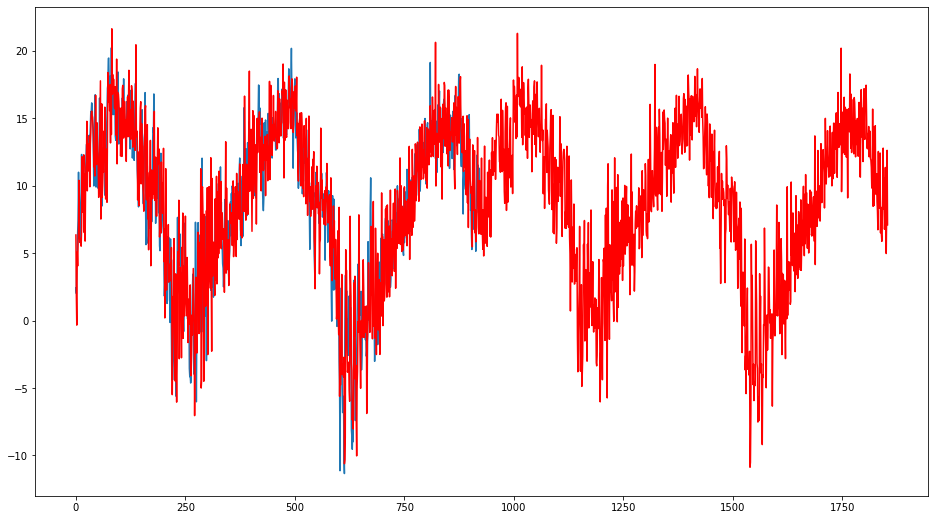

In [112]:
pyplot.plot(test)
pyplot.plot(predictions, color='red') 
pyplot.show()